# Apresentação

Notebook do Paulo Vinicius N. Bochnia

Linkedin: https://www.linkedin.com/in/paulobochnia/

Administrador, Pós Graduando em Big Data/ Inteligência Artificial e Business Intelligence.

Analista de Business Intelligence e aspirante a Data Scientist.

# Modelo Machine Learning para o Hospital Sírio-Libanês

Neste trabalho recebemos uma proposta do Hospital de São Paulo - Sírio-Libanês - para ajuda-los a executar a predição da admissão na UTI (UCI) de casos confirmados da COVID-19.
A base total foi disponibilizada no Kaggle e estaremos trabalhando junto com o apoio do time/professores de Data Science da Alura: Guilherme Silveira; Thiago Gonçalves; e Allan Spadini.

## Sobre a COVID 19

### O que é a COVID

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo camelos, gado, gatos e morcegos. Raramente, os coronavírus que infectam animais podem infectar pessoas, como exemplo do MERS-CoV e SARS-CoV. Recentemente, em dezembro de 2019, houve a transmissão de um novo coronavírus (SARS-CoV-2), o qual foi identificado em Wuhan na China e causou a COVID-19, sendo em seguida disseminada e transmitida pessoa a pessoa.

A COVID-19 é uma doença causada pelo coronavírus, denominado SARS-CoV-2, que apresenta um espectro clínico variando de infecções assintomáticas a quadros graves. De acordo com a Organização Mundial de Saúde, a maioria (cerca de 80%) dos pacientes com COVID-19 podem ser assintomáticos ou oligossintomáticos (poucos sintomas), e aproximadamente 20% dos casos detectados requer atendimento hospitalar por apresentarem dificuldade respiratória, dos quais aproximadamente 5% podem necessitar de suporte ventilatório.

### Quais são os sintomas

Os sintomas da COVID-19 podem variar de um resfriado, a uma Síndrome Gripal-SG (presença de um quadro respiratório agudo, caracterizado por, pelo menos dois dos seguintes sintomas: sensação febril ou febre associada a dor de garganta, dor de cabeça, tosse, coriza) até uma pneumonia severa. Sendo os sintomas mais comuns:

• 	Tosse

• 	Febre

• 	Coriza

• 	Dor de garganta

• 	Dificuldade para respirar

• 	Perda de olfato (anosmia)

• 	Alteração do paladar (ageusia)

• 	Distúrbios gastrintestinais (náuseas/vômitos/diarreia)

• 	Cansaço (astenia)

• 	Diminuição do apetite (hiporexia)

• 	Dispnéia ( falta de ar)

### Como é transmitido

A transmissão acontece de uma pessoa doente para outra ou por contato próximo por meio de:

• 	Toque do aperto de mão contaminadas;

• 	Gotículas de saliva;

• 	Espirro;

• 	Tosse;

• 	Catarro;

• 	Objetos ou superfícies contaminadas, como celulares, mesas, talheres, maçanetas, brinquedos, teclados de computador etc.

## Sobre o Problema do Sírio-Libanês

### O Problema!

Há a urgência para obter uma predição melhor apurada para preparar o sistema de saúde e evitar o colapso, definido que há recursos limitados para esse trabalho, como leitos para UTI, médicos especializados para essas áreas.

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem1.jpg?raw=1' width=70%>


### Entendendo os Dados

• 	Conceito de Janela

O Hospital tomou cuidado para incluir cenários da vida real, disponibilizando os dados em janela de eventos:

Número do paciente e Janela Cronológica de atendimento - Sendo essa janela agrupada da seguinte forma:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem2.JPG?raw=1' width=70%>

Devemos nos atentar para não usar os dados com o alvo (Coluna ICU = precisou da UTI) na mesma janela de tempo que aconteceu o evento, ou seja, se o paciente já entrou no hospital precisando da UTI, esse dado não poderemos usar pois ele já é de um paciente que foi indicado desde o inicio como "especial". Veja imagem abaixo com as instruções:

Examples:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem3.png?raw=1' width=70%>
<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem4.png?raw=1' width=70%>

• 	Banco de Dados

Esse banco de dados contém dados anônimos do Hospital Sírio_Libanês - São Paulo e Brasília. Todos os dados estão anônimos e esse processo foi executado pelas melhores praticas internacionais.
Os dados foram limpados e escalados por colunas de acordo com as escalas de Mínimo / Máximo para caber entre -1 e 1.

• 	Available data

1. Informação demográfica do Paciente (03)
2. Grupo de doenças pré existentes do paciente (09)
3. Exames de sangue (36)
4. Sinais vitais (06)

No total são 54 características, expandindo quando é pertinente para média, mediana, máximo, mínimo, diferença e diferença relativa.

1. diferença = máximo - mínimo
2. diferença relativa = diferença / mediana

# Análise dos Dados

Para analisarmos os nossos dados, o estudo é divido em 5 partes, que são: Importação dos dados; Análise de Dados; Modelos de Machine Learning; Teste de Modelos; e Conclusão. 

## 1. Importação dos Dados

Capitulo para organizar os DataFrames que utilizaremos ao longo do estudo. Os bancos de dados são:

• 	Dados do Desafio Kaggle. fonte - https://www.kaggle.com/S%C3%ADrio-Libanes/covid19.

### 1.1 Importando Bibliotecas

Nessa seção iremos importar todas as bibliotecas que vamos utilizar em nosso estudo.

In [1]:
import pandas as pd
import copy
import numpy as np
import datetime
from io import StringIO
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Normalizer
from tpot.builtins import StackingEstimator
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.widgets as widgets
import seaborn as sns
import missingno as msno
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import scatter_matrix

C:\Users\bochn\anaconda364bit\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


### 1.2 Funções para o Projeto

Para falicitar/automatizar nossa análise, abaixo estão os códigos das funções criadas.

In [2]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index = False)[features_continuas_colunas].fillna(method = 'bfill').fillna(method = 'ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [3]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

In [4]:
def analisar_variaveis(coluna_analisada):
    x = coluna_analisada
    x = x.upper()
    attributes = [x +'_MEDIAN', x +'_MEAN', x +'_MIN', x +'_MAX', x +'_DIFF']
    matrix = np.triu(dados_limpos[attributes].corr())
    fig, ax = plt.subplots(figsize=(12,8))    
    sns.heatmap(dados_limpos[attributes].corr(), annot=True, mask=matrix, ax=ax)
    scatter_matrix(dados_limpos[attributes], figsize=(12,8))
    matrix = np.triu(dados_limpos[attributes].corr())
    dados_limpos[attributes].hist(bins=50, figsize=(12,8))
    plt.show()
    pd.DataFrame(dados_limpos[[x +'_DIFF','ICU']].groupby([x +'_DIFF','ICU']).size(),columns =['qtd_de_registros']).plot(kind = 'bar', title = 'Divisão de registros Sim/Não ICU')

In [5]:
def avaliar_modelo_graficamente(modelo, dados):
    
    #Ajustar a base de dados com as mesmas especificações para os modelos
    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    scaler = StandardScaler()
    features = scaler.fit_transform(dados[colunas_numericas].astype(np.float64))
    target = dados["ICU"]
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size = 0.20)
    
    modelo.fit(x_train, y_train)

    mapping = {0: 'Sem UTI', 1: 'Com UTI'}
    fig, ax = plt.subplots(figsize=(6,6))
    cm_viz = ConfusionMatrix(modelo,
                         classes= ['Sem UTI', 'Com UTI'],
                        label_encoder=mapping)
    cm_viz.score(x_test,y_test)
    cm_viz.poof()
    
    fig,ax = plt.subplots(figsize=(6,3))
    cm_viz = ClassificationReport(modelo, classes=['Sem UTI', 'Com UTI'], label_encoder = 'mapping')

    cm_viz.score(x_test,y_test)
    cm_viz.poof()
    
    roc_auc(modelo, x_train, y_train, X_test=x_test, y_test=y_test, classes=['Sem UTI', 'Com UTI'])

In [6]:
def roda_modelo_cv(modelo, dados,n_splits,n_repeats):
    
    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER","ICU","WINDOW"], axis=1)
    
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
    resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)
    
    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])
    auc_std = np.std(resultados['test_score'])
    print(f'AUC MÉDIO {auc_medio} - {auc_medio_treino}')
    return auc_medio, auc_medio_treino


In [7]:
def roda_modelo_cv_validação(modelo, dados, n_splits, n_repeats):
    
    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)

    scaler = StandardScaler()
    dados_preparados_2 = scaler.fit_transform(dados[colunas_numericas].astype(np.float64))
    
    y = dados["ICU"]
    x = dados_preparados_2    

    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)
    resultados=cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)

    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])

    auc_std = np.std(resultados['test_score'])

    print(f'AUC  {auc_medio} - {auc_medio_treino}')
    return auc_medio, auc_medio_treino

### 1.3 Importação e Transformação dos Dados

Importação/Tratamento dos bancos e denominação das variáveis.

In [8]:
dados = pd.read_excel(r'C:\Users\bochn\ProjetosPython\Bootcamp_Alura_DataScience\6º Modulo\Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

Vamos verificar quais são as colunas do nosso banco de dados - o significado de cada uma está no inicio do projeto, onde explico o que é cada informação do nosso conjunto - e como os 5 primeiros dados estão apresentados.

In [9]:
dados.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0                 1.0  ...   
2                 0.0                 1.0                 1.0  ...   
3                 0.0                 1.0                 1.0  ...   
4                 0.0                 1.0                 1.0  ...   

   TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
0         -1.000000               -1.000000                         -1.000000   
1         -1.000000               -1.000000                         -1.000000   
2               NaN                     NaN                               NaN   
3         -1.000000               -1.000000                               NaN   
4         -0.238095               -0.818182                         -0.389967   

   BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  \
0                        -1.000000            -1.000000   
1                        -1.000000            -1.000000   
2                              NaN                  NaN   
3                              NaN                  NaN   
4                         0.407558            -0.230462   

   RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
0                  -1.000000             -1.000000   
1                  -1.000000             -1.000000   
2                        NaN                   NaN   
3                        NaN             -1.000000   
4                   0.096774             -0.242282   

   OXYGEN_SATURATION_DIFF_REL    WINDOW  ICU  
0                   -1.000000       0-2    0  
1                   -1.000000       2-4    0  
2                         NaN       4-6    0  
3                   -1.000000      6-12    0  
4                   -0.814433  ABOVE_12    1  

[5 rows x 231 columns]

Mas por que temos o paciente '0' repetido nas cinco primeiras linhas do nosso banco de dados? Porque cada linha deste paciente significa uma janela de tempo (coluna 'WINDOW'), e essa janela significa o status de cada periodo de tempo do paciente no Hospital do Case - para mais detalhes verificar no inicio do projeto a explicação desta coluna. Algo que nos espanta em nossa análise é o aparecimento de algumas janelas não possuirem dados em algumas colunas ('NaN'). O que podemos fazer para solucionar esse caso?

Outro ponto importante é entender - de modo geral - alguns pontos estatísticos do nosso banco de dados, e mesmo sendo muito ampla nossa análise no momento, é possivel verificar que em algumas colunas há uma grande quantidade de valores repetidos (Exemplo: 'RESPIRATORY_RATE_DIFF_REL' -1 no resultado do primeiro e segundo quartil. Será que isso é um erro em nosso banco de dados?

In [10]:
dados.describe()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297279            0.139320   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       DISEASE GROUPING 5  DISEASE GROUPING 6          HTN  ...  \
count         1920.000000         1920.000000  1920.000000  ...   
mean             0.128125            0.046875     0.213021  ...   
std              0.334316            0.211426     0.409549  ...   
min              0.000000            0.000000     0.000000  ...   
25%              0.000000            0.000000     0.000000  ...   
50%              0.000000            0.000000     0.000000  ...   
75%              0.000000            0.000000     0.000000  ...   
max              1.000000            1.000000     1.000000  ...   

       RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
count            1177.000000       1231.000000             1239.000000   
mean               -0.703683         -0.770338               -0.887196   
std                 0.482097          0.319001                0.296147   
min                -1.000000         -1.000000               -1.000000   
25%                -1.000000         -1.000000               -1.000000   
50%                -1.000000         -0.976190               -0.979798   
75%                -0.647059         -0.595238               -0.878788   
max                 1.000000          1.000000                1.000000   

       BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
count                       1240.000000                      1240.000000   
mean                          -0.786997                        -0.715950   
std                            0.324754                         0.419103   
min                           -1.000000                        -1.000000   
25%                           -1.000000                        -1.000000   
50%                           -1.000000                        -0.984944   
75%                           -0.645482                        -0.522176   
max                            1.000000                         1.000000   

       HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
count          1240.000000                1177.000000           1231.000000   
mean             -0.817800                  -0.719147             -0.771327   
std               0.270217                   0.446600              0.317694   
min              -1.000000                  -1.000000             -1.000000   
25%              -1.000000                  -1.000000             -1.000000   
50%              -0.989822                  -1.000000             -0.975924   
75%              -0.662529                  -0.634409             -0.594677   
max               1.000000                   1.000000              

Quando queremos explorar os dados no inicio do nosso projeto, temos o costume de sempre entender os dados gerais para depois iniciarmos com uma análise detalhada. Os atributos 'info()' e 'hist()' facilitam essa análise geral, mas como estamos analisando 231 colunas, não conseguimos extrair conclusões efetivas. Observe os dois próximos espaços de código para validar essa afirmação:

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


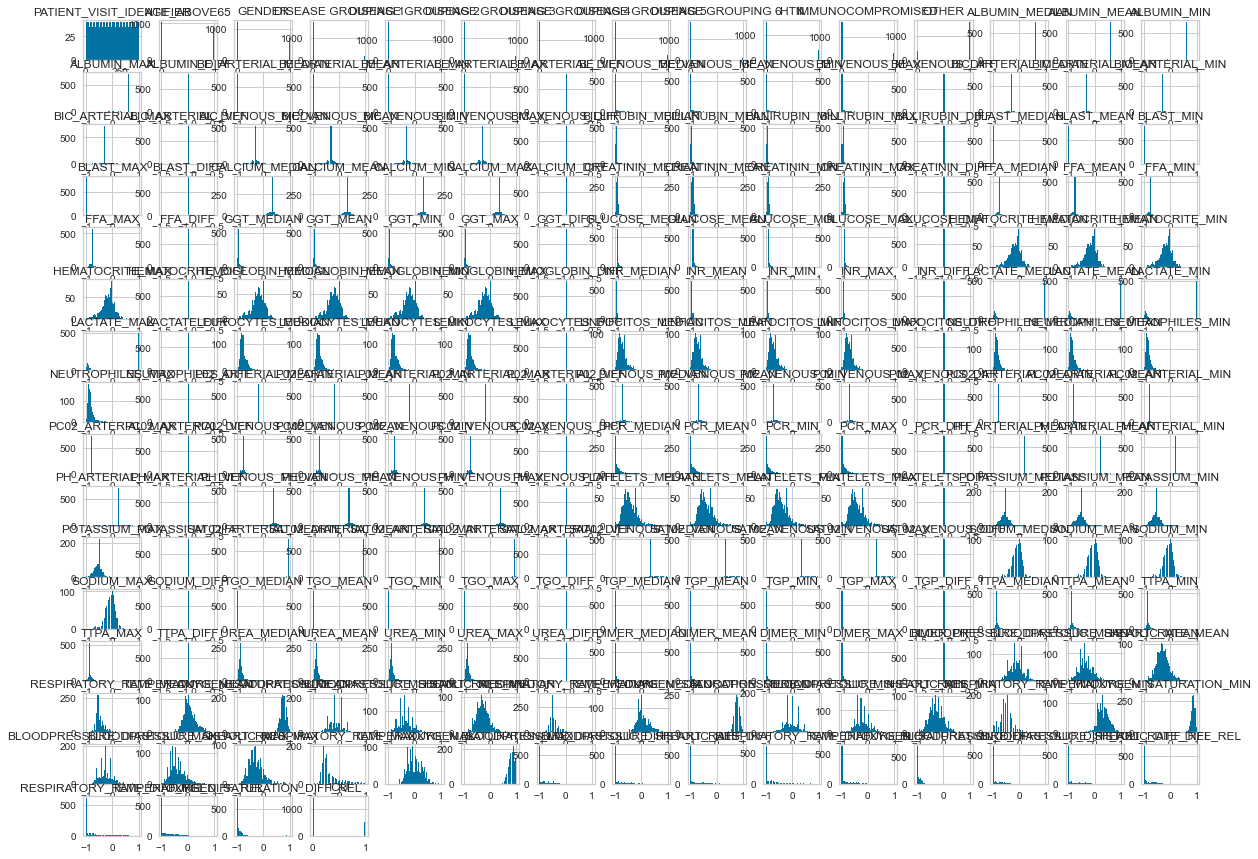

In [12]:
dados.hist(bins=50, figsize=(20,15))
plt.show()

Conforme vimos anteriormente, nós temos vários dados faltando informação no nosso banco de dados, para resolvermos esse problema, vamos utilizar a função "preenche_tabela" para substituir os dados faltantes pela informação anterior/posterior do mesmo paciente (essa sugestão foi o próprio hospital que indicou).

In [13]:
dados_limpos = preenche_tabela(dados)

Mesmo com a lógica que criamos anteriormente, não conseguimos solucionar todos os dados faltantes, veja abaixo que ainda consta em nosso banco 5 linhas com 'NaN' em alguma coluna. Vamos investigar o que é!

In [14]:
dados_faltantes = pd.DataFrame(dados_limpos.isna().sum(), columns=['qtd'])

In [15]:
dados_faltantes.sort_values('qtd',ascending=False).head(50)

qtd
IMMUNOCOMPROMISED           5
DISEASE GROUPING 1          5
DISEASE GROUPING 2          5
DISEASE GROUPING 3          5
DISEASE GROUPING 4          5
DISEASE GROUPING 5          5
DISEASE GROUPING 6          5
HTN                         5
OTHER                       5
SAT02_ARTERIAL_MEAN         0
SAT02_VENOUS_MEAN           0
SAT02_VENOUS_MEDIAN         0
SAT02_ARTERIAL_DIFF         0
SAT02_ARTERIAL_MAX          0
SAT02_ARTERIAL_MIN          0
PATIENT_VISIT_IDENTIFIER    0
SAT02_ARTERIAL_MEDIAN       0
POTASSIUM_DIFF              0
SAT02_VENOUS_MAX            0
POTASSIUM_MAX               0
POTASSIUM_MIN               0
SAT02_VENOUS_MIN            0
SODIUM_MAX                  0
SAT02_VENOUS_DIFF           0
SODIUM_MEDIAN               0
SODIUM_MEAN                 0
SODIUM_MIN                  0
POTASSIUM_MEDIAN            0
SODIUM_DIFF                 0
TGO_MEDIAN                  0
TGO_MEAN                    0
TGO_MIN                     0
TGO_MAX                     0
TGO_DIFF                    0
TGP_MEDIAN                  0
POTASSIUM_MEAN              0
PLATELETS_MEDIAN            0
PLATELETS_DIFF              0
PH_ARTERIAL_MEDIAN          0
PC02_ARTERIAL_DIFF          0
PC02_VENOUS_MEDIAN          0
PC02_VENOUS_MEAN            0
PC02_VENOUS_MIN             0
PC02_VENOUS_MAX             0
PC02_VENOUS_DIFF            0
PCR_MEDIAN                  0
PCR_MEAN                    0
PCR_MIN                     0
PCR_MAX                     0
PCR_DIFF                    0

In [16]:
dados_limpos[dados_limpos['DISEASE GROUPING 1'].isna()]

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
995                       199            0          10th       0   
996                       199            0          10th       0   
997                       199            0          10th       0   
998                       199            0          10th       0   
999                       199            0          10th       0   

     DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
995                 NaN                 NaN                 NaN   
996                 NaN                 NaN                 NaN   
997                 NaN                 NaN                 NaN   
998                 NaN                 NaN                 NaN   
999                 NaN                 NaN                 NaN   

     DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
995                 NaN                 NaN                 NaN  ...   
996                 NaN                 NaN                 NaN  ...   
997                 NaN                 NaN                 NaN  ...   
998                 NaN                 NaN                 NaN  ...   
999                 NaN                 NaN                 NaN  ...   

     TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
995         -0.595238               -0.919192   
996         -0.595238               -0.919192   
997         -0.595238               -0.919192   
998         -0.595238               -0.919192   
999         -0.595238               -0.919192   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
995                         -0.608696                        -0.607383   
996                         -0.608696                        -0.607383   
997                         -0.608696                        -0.607383   
998                         -0.608696                        -0.607383   
999                         -0.608696                        -0.607383   

     HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
995            -0.790037                  -0.817204             -0.599662   
996            -0.790037                  -0.817204             -0.599662   
997            -0.790037                  -0.817204             -0.599662   
998            -0.790037                  -0.817204             -0.599662   
999            -0.790037                  -0.817204             -0.599662   

     OXYGEN_SATURATION_DIFF_REL    WINDOW  ICU  
995                   -0.918403       0-2    0  
996                   -0.918403       2-4    0  
997                   -0.918403       4-6    0  
998                   -0.918403      6-12    0  
999                   -0.918403  ABOVE_12    0  

[5 rows x 231 columns]

In [17]:
dados_limpos.shape

(1925, 231)

In [18]:
dados_limpos = dados_limpos[dados_limpos['PATIENT_VISIT_IDENTIFIER'] != 199]

In [19]:
dados_limpos.shape

(1920, 231)

Ótimo! Era o paciente de código 199. Agora sim nosso banco está sem dados faltantes.

Os pacientes que foram internados logo na primeira janela também não nos ajudarão em nosso modelo de aprendizado de máquina porque eles já entraram no hospital precisando dos cuidados da UTI, portanto, precisamos excluir esses dados.

In [20]:
a_remover = dados_limpos[(dados_limpos['WINDOW'] == '0-2') & (dados_limpos['ICU'] == 1)]['PATIENT_VISIT_IDENTIFIER'].values

In [21]:
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")

In [22]:
dados_limpos.shape

(1760, 231)

Agora vamos resolver a informação repetida de um mesmo paciente e a função que nos ajudará com essa tarefa é a 'prepare_window', no qual ela fará a exclusão de todos os outros dados das janelas posteriores a de 0-2 horas. Lembrando que para solucionar o problema, queremos alertar o quanto antes que o paciente precisará / não precisará da UTI. Apenas uma observação, o unico dado que será identificado idenpendente da janela é se o paciente precisou ou não da UTI, ou seja, se o paciente 'x' não foi para UTI na primeira janela, e só foi precisar da mesma na ultima janela, nós vamos identificar no nosso banco de dados 'limpos' como um paciente que foi parar na UTI, mesmo deixando apenas a primeira janela no dataset.

In [23]:
dados_limpos['PATIENT_VISIT_IDENTIFIER'].value_counts()

384    5
383    5
125    5
126    5
127    5
      ..
258    5
259    5
260    5
262    5
0      5
Name: PATIENT_VISIT_IDENTIFIER, Length: 352, dtype: int64

In [24]:
dados_limpos[dados_limpos['PATIENT_VISIT_IDENTIFIER'] == 260]

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
1300                       260            0          40th       0   
1301                       260            0          40th       0   
1302                       260            0          40th       0   
1303                       260            0          40th       0   
1304                       260            0          40th       0   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
1300                 0.0                 0.0                 0.0   
1301                 0.0                 0.0                 0.0   
1302                 0.0                 0.0                 0.0   
1303                 0.0                 0.0                 0.0   
1304                 0.0                 0.0                 0.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
1300                 0.0                 0.0                 0.0  ...   
1301                 0.0                 0.0                 0.0  ...   
1302                 0.0                 0.0                 0.0  ...   
1303                 0.0                 0.0                 0.0  ...   
1304                 0.0                 0.0                 0.0  ...   

      TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
1300          -1.00000               -1.000000   
1301          -1.00000               -1.000000   
1302          -1.00000               -1.000000   
1303          -1.00000               -1.000000   
1304          -0.52381               -0.757576   

      BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
1300                         -1.000000                        -1.000000   
1301                         -1.000000                        -1.000000   
1302                         -1.000000                        -1.000000   
1303                         -1.000000                        -1.000000   
1304                         -0.157674                         0.136356   

      HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
1300            -1.000000                  -1.000000              -1.00000   
1301            -1.000000                  -1.000000              -1.00000   
1302            -1.000000                  -1.000000              -1.00000   
1303            -1.000000                  -1.000000              -1.00000   
1304            -0.103572                   0.032258              -0.51983   

      OXYGEN_SATURATION_DIFF_REL    WINDOW  ICU  
1300                   -1.000000       0-2    0  
1301                   -1.000000       2-4    0  
1302                   -1.000000       4-6    0  
1303                   -1.000000      6-12    1  
1304                   -0.757786  ABOVE_12    1  

[5 rows x 231 columns]

In [25]:
dados[dados['PATIENT_VISIT_IDENTIFIER'] == 128]

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
640                       128            0          30th       0   
641                       128            0          30th       0   
642                       128            0          30th       0   
643                       128            0          30th       0   
644                       128            0          30th       0   

     DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
640                 0.0                 0.0                 0.0   
641                 0.0                 0.0                 0.0   
642                 0.0                 0.0                 0.0   
643                 0.0                 0.0                 0.0   
644                 0.0                 0.0                 0.0   

     DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
640                 0.0                 0.0                 0.0  ...   
641                 0.0                 0.0                 0.0  ...   
642                 0.0                 0.0                 0.0  ...   
643                 0.0                 0.0                 0.0  ...   
644                 0.0                 0.0                 0.0  ...   

     TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
640               NaN                     NaN   
641               NaN                     NaN   
642               NaN                     NaN   
643         -0.761905               -1.000000   
644         -0.595238               -0.878788   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
640                               NaN                              NaN   
641                               NaN                              NaN   
642                               NaN                              NaN   
643                         -1.000000                        -1.000000   
644                         -0.701863                        -0.712081   

     HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
640                  NaN                        NaN                   NaN   
641                  NaN                        NaN                   NaN   
642                  NaN                        NaN                   NaN   
643            -1.000000                  -1.000000             -0.767681   
644            -0.736744                  -0.749309             -0.596353   

     OXYGEN_SATURATION_DIFF_REL    WINDOW  ICU  
640                         NaN       0-2    0  
641                         NaN       2-4    0  
642                         NaN       4-6    0  
643                   -1.000000      6-12    0  
644                   -0.878893  ABOVE_12    0  

[5 rows x 231 columns]

In [26]:
dados_limpos.shape

(1760, 231)

In [27]:
dados_limpos['OXYGEN_SATURATION_DIFF_REL'].value_counts()

-1.000000    927
-0.959202     30
-0.980232     28
-0.960052     24
-0.959631     22
            ... 
 0.808237      1
 0.285150      1
 0.278351      1
-0.102435      1
 0.838453      1
Name: OXYGEN_SATURATION_DIFF_REL, Length: 170, dtype: int64

In [28]:
dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)

Outro ajuste que devemos fazer é na coluna de 'AGE_PERCENTIL', a mesma está com os valores em texto e com o final 'th' o que fará com que o computador interprete os dados de uma outra maneira.

In [29]:
dados_limpos['AGE_PERCENTIL'].value_counts()

20th          42
30th          39
40th          38
10th          37
80th          36
50th          34
Above 90th    34
70th          34
60th          30
90th          28
Name: AGE_PERCENTIL, dtype: int64

In [30]:
dados_limpos.AGE_PERCENTIL = dados_limpos.AGE_PERCENTIL.astype("category").cat.codes
dados_limpos.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  \
PATIENT_VISIT_IDENTIFIER                                             
0                        0                          0            1   
2                        10                         2            0   
3                        15                         3            0   
4                        20                         4            0   
5                        25                         5            0   

                             AGE_PERCENTIL  GENDER  DISEASE GROUPING 1  \
PATIENT_VISIT_IDENTIFIER                                                 
0                        0               5       0                 0.0   
2                        10              0       0                 0.0   
3                        15              3       1                 0.0   
4                        20              0       0                 0.0   
5                        25              0       0                 0.0   

                             DISEASE GROUPING 2  DISEASE GROUPING 3  \
PATIENT_VISIT_IDENTIFIER                                              
0                        0                  0.0                 0.0   
2                        10                 0.0                 0.0   
3                        15                 0.0                 0.0   
4                        20                 0.0                 0.0   
5                        25                 0.0                 0.0   

                             DISEASE GROUPING 4  DISEASE GROUPING 5  \
PATIENT_VISIT_IDENTIFIER                                              
0                        0                  0.0                 1.0   
2                        10                 0.0                 0.0   
3                        15                 0.0                 0.0   
4                        20                 0.0                 0.0   
5                        25                 0.0                 0.0   

                             DISEASE GROUPING 6  ...  TEMPERATURE_DIFF  \
PATIENT_VISIT_IDENTIFIER                         ...                     
0                        0                  1.0  ...         -1.000000   
2                        10                 0.0  ...         -1.000000   
3                        15                 0.0  ...         -1.000000   
4                        20                 0.0  ...         -0.952381   
5                        25                 0.0  ...         -0.976190   

                             OXYGEN_SATURATION_DIFF  \
PATIENT_VISIT_IDENTIFIER                              
0                        0                -1.000000   
2                        10               -0.959596   
3                        15               -1.000000   
4                        20               -0.979798   
5                        25               -0.979798   

                             BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
PATIENT_VISIT_IDENTIFIER                                        
0                        0                          -1.000000   
2                        10                         -0.515528   
3                        15                         -1.000000   
4                        20                         -1.000000   
5                        25                         -0.860870   

                             BLOODPRESSURE_SISTOLIC_DIFF_REL  \
PATIENT_VISIT_IDENTIFIER                                       
0                        0                         -1.000000   
2                        10                        -0.351328   
3                        15                        -1.000000   
4                        20                        -0.883669   
5                        25                        -0.714460   

                             HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  \
PATIENT_VISIT_IDENTIFIER                                                      
0                        0             -1.000000       

Be arterial = 1.0 = 348
Albumin = 1.0 = 318

Com essas últimas alterações finalizamos a nossa importação/limpeza dos nossos dados.

## 2. Análise de Dados

### 2.1 Introdução para Análise Exploratória

Esse capitulo será exclusivamente dedicado para avaliarmos quais colunas realmente são informações que ajudarão no desempenho do nosso algoritmo de aprendizado de máquina.

A primeira análise que vou executar será sobre as colunas que possuem uma correlação muito alta (acima de 0.9/abaixo de -0.9). Uma caracteristica do nosso banco é que ele possui uma coluna com algum detalhe médico da pessoa como o nível da creatina do paciente ('CREATINI') e outras cinco colunas com informações estatísticas (mediana: '_MEDIAN'; média: '_MEAN'; mínimo: '_MIN'; máximo: '_MAX'; diferença '_DIFF'). Vamos avaliar individualmente cada coluna com esses outros conjuntos de dados?

Em nossa análise, o primeiro gráfico sempre será da correlação entre as colunas:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem5.JPG?raw=1' width=70%>

Na segunda análise será como os dados se comportam entre si em um gráfico de dispersão:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem6.JPG?raw=1' width=70%>

O terceiro gráfico será um conjunto de histogramas mostrando o comportamento dos dados individualmente:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem7.JPG?raw=1' width=70%>

O ultimo gráfico será sempre a análise da coluna '_DIFF', criei essa análise para verificar se há algum dado além de -1 nas colunas, e se há algum comportamento inesperado:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem8.JPG?raw=1' width=70%>

Perceba que nesse exemplo da coluna 'BIC_VENOUS' há uma alta correlação em todas as colunas, mesmo havendo valores diferentes nas colunas. Na análise da coluna '_DIFF' perceba que mesmo para o paciente que foi ou não foi para UTI, nós só temos apenas um valor (-1).

Se você analisar outra coluna como a 'ALBUMIN', você poderá observar que a maioria das pessoas possuem o mesmo dado (+ de 300 pacientes do conjunto de 352). Portanto mesmo que apresente dados diferentes, eu acredito que é um fator muito pequeno e que pode prejudicar a construção do nosso modelo, por isso, eu decidi excluir essas colunas que possuem muitos valores exclusivos, permitindo assim que a falta de algum exame (pode ser que no momento que substituimos nossos dados vázios por informações posteriores/anteriores essas colunas nos prejudiquem), ou talvez uma alteração pequena em algum dado seja motivo de o paciente ser levado para a UTI.

Os dados que eu mantiver em minha análise serão inseridos na lista 'colunas selecionadas'.

### 2.1 Análise Exploratória

C:\Users\bochn\anaconda364bit\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\bochn\anaconda364bit\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == -1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\bochn\anaconda364bit\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


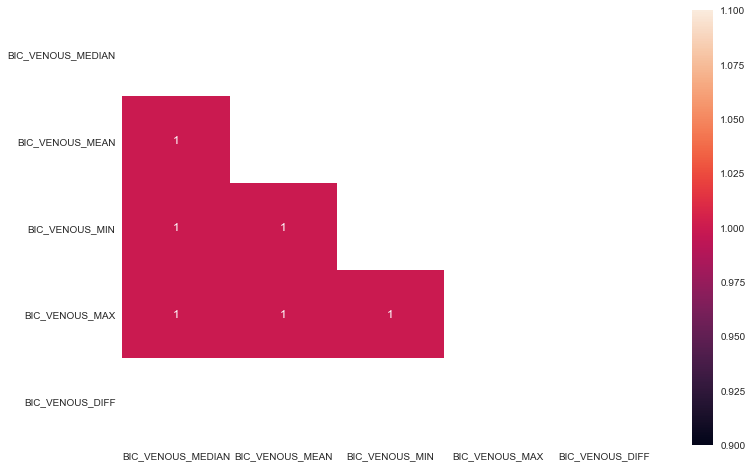

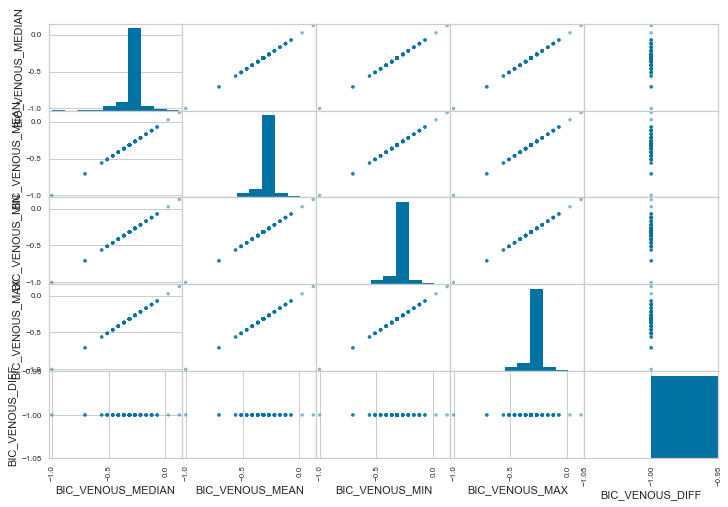

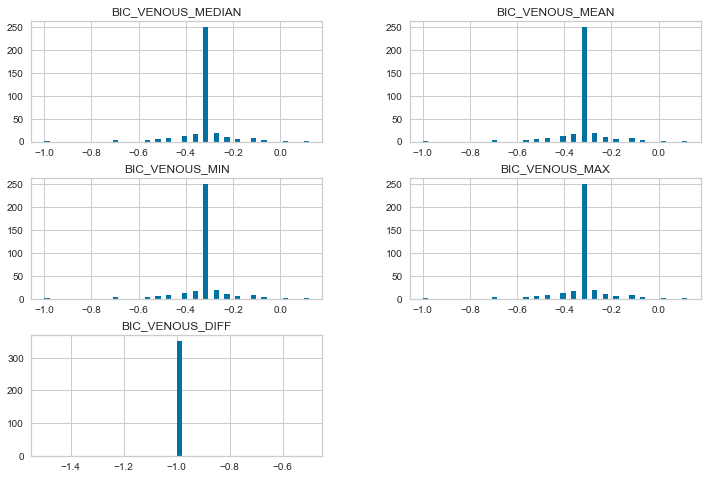

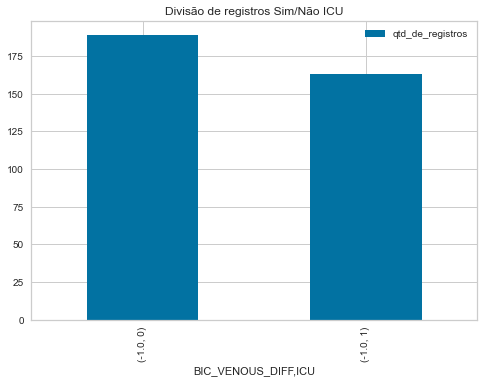

In [31]:
analisar_variaveis('BIC_VENOUS')

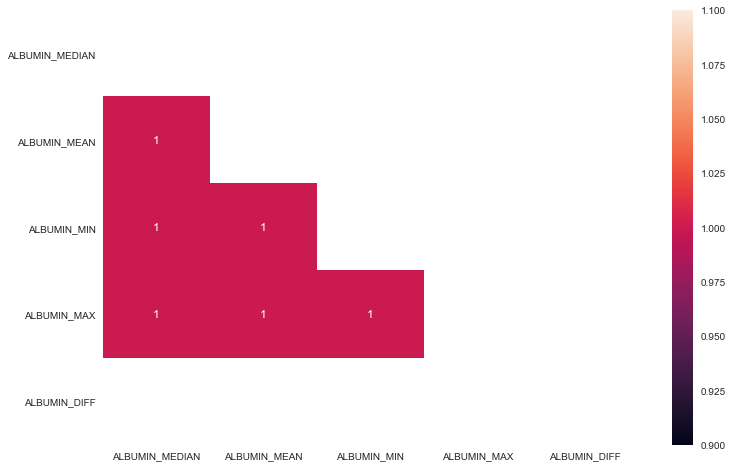

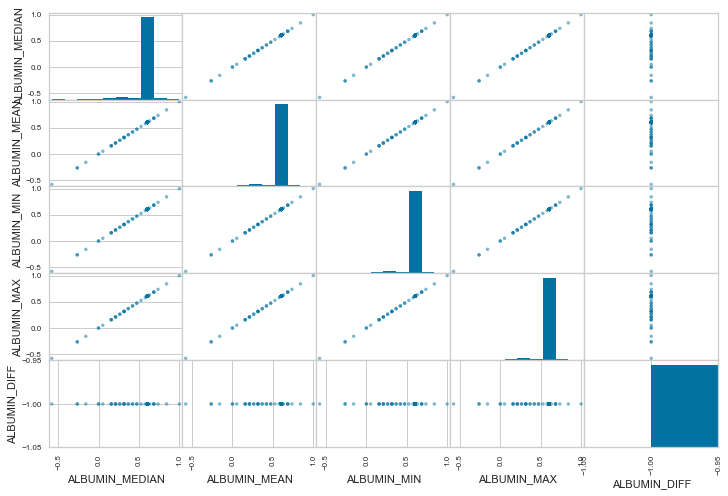

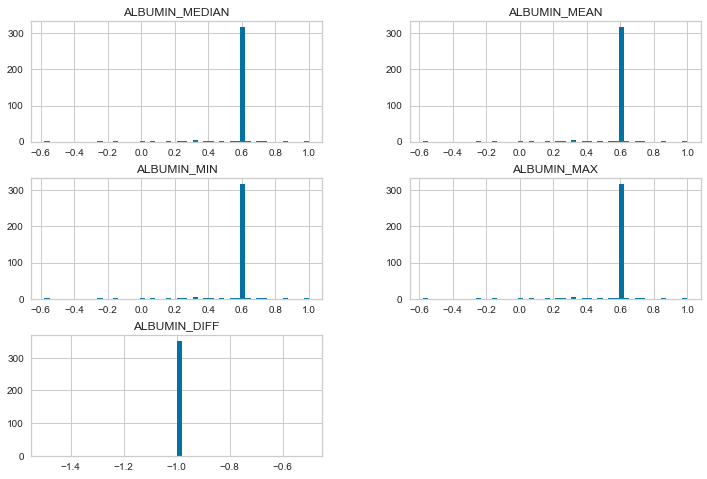

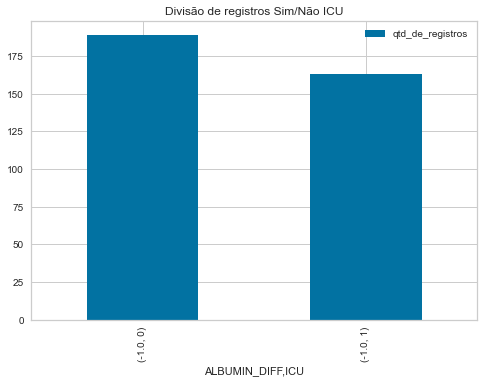

In [32]:
analisar_variaveis('ALBUMIN')

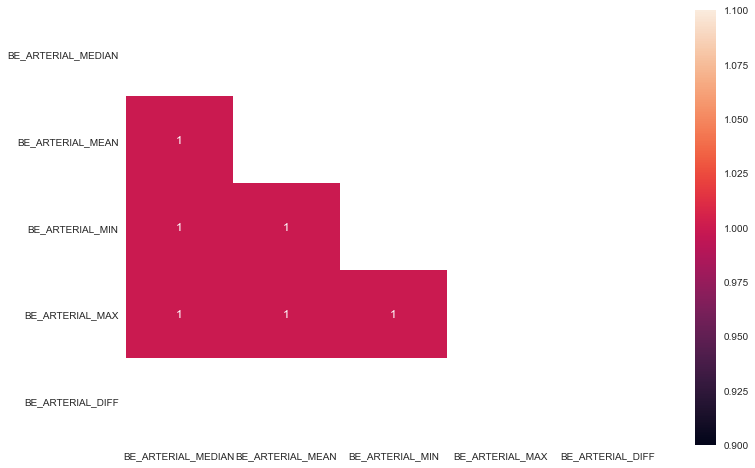

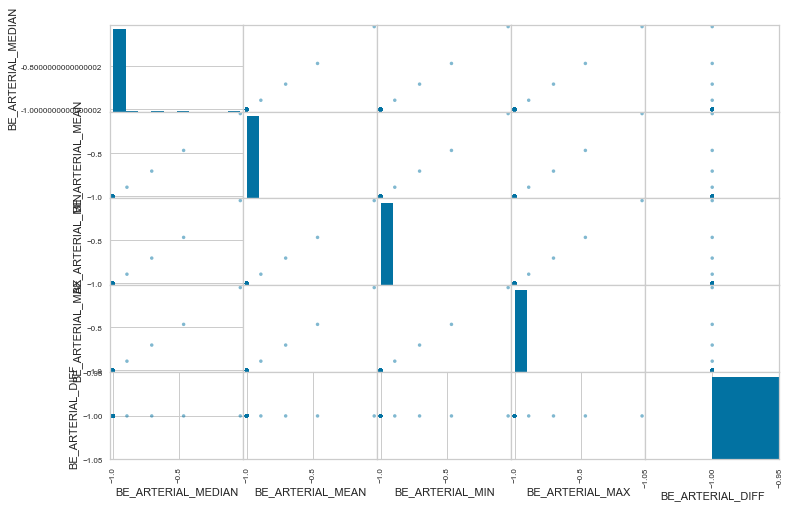

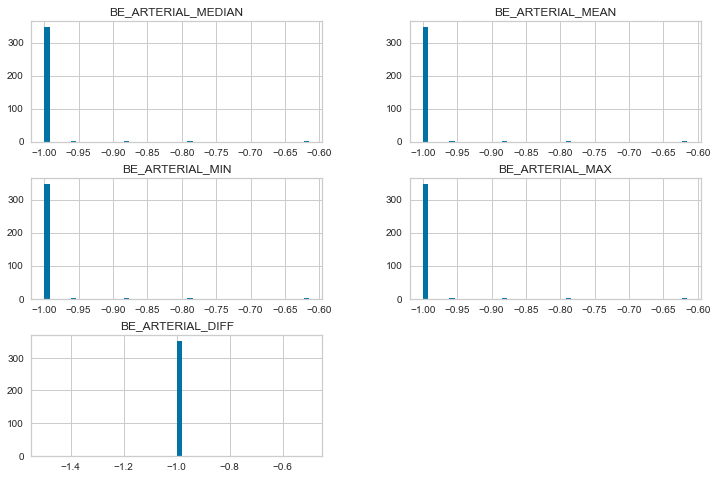

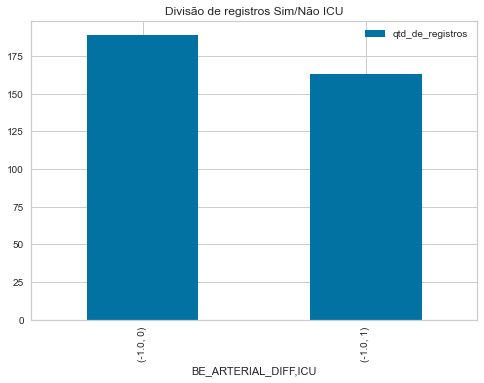

In [33]:
analisar_variaveis('BE_ARTERIAL')

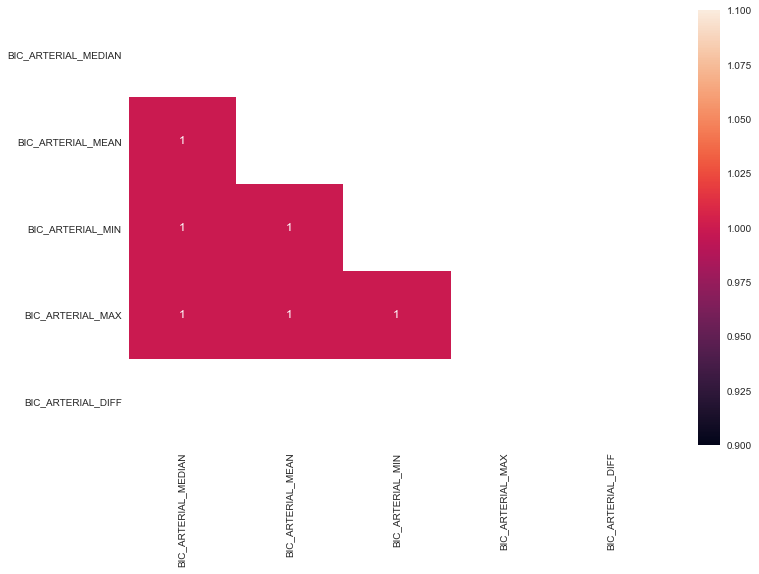

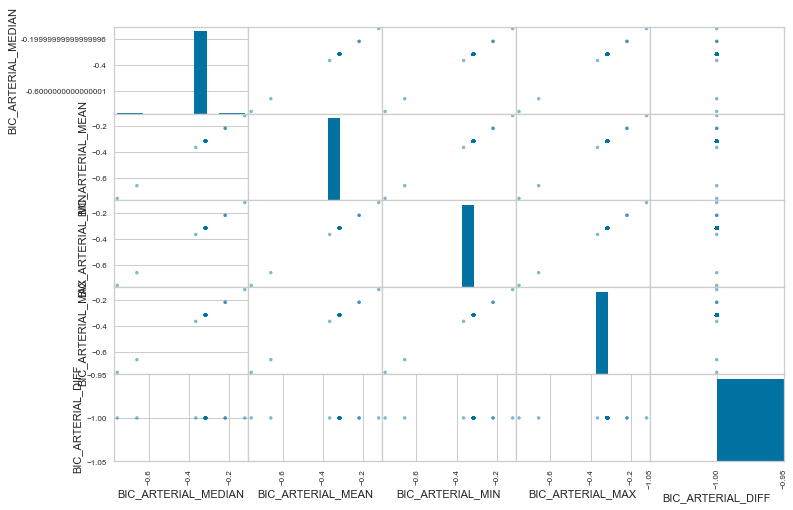

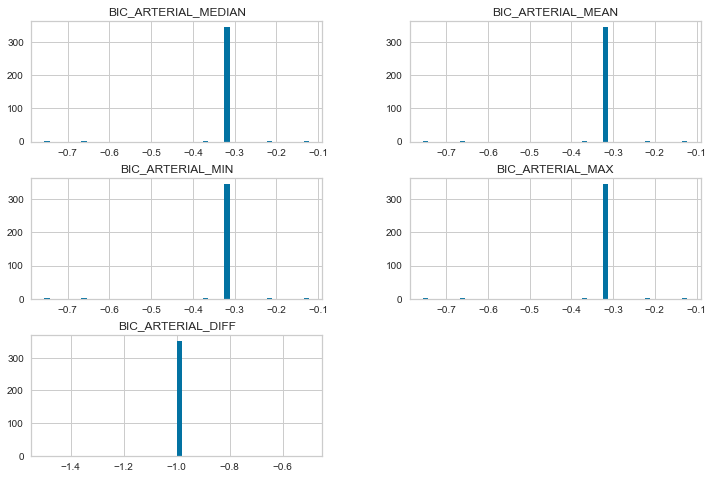

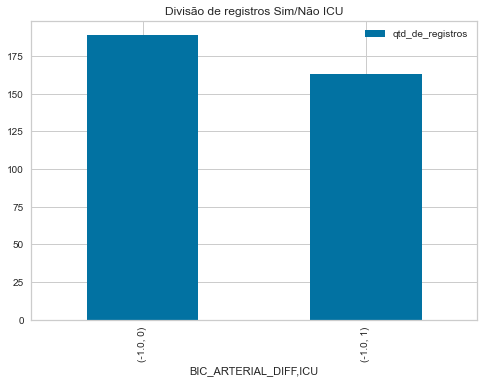

In [34]:
analisar_variaveis('BIC_ARTERIAL')

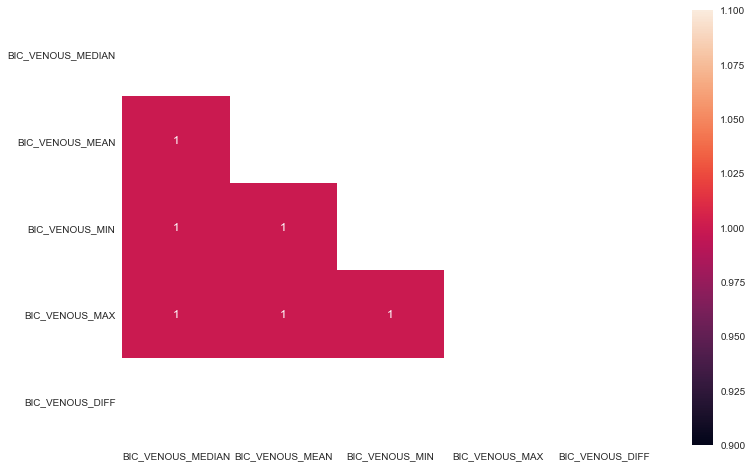

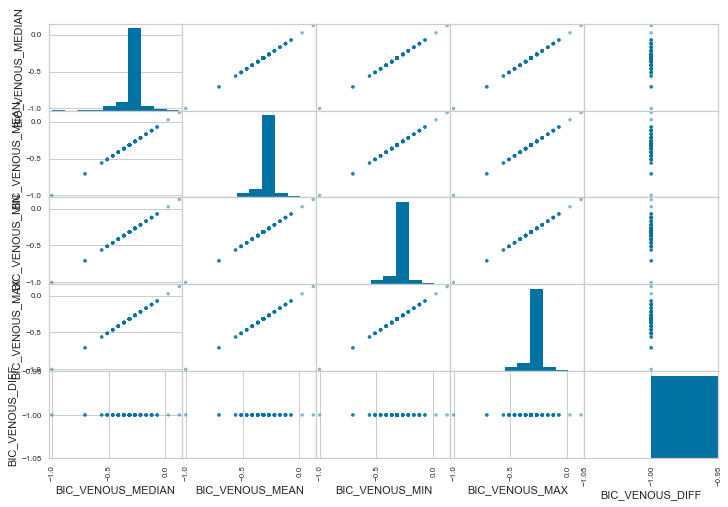

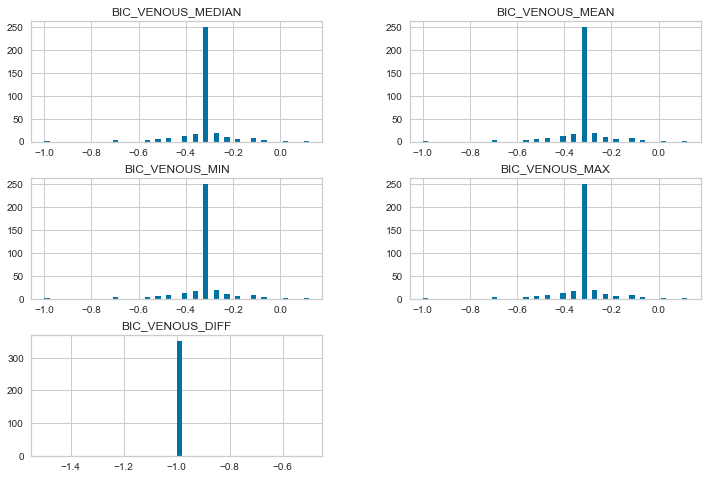

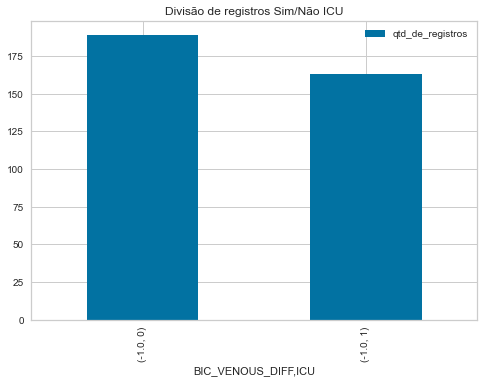

In [35]:
analisar_variaveis('BIC_VENOUS')

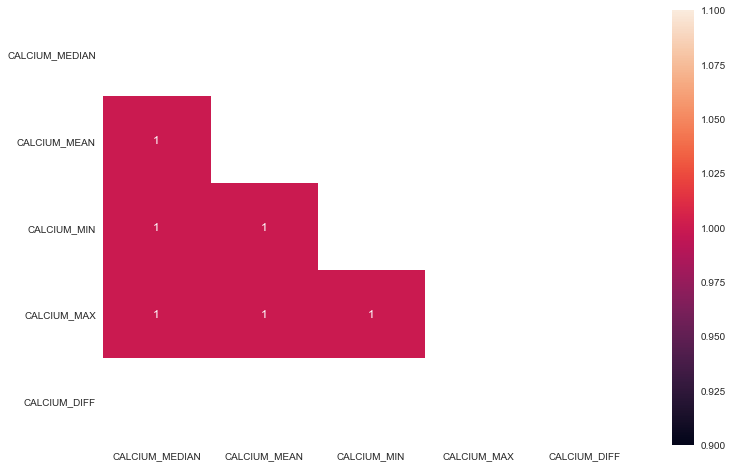

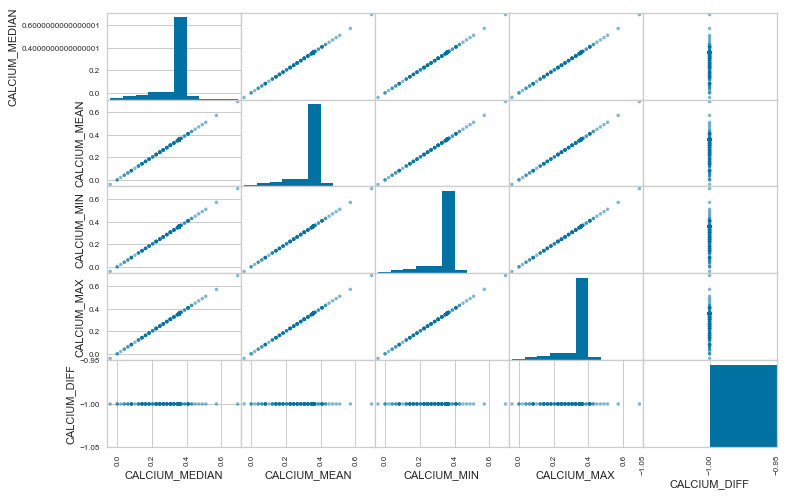

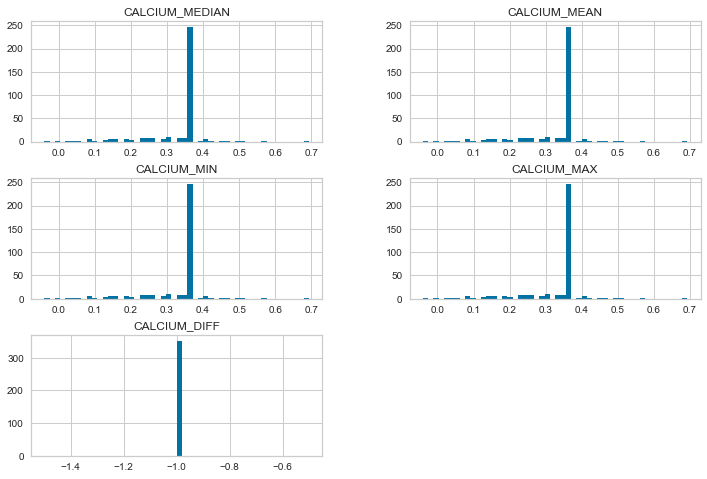

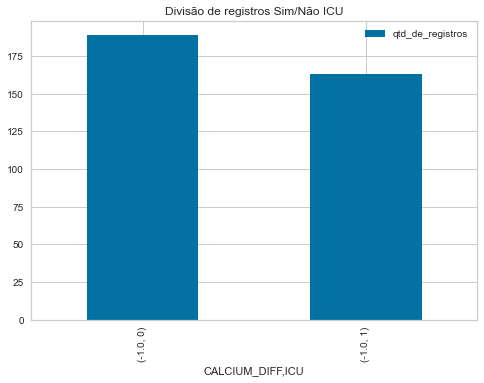

In [36]:
analisar_variaveis('CALCIUM')

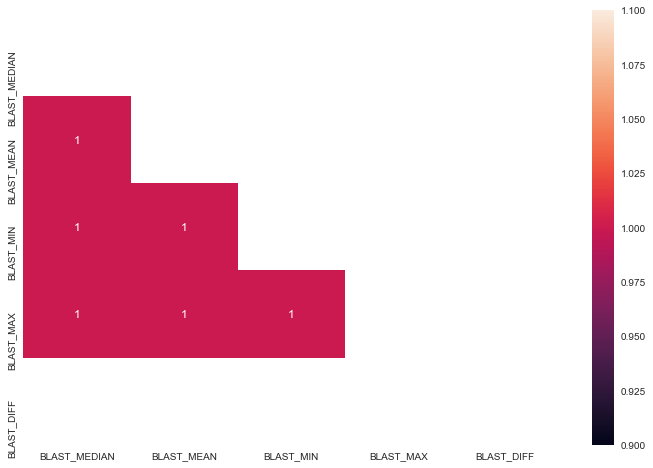

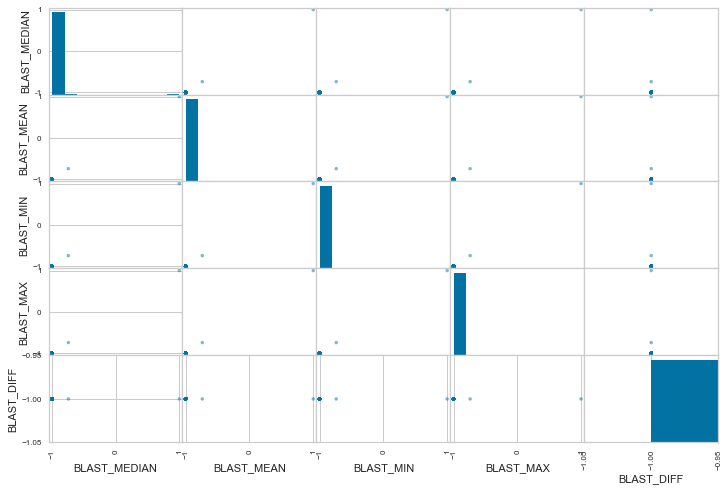

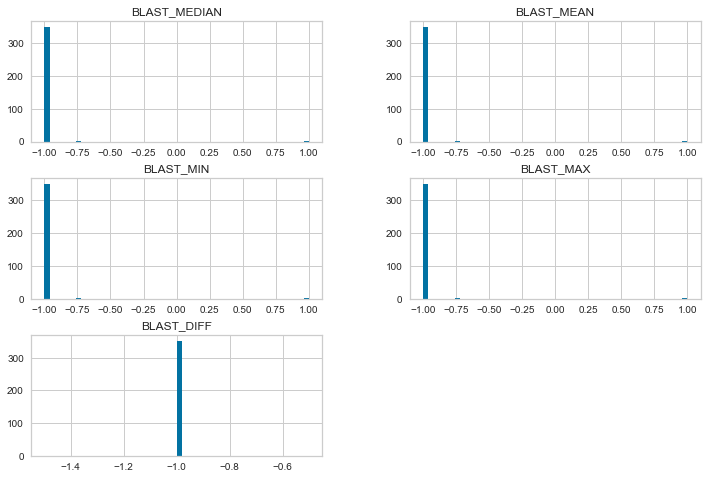

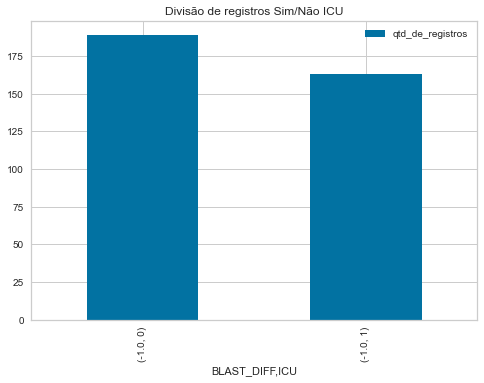

In [37]:
analisar_variaveis('BLAST')

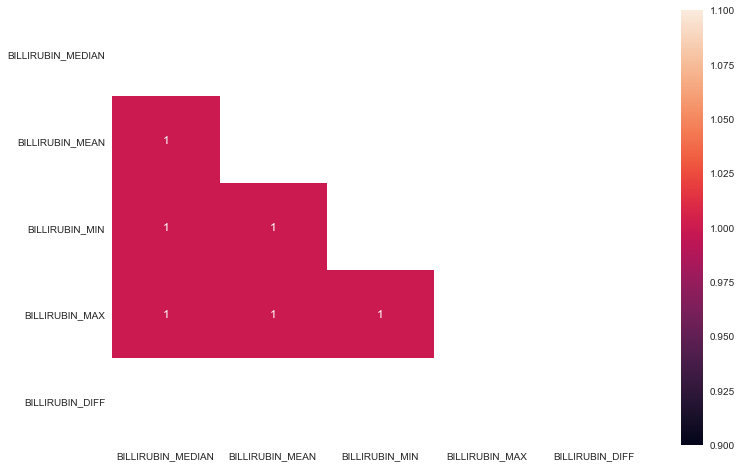

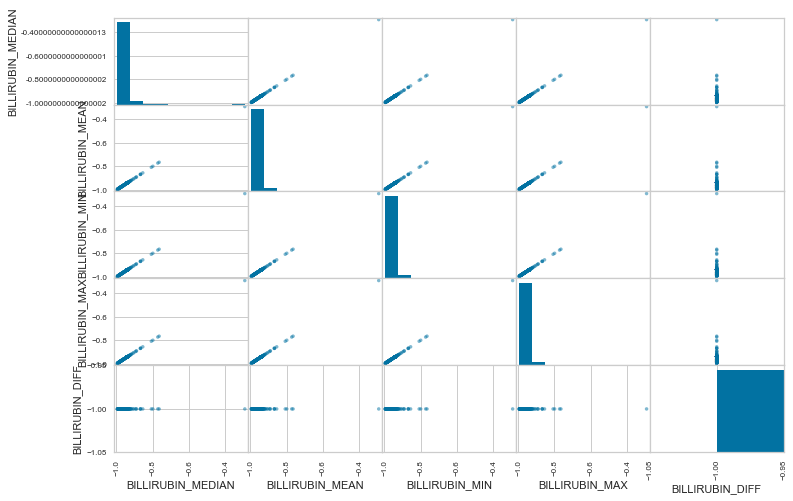

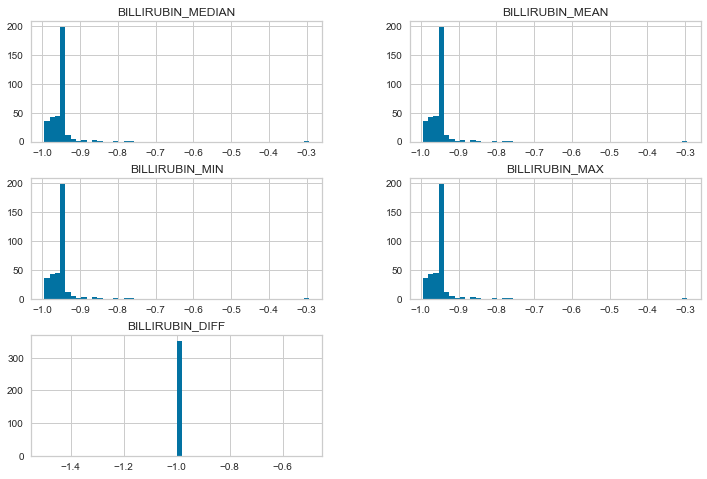

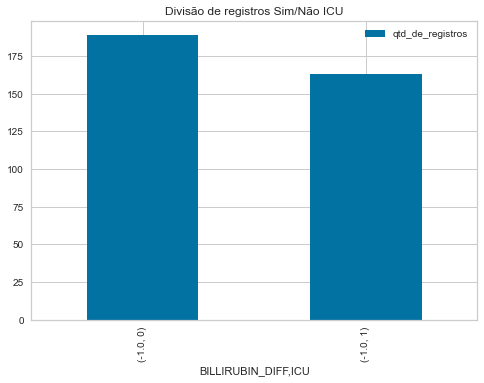

In [38]:
analisar_variaveis('BILLIRUBIN')

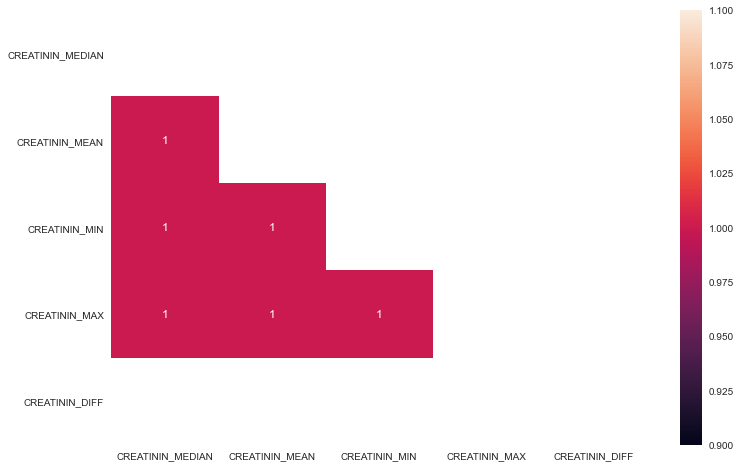

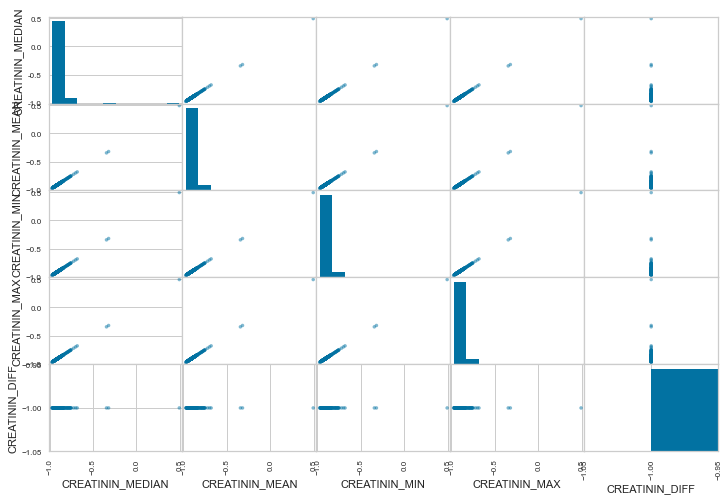

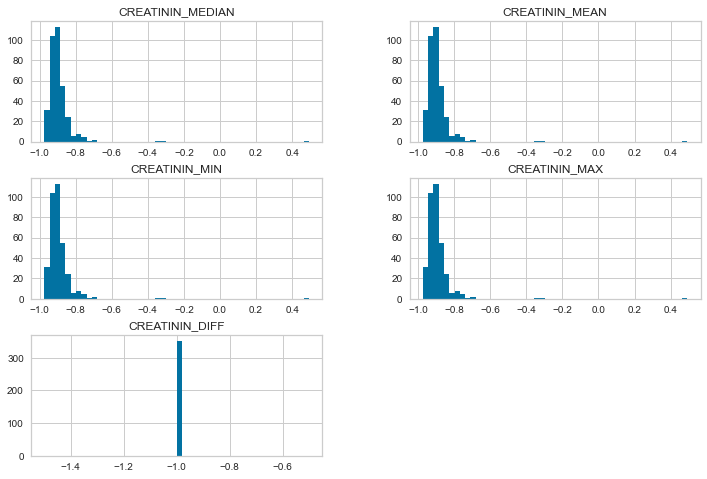

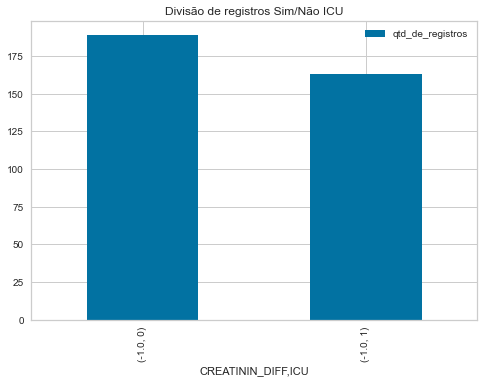

In [39]:
analisar_variaveis('CREATININ')

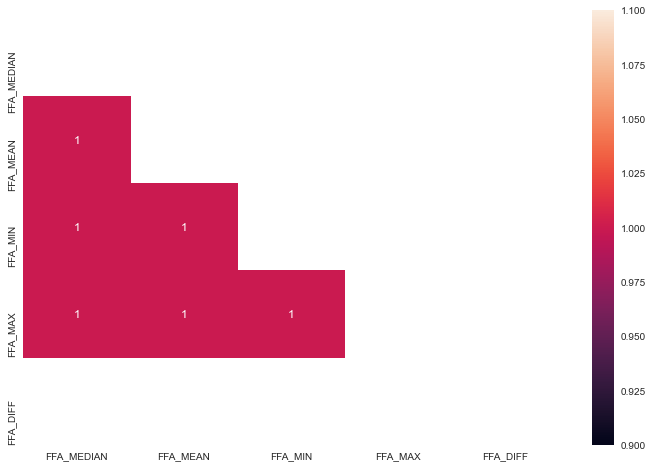

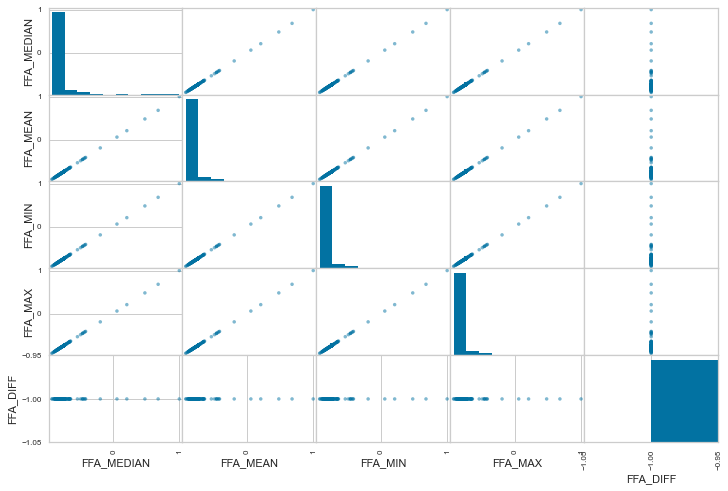

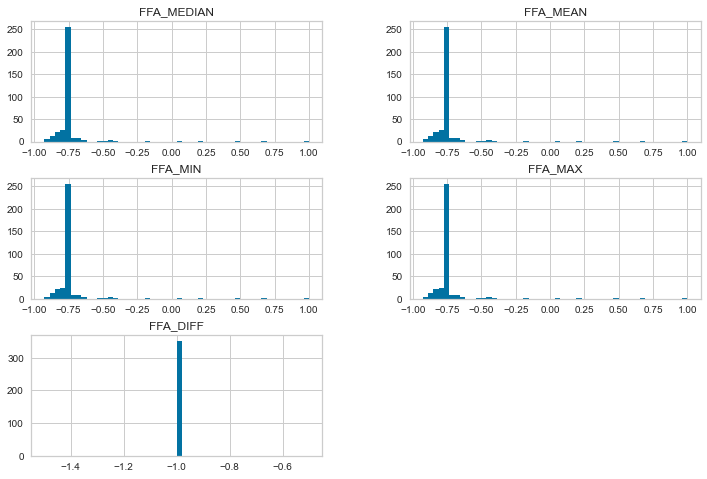

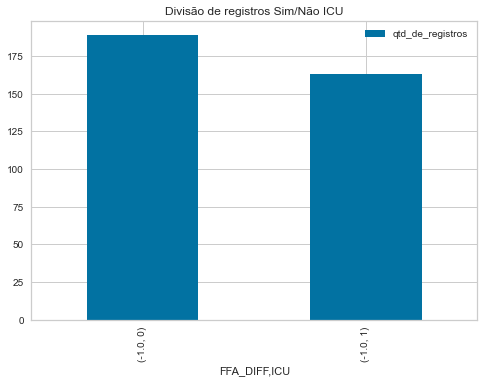

In [40]:
analisar_variaveis('FFA')

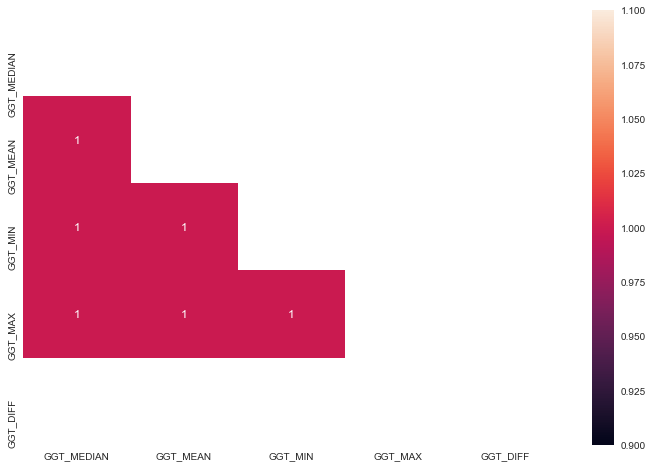

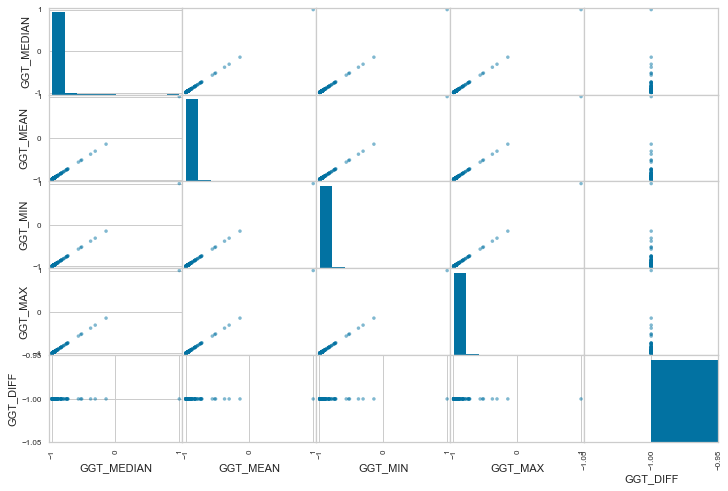

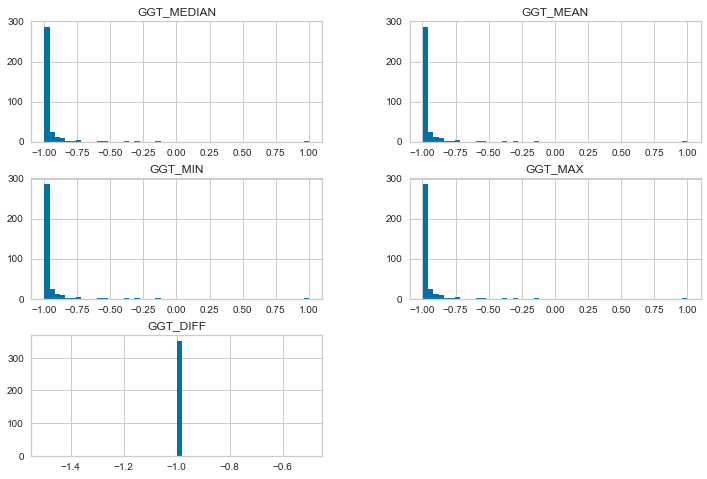

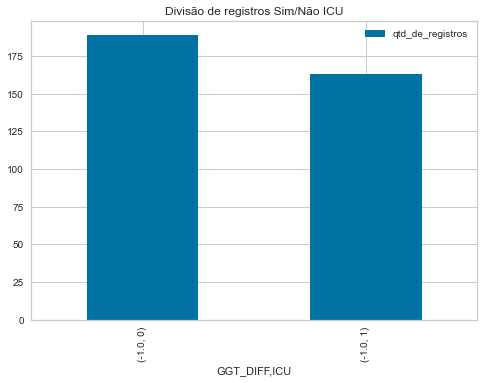

In [41]:
analisar_variaveis('GGT')

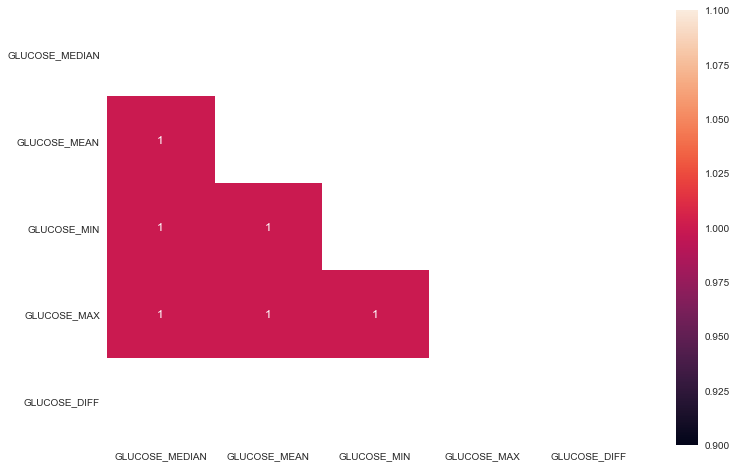

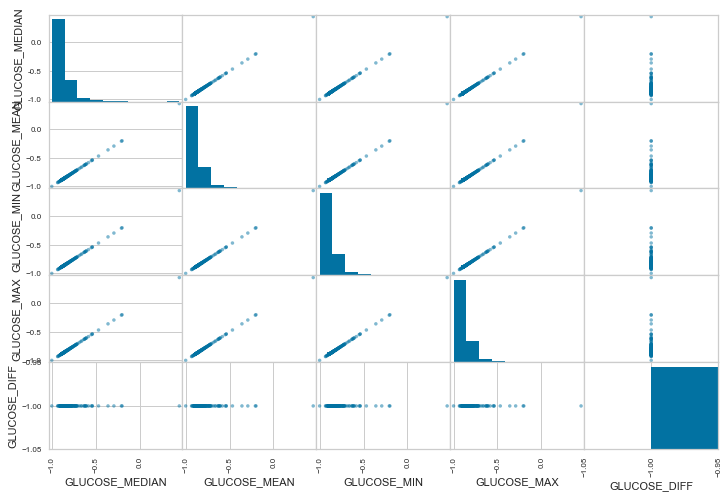

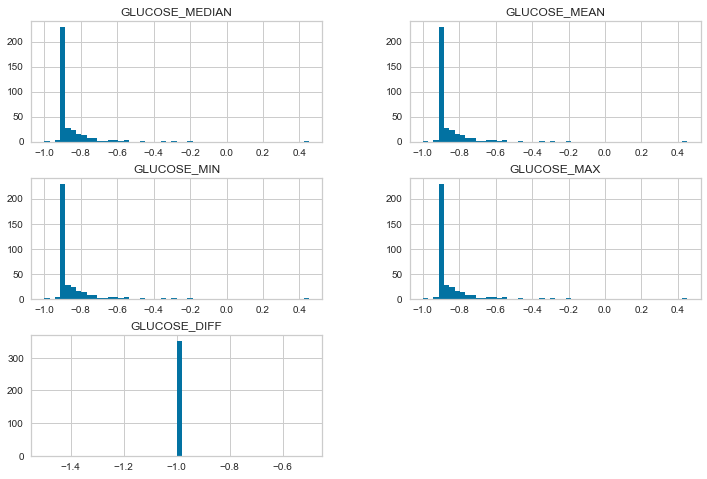

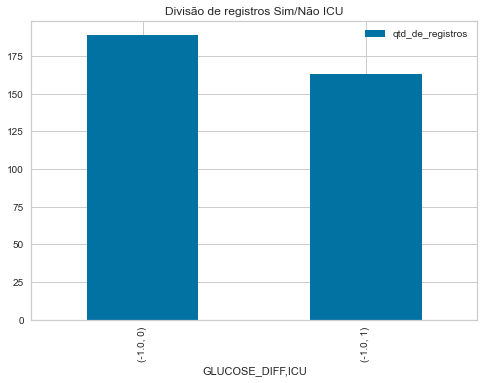

In [42]:
analisar_variaveis('GLUCOSE')

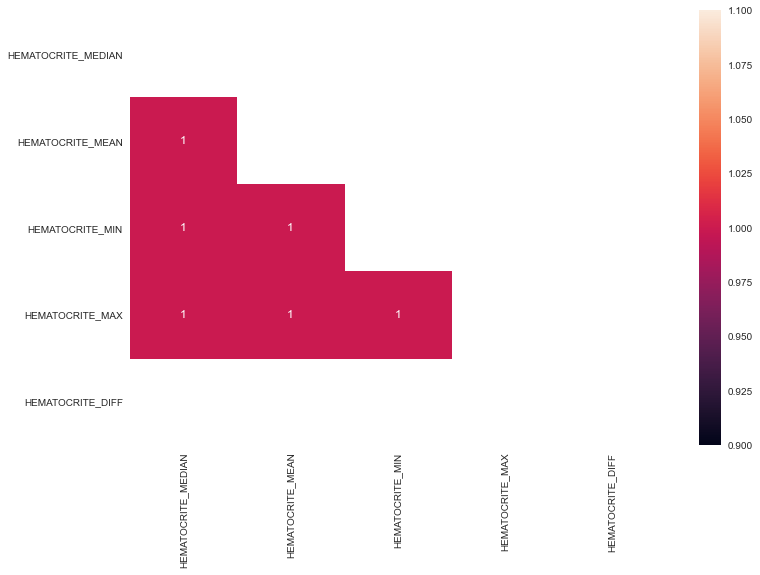

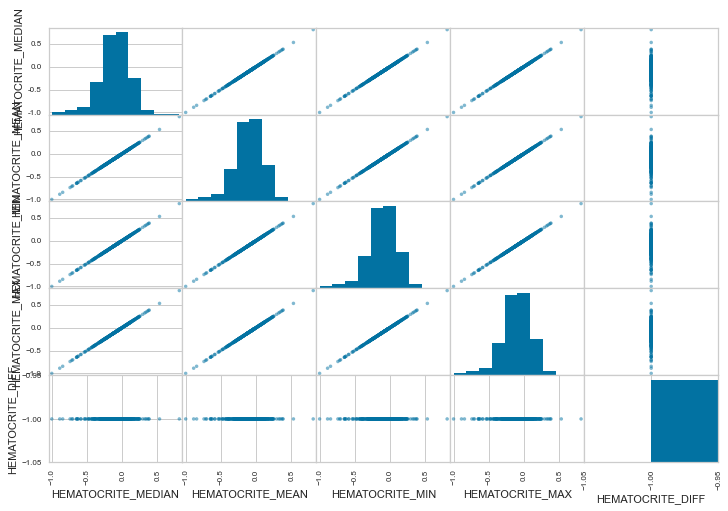

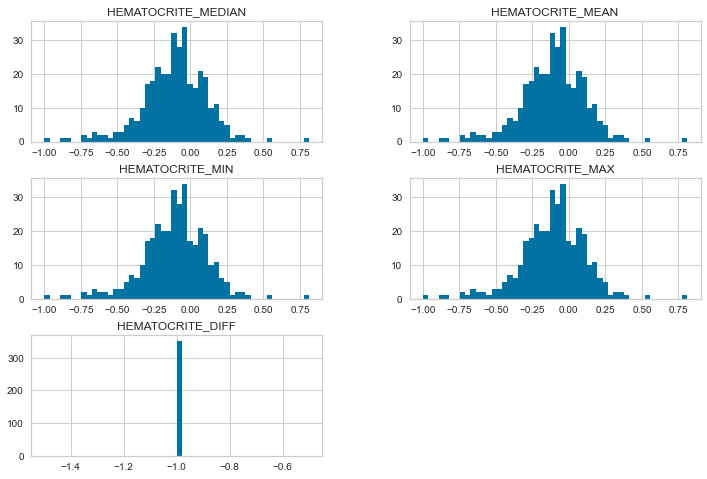

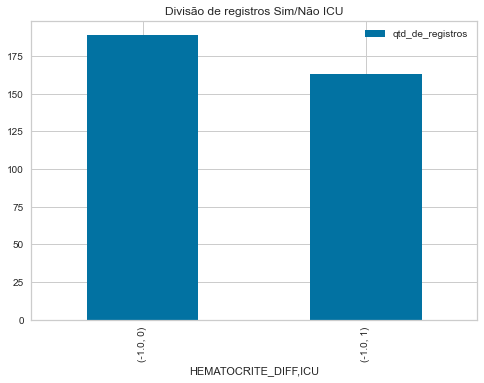

In [43]:
analisar_variaveis('HEMATOCRITE')

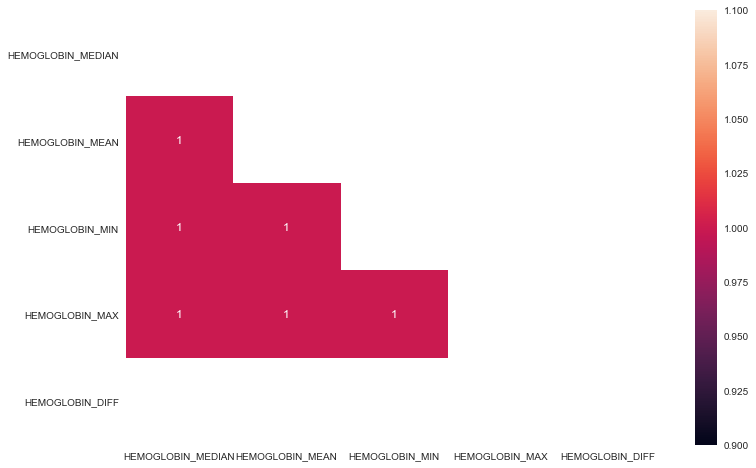

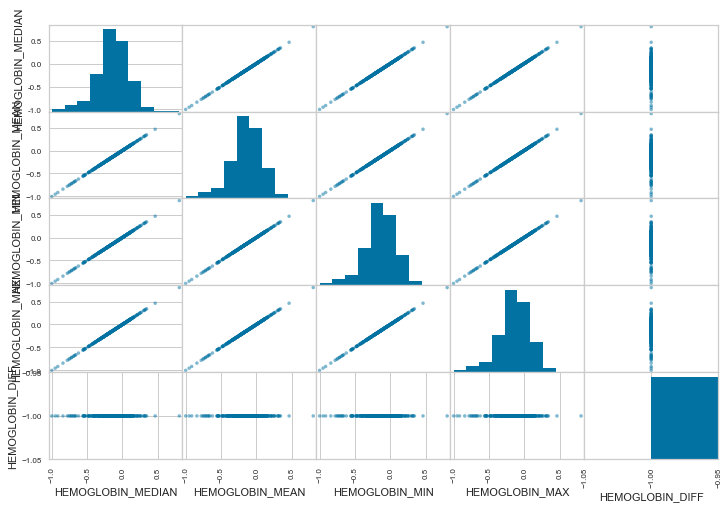

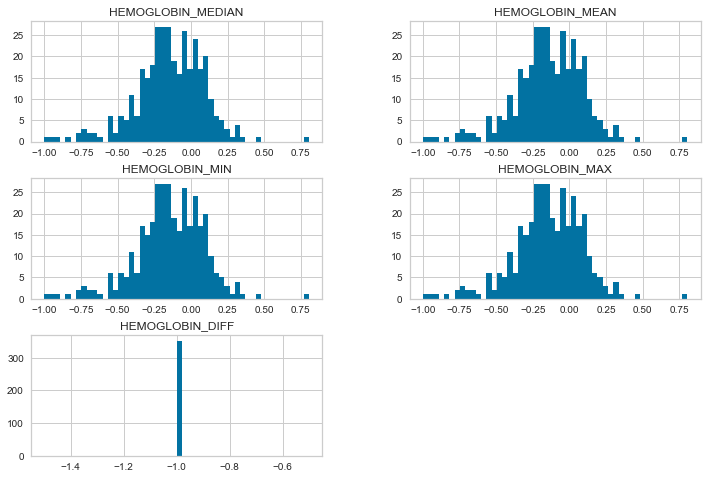

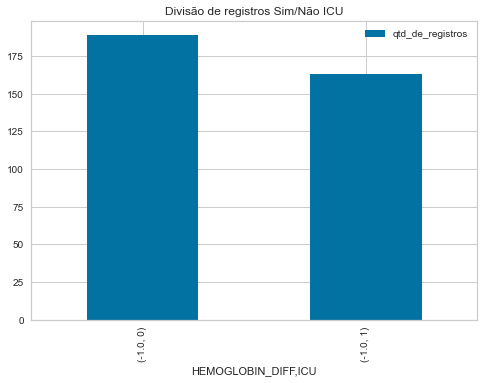

In [44]:
analisar_variaveis('HEMOGLOBIN')

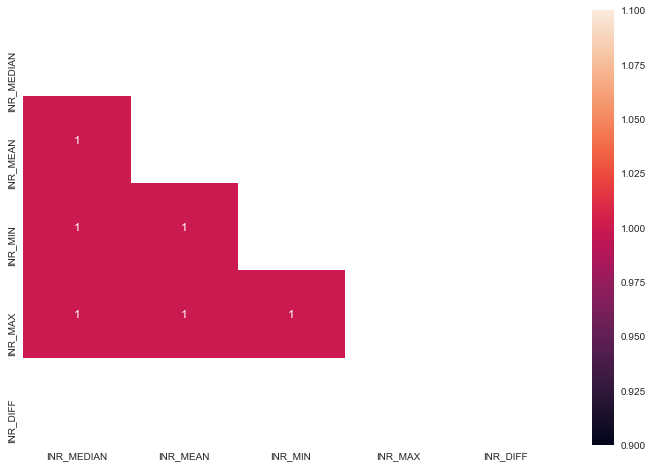

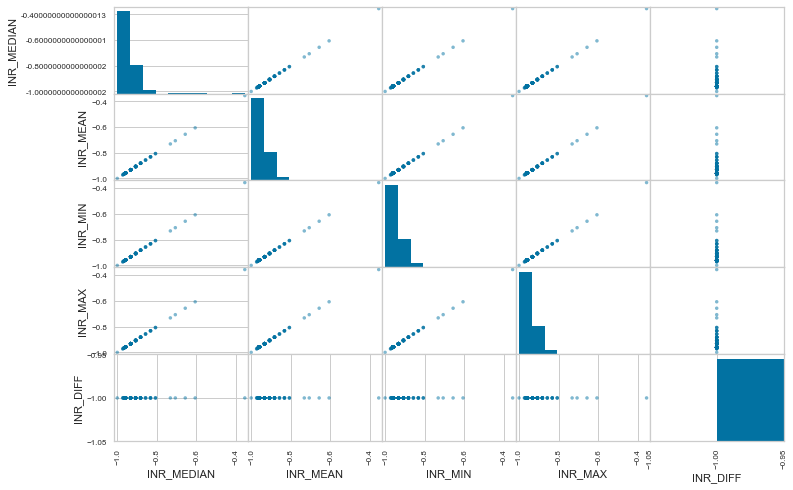

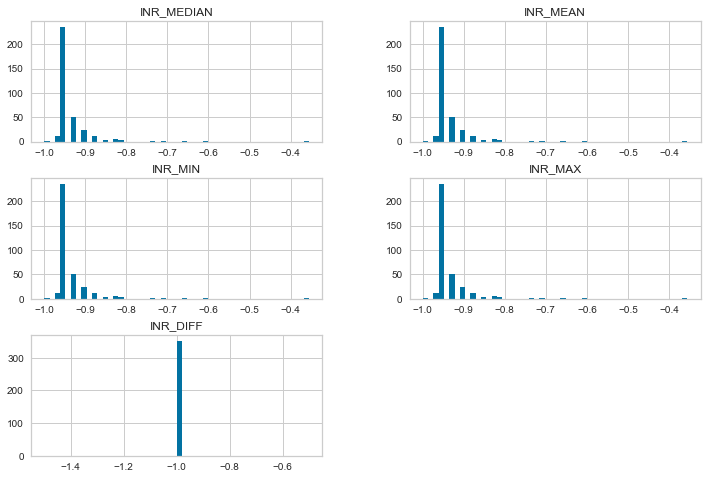

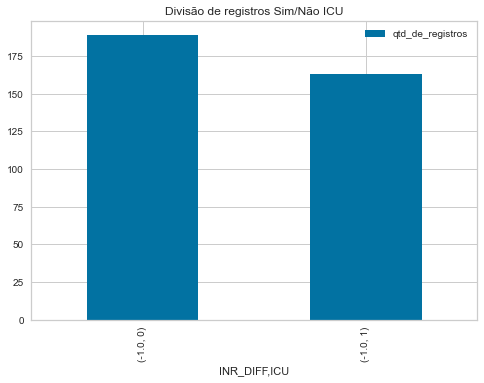

In [45]:
analisar_variaveis('INR')

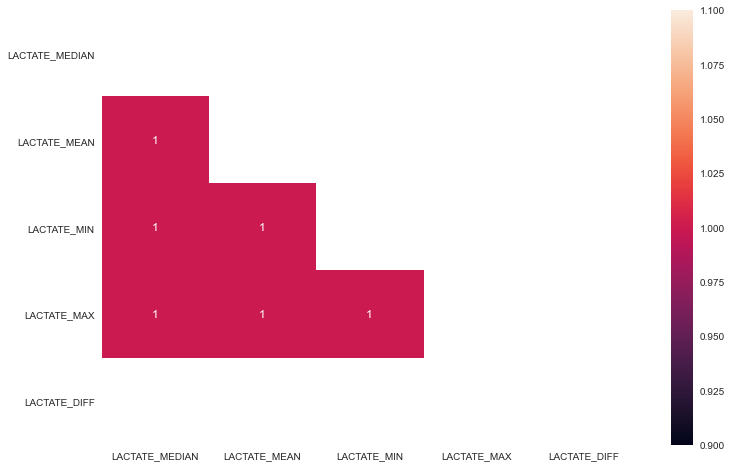

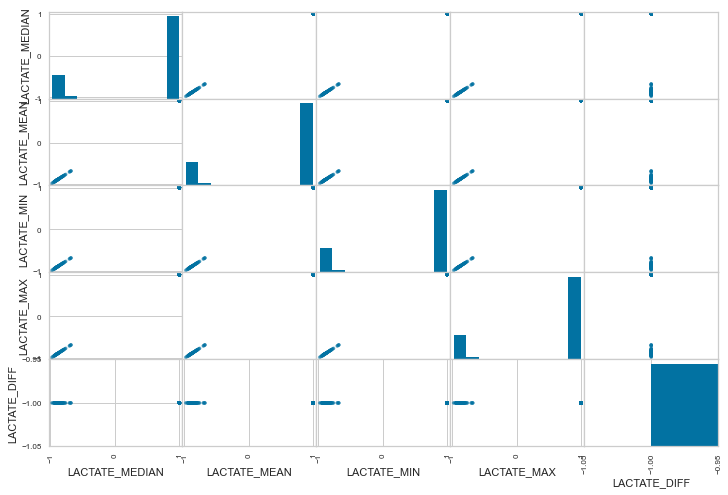

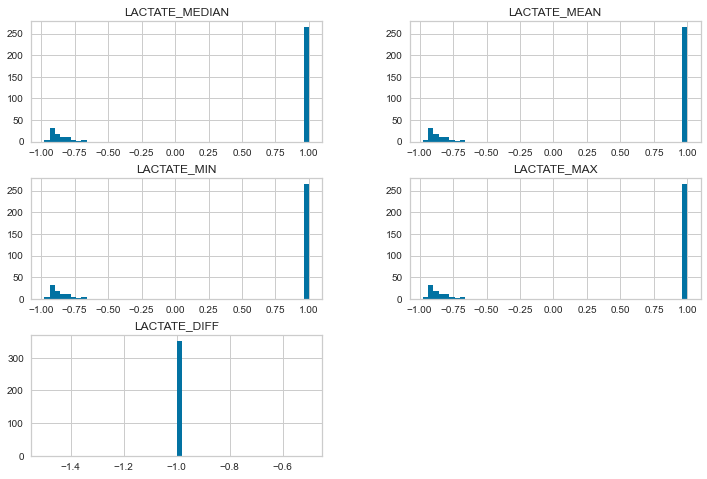

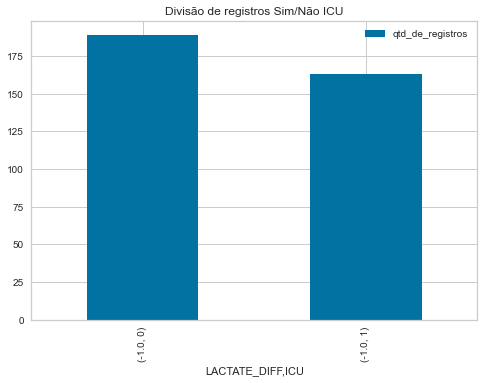

In [46]:
analisar_variaveis('LACTATE')

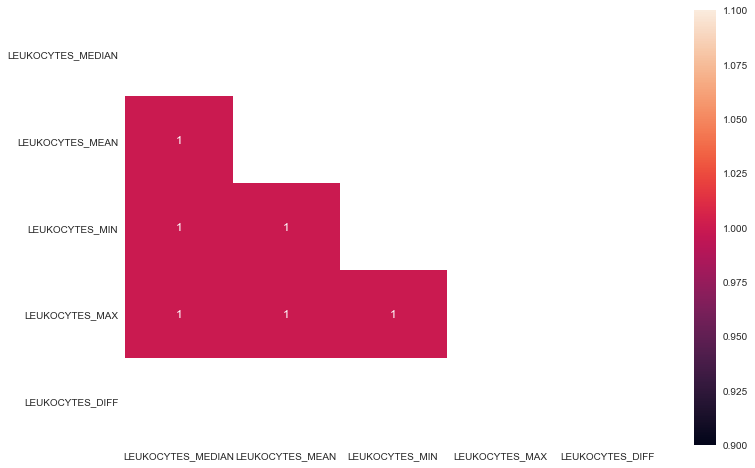

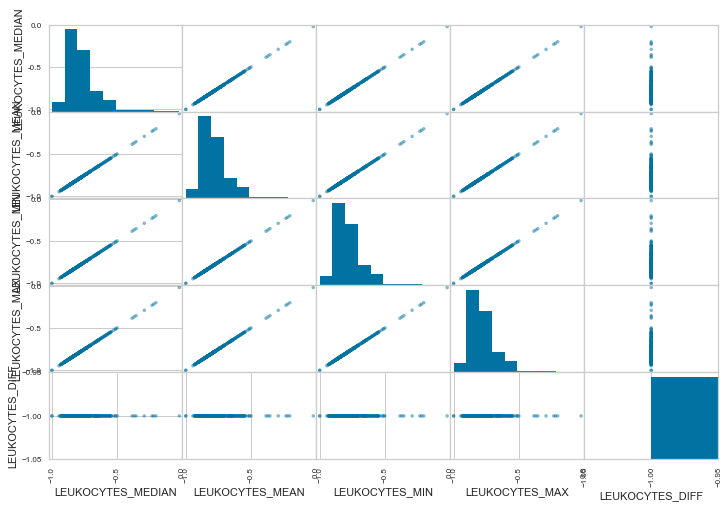

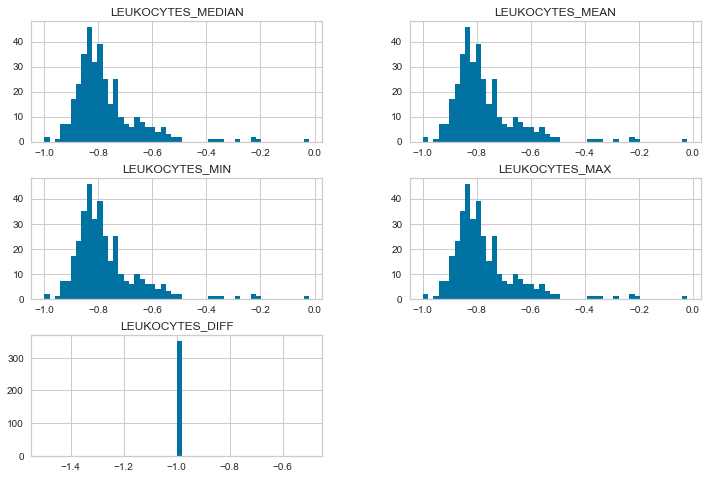

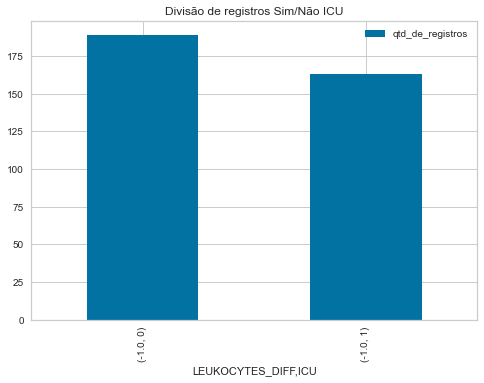

In [47]:
analisar_variaveis('LEUKOCYTES')

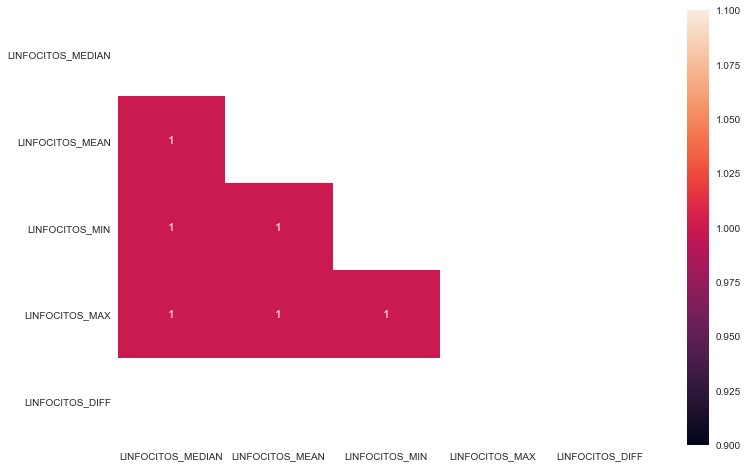

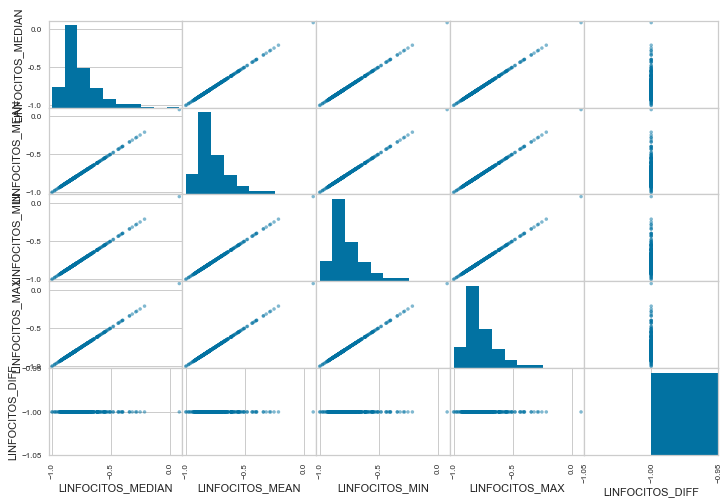

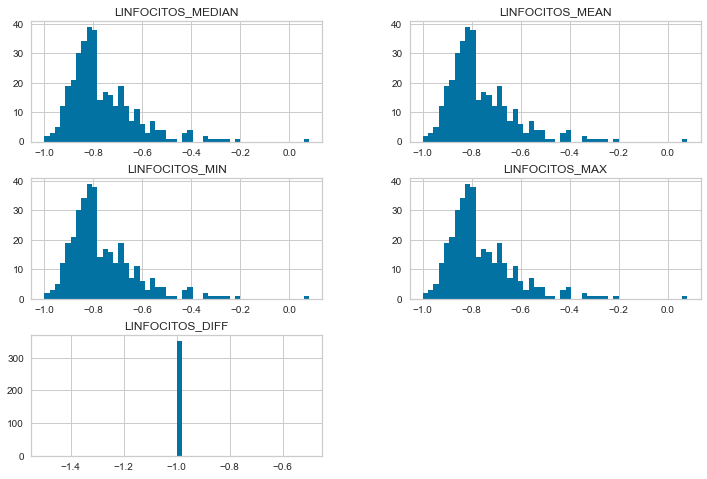

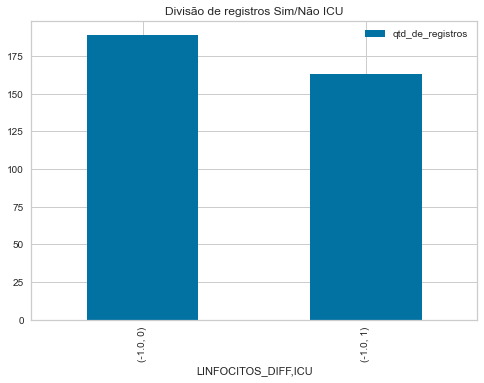

In [48]:
analisar_variaveis('LINFOCITOS')

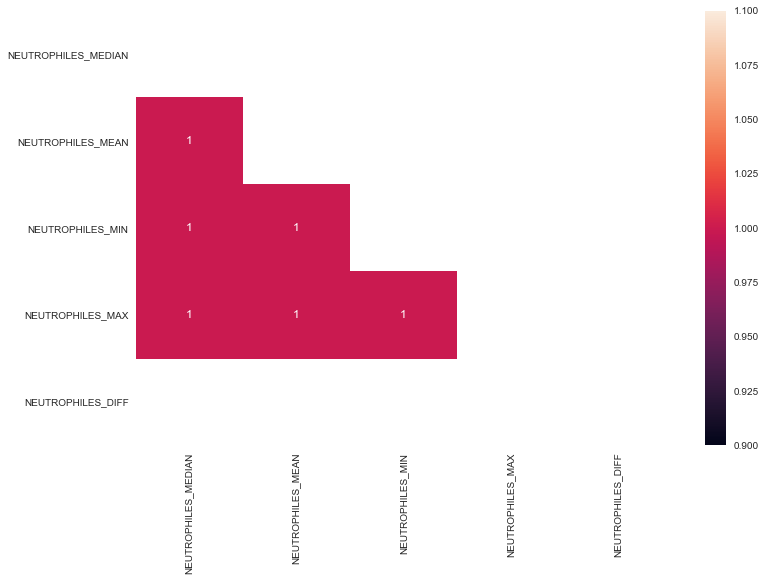

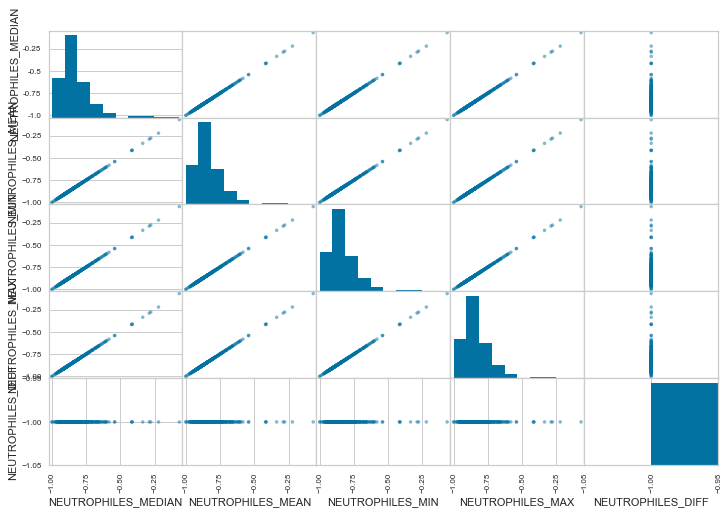

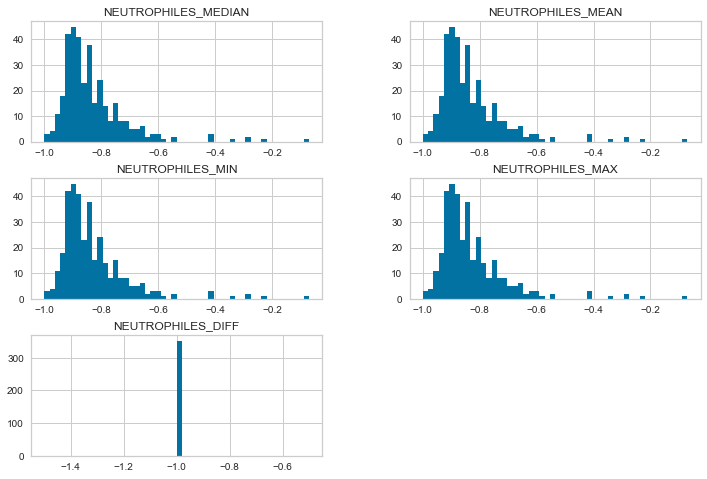

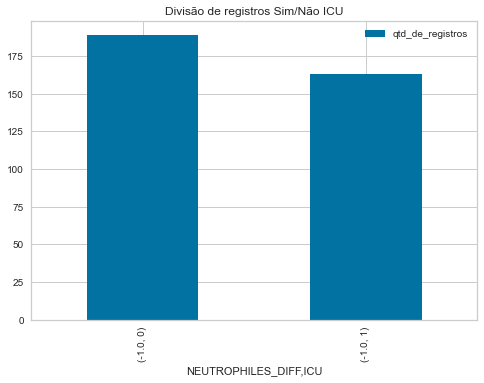

In [49]:
analisar_variaveis('NEUTROPHILES')

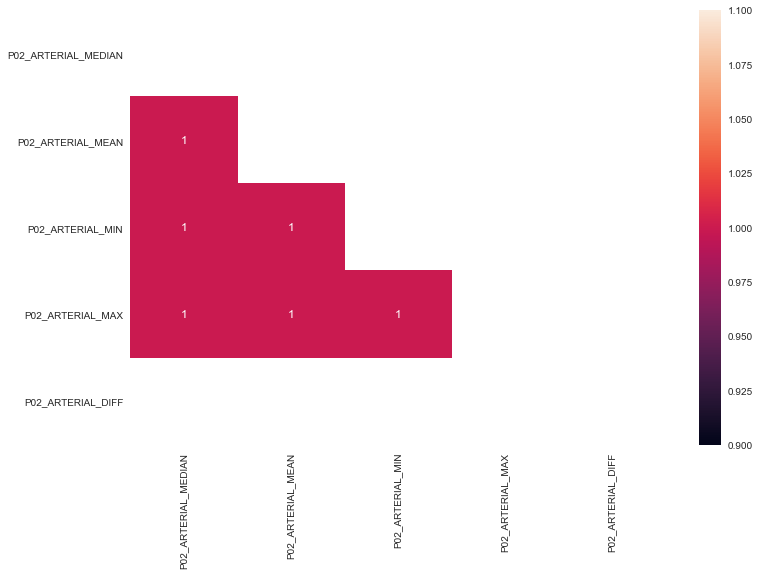

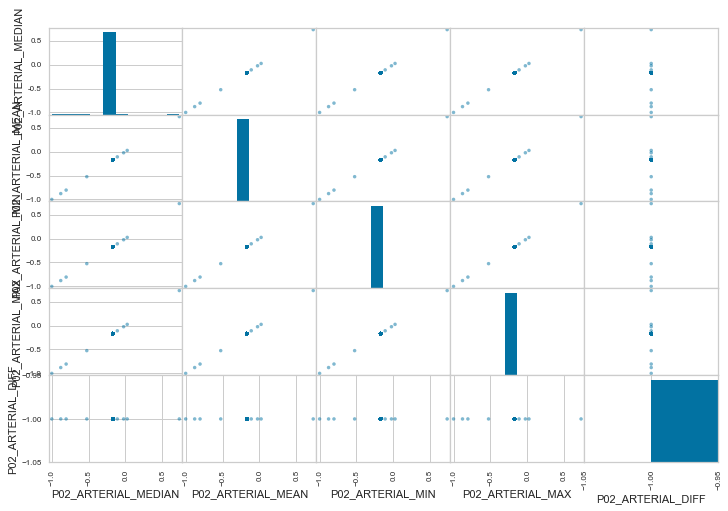

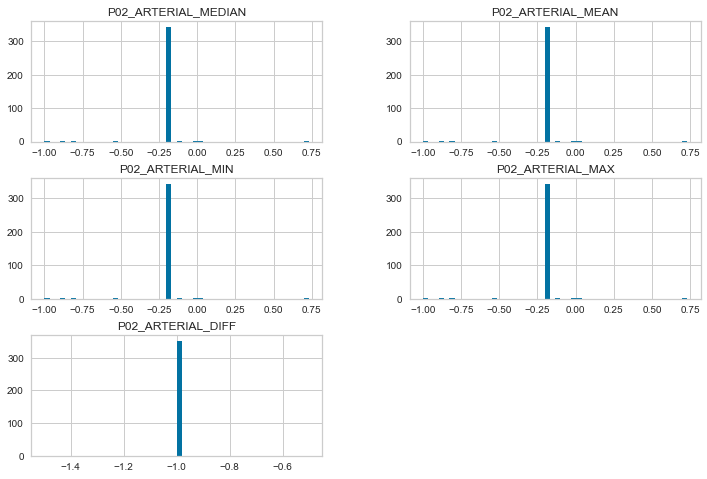

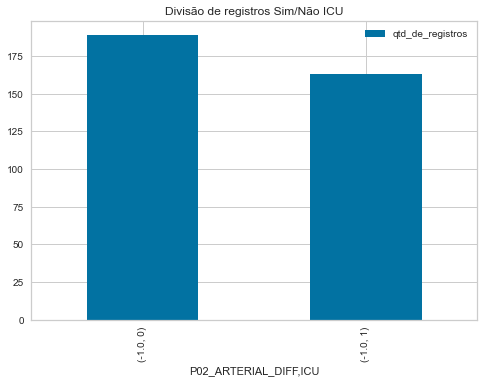

In [50]:
analisar_variaveis('P02_ARTERIAL')

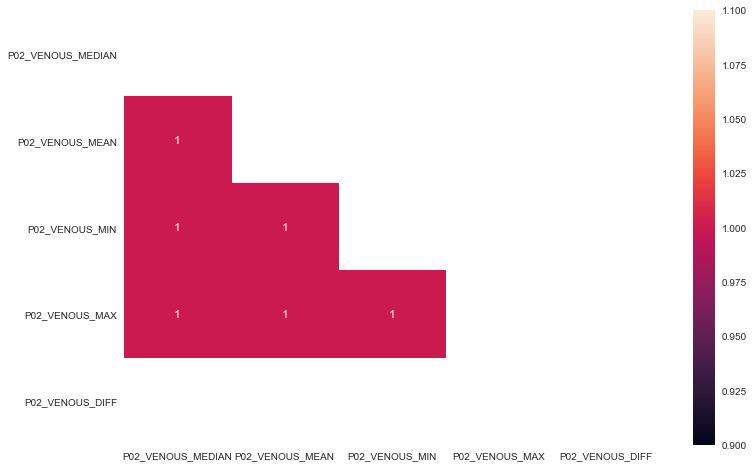

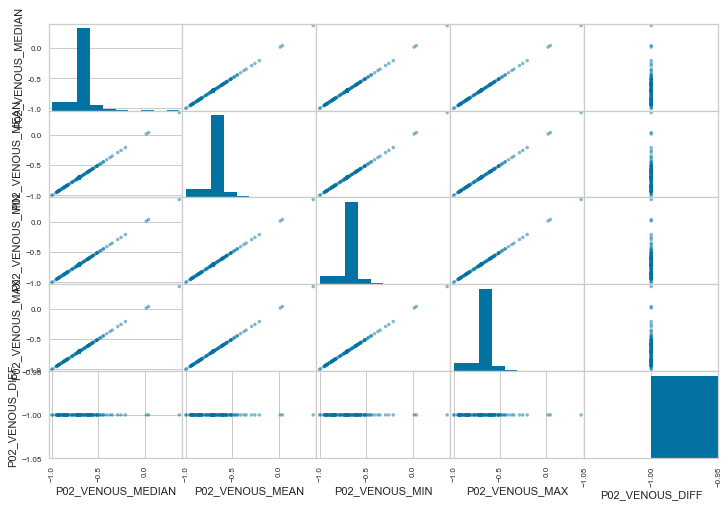

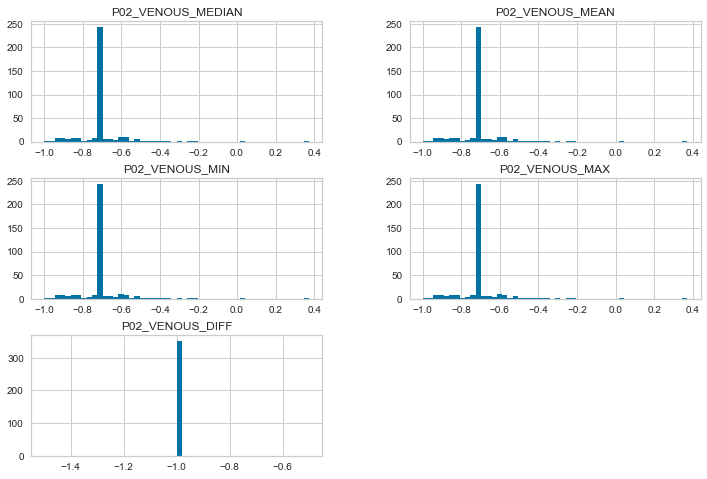

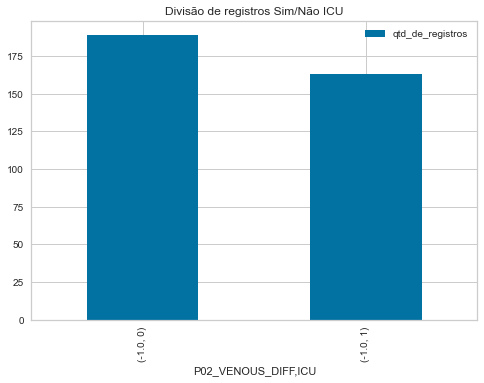

In [51]:
analisar_variaveis('P02_VENOUS')

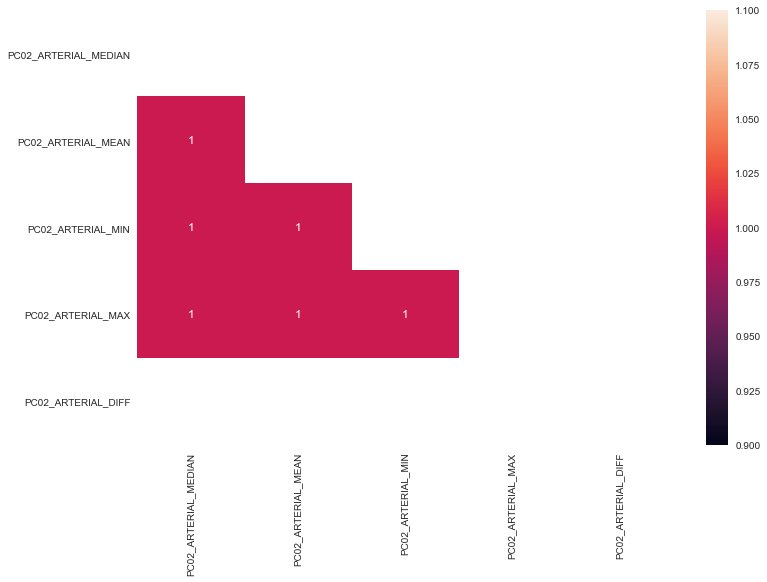

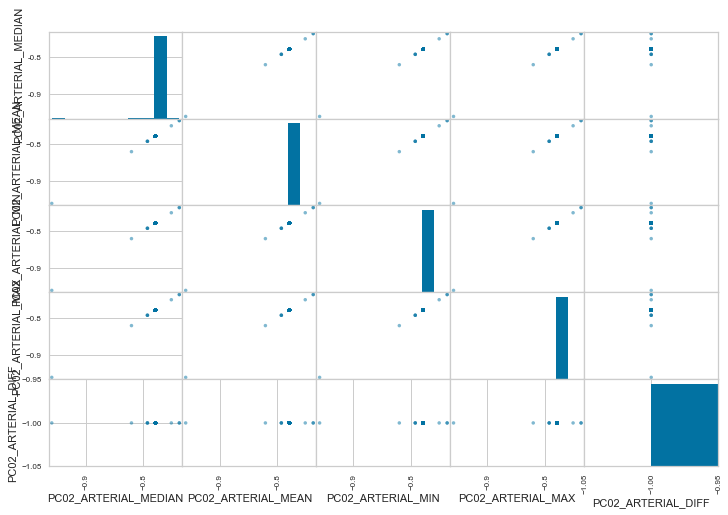

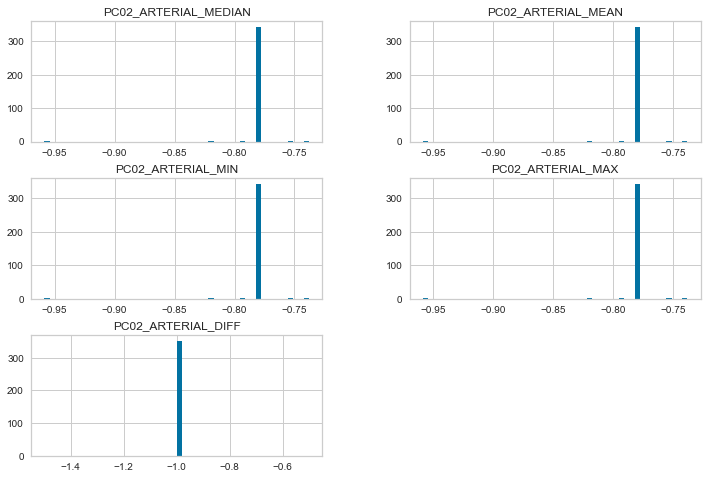

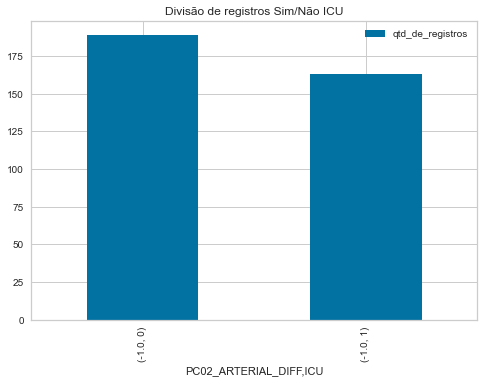

In [52]:
analisar_variaveis('PC02_ARTERIAL')

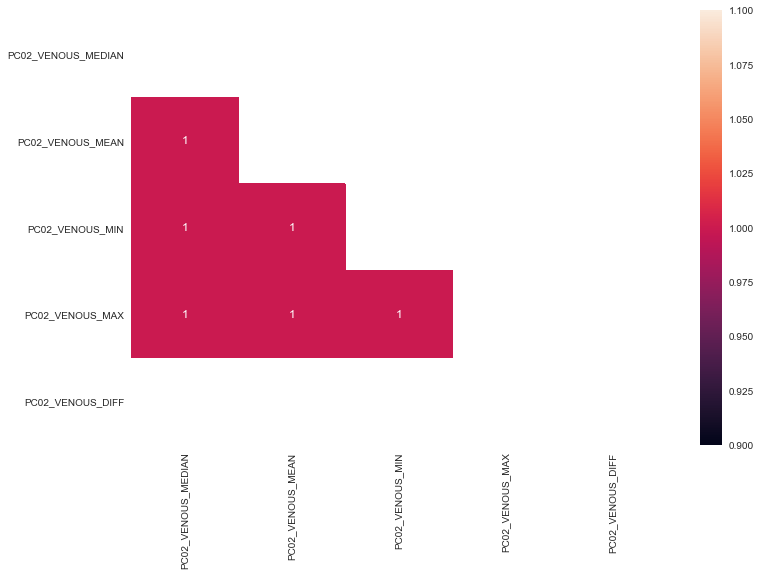

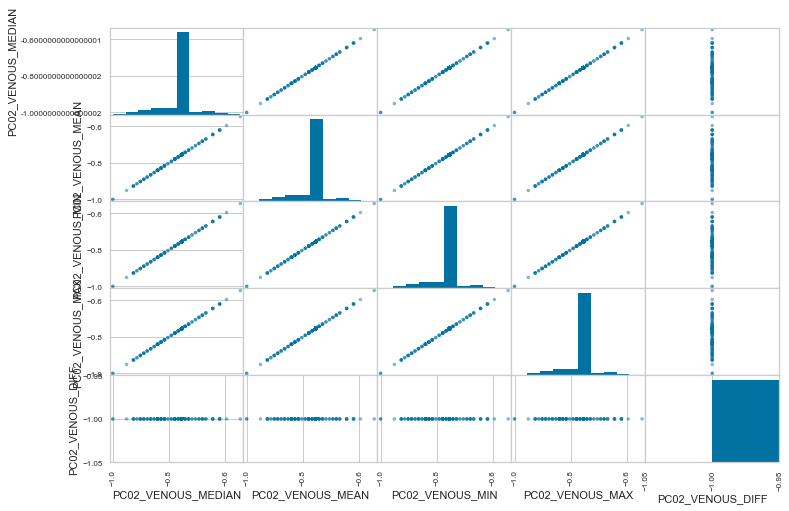

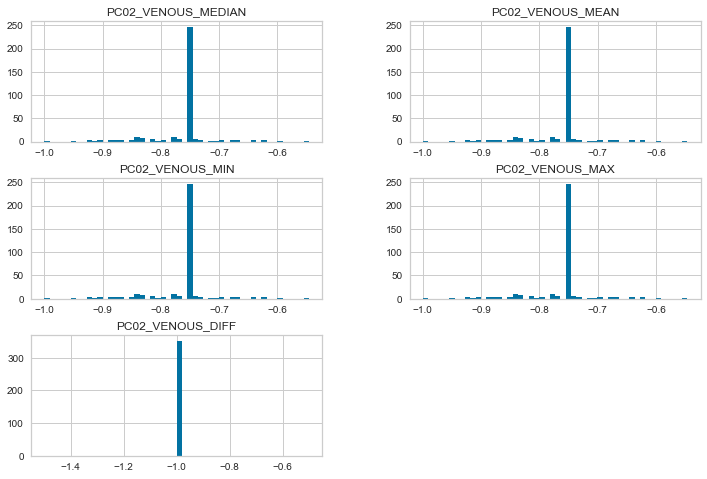

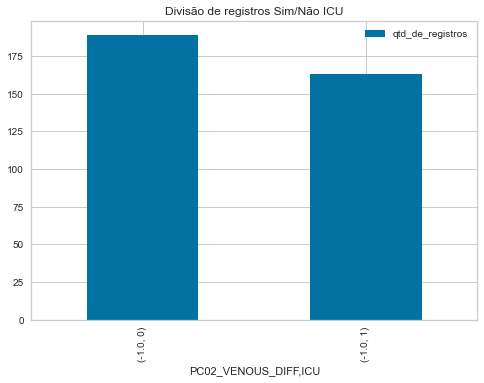

In [53]:
analisar_variaveis('PC02_VENOUS')

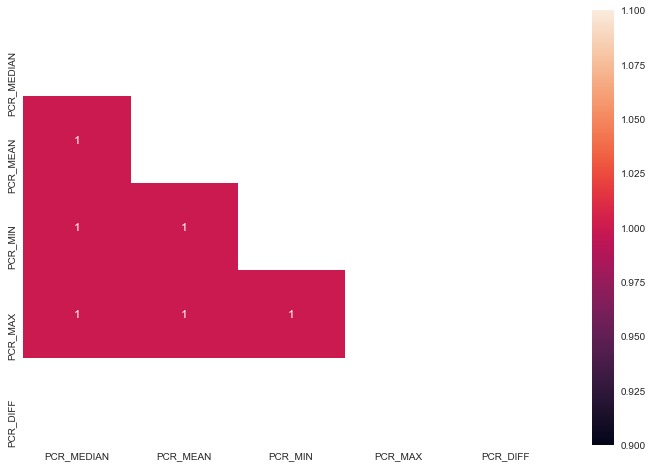

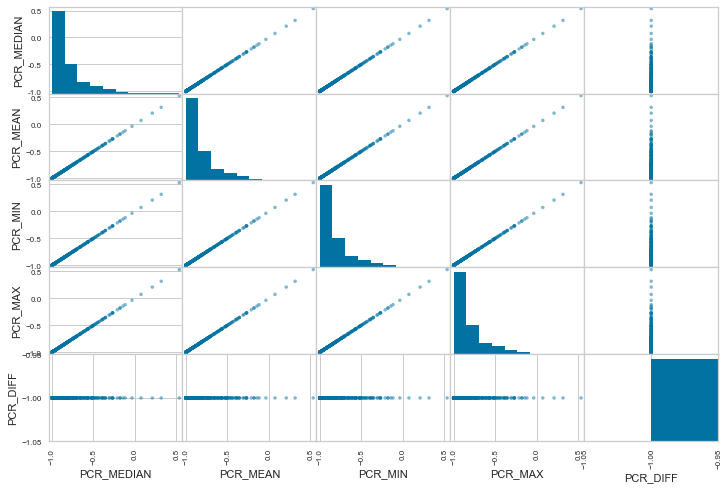

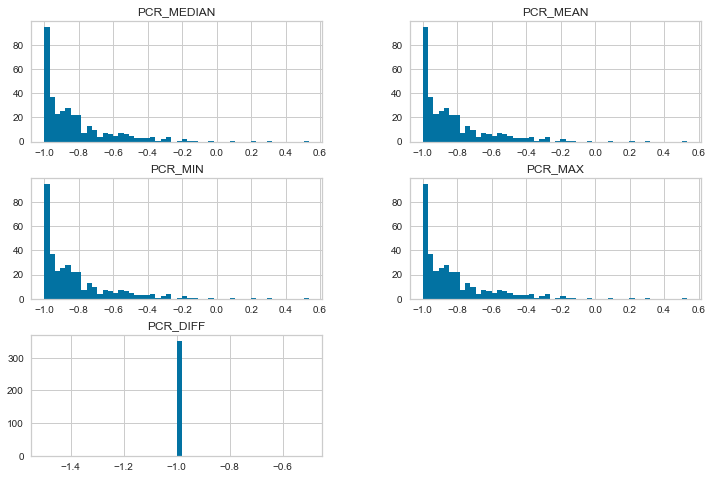

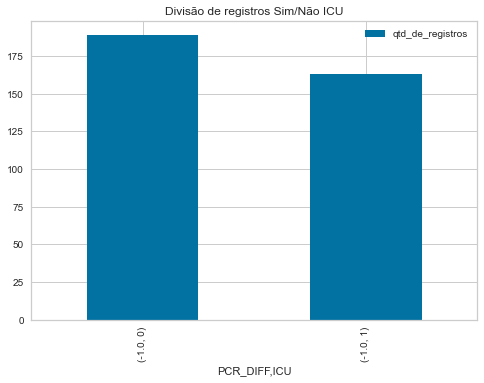

In [54]:
analisar_variaveis('PCR')

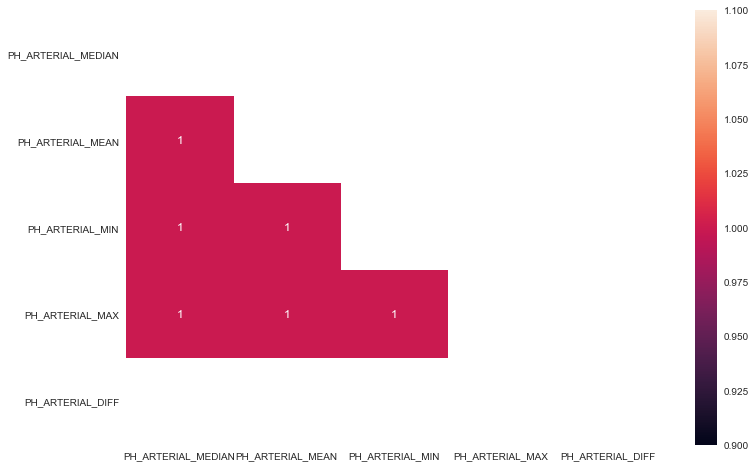

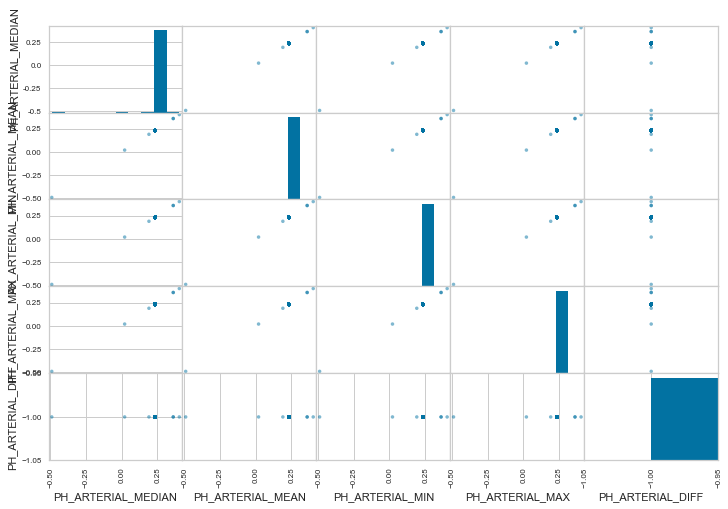

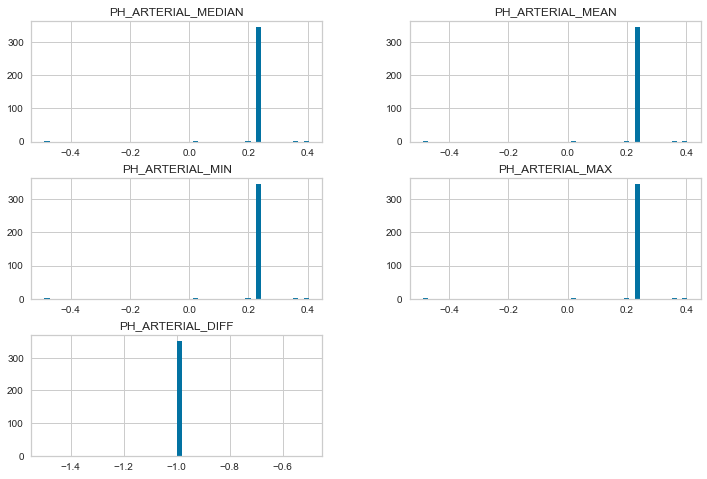

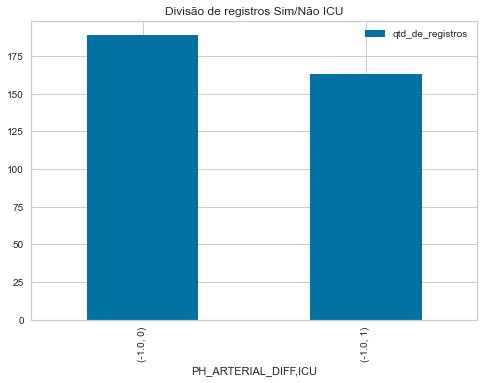

In [55]:
analisar_variaveis('PH_ARTERIAL')

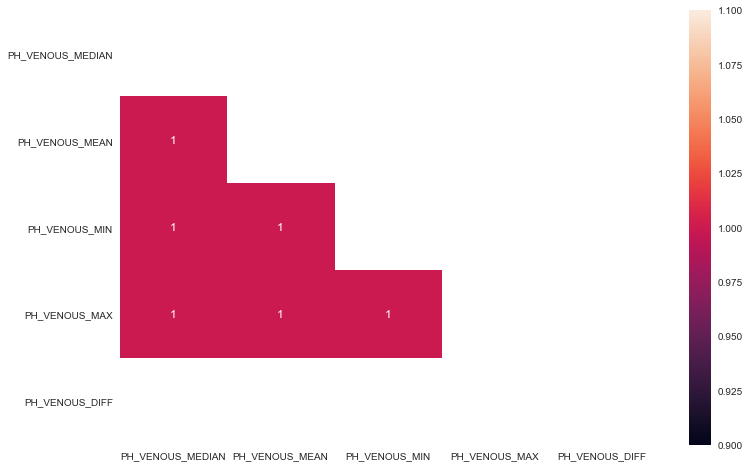

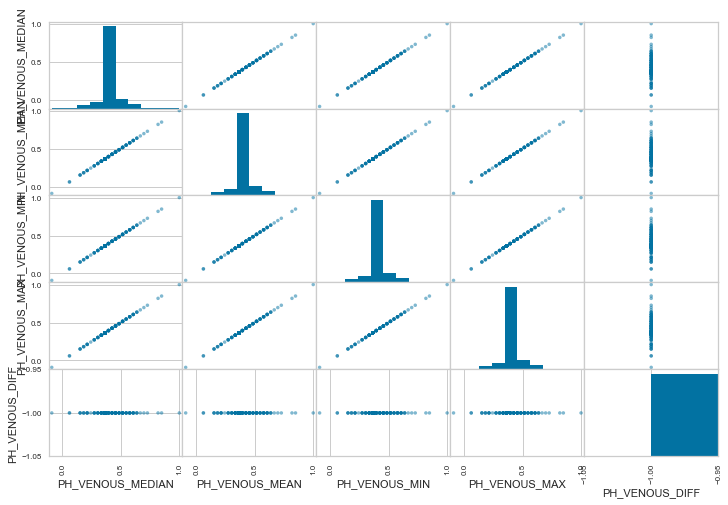

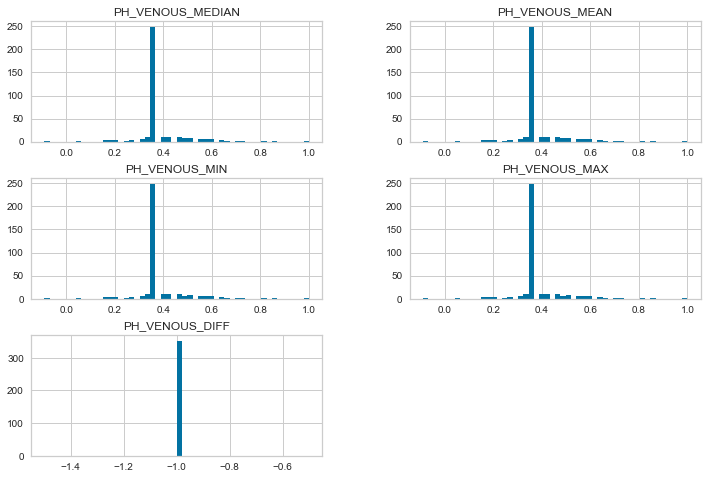

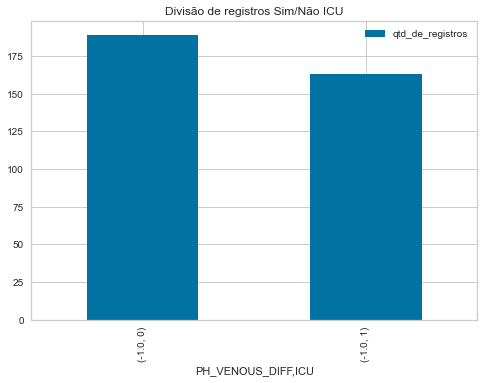

In [56]:
analisar_variaveis('PH_VENOUS')

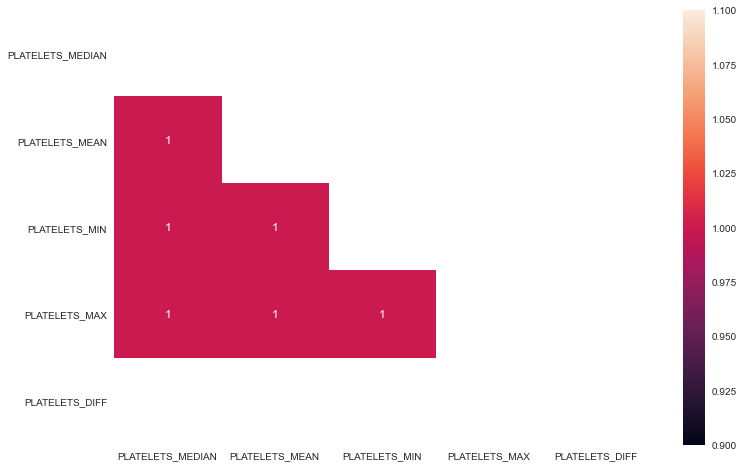

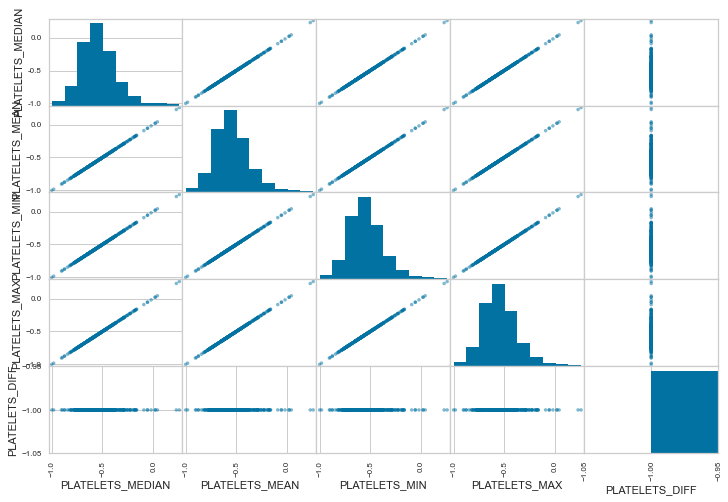

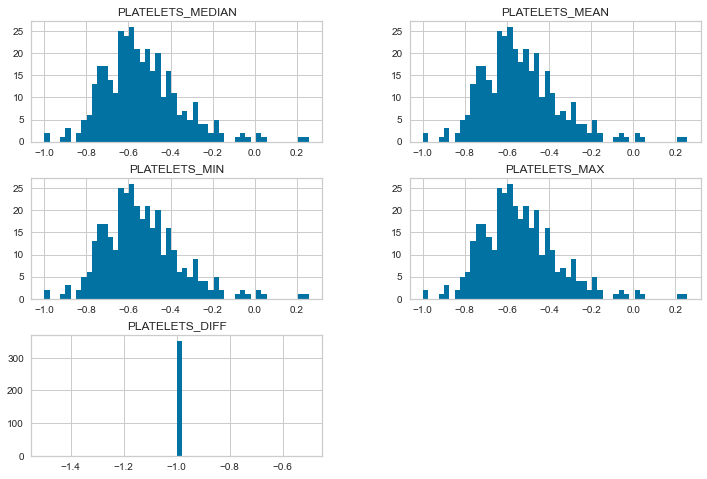

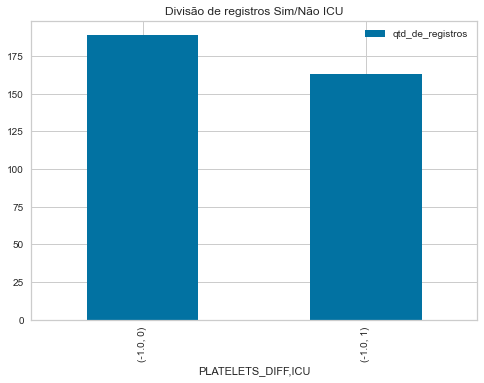

In [57]:
analisar_variaveis('PLATELETS')

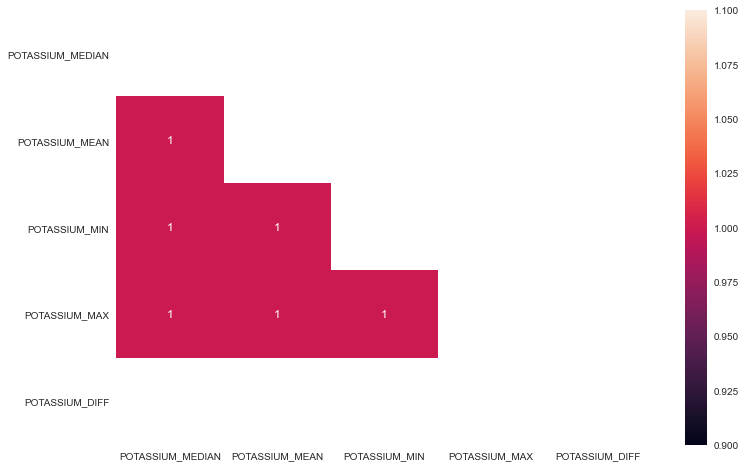

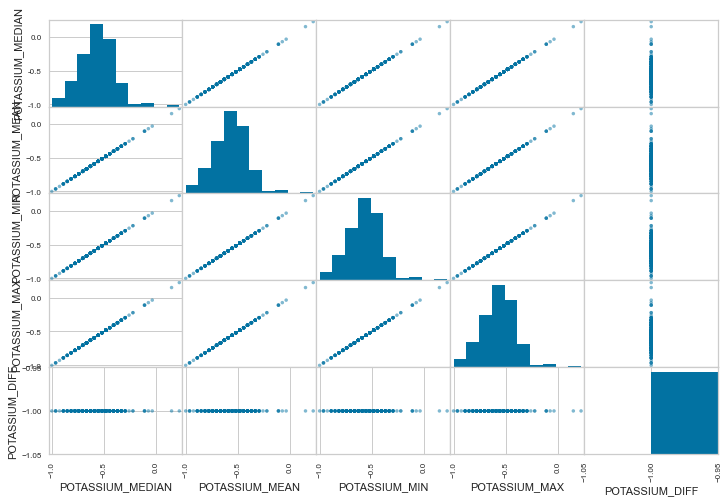

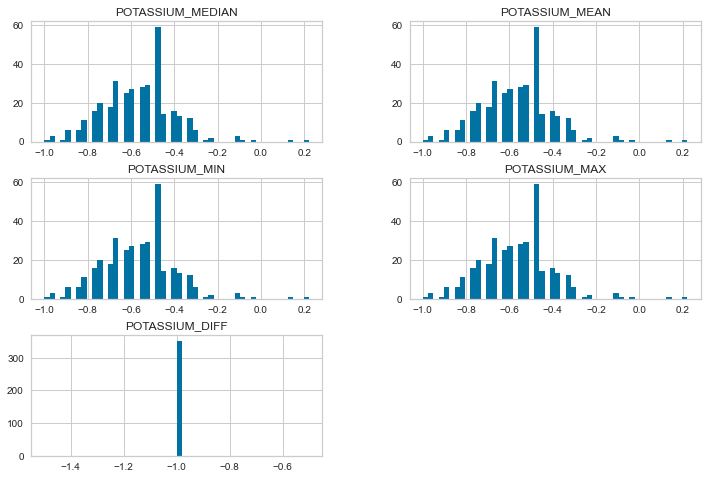

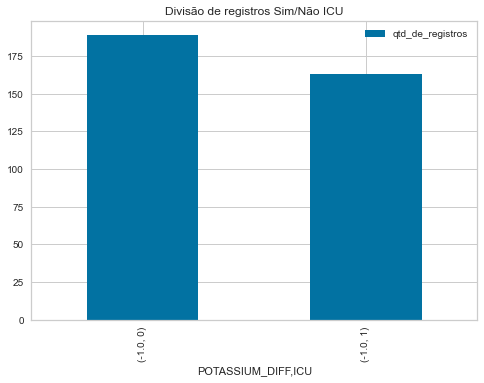

In [58]:
analisar_variaveis('POTASSIUM')

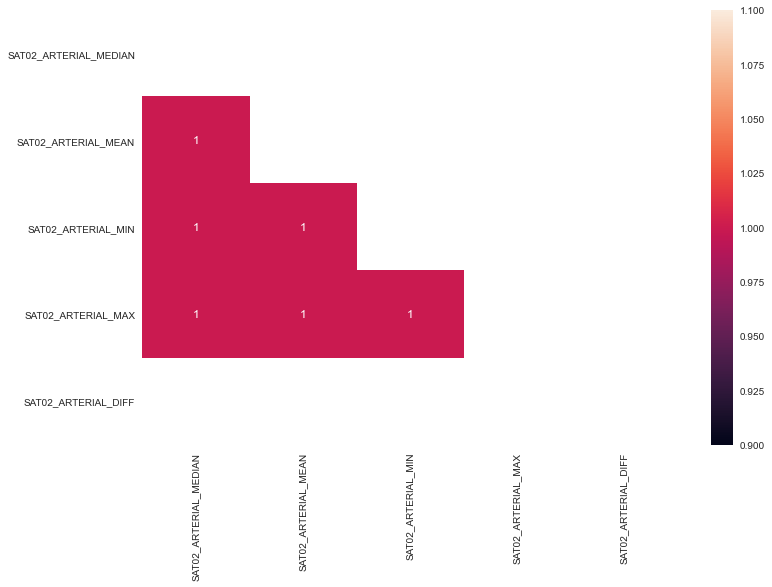

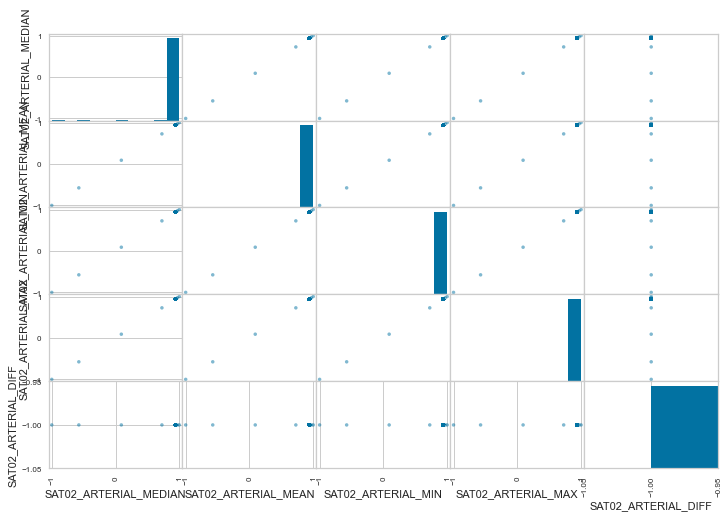

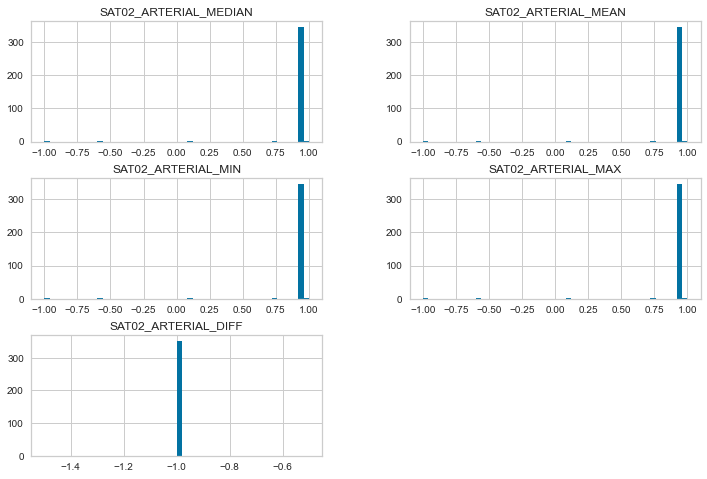

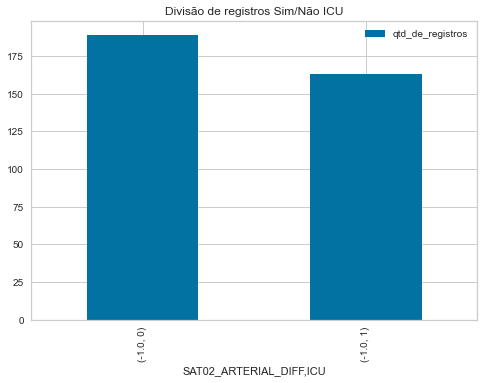

In [59]:
analisar_variaveis('SAT02_ARTERIAL')

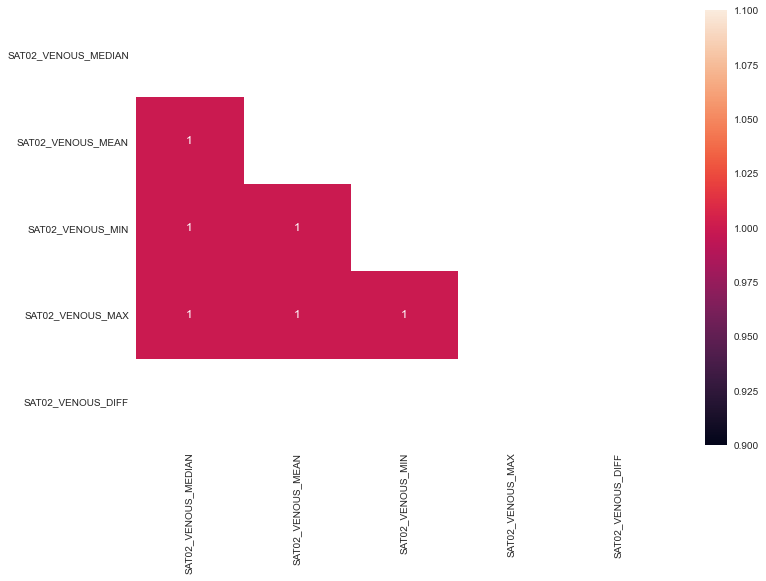

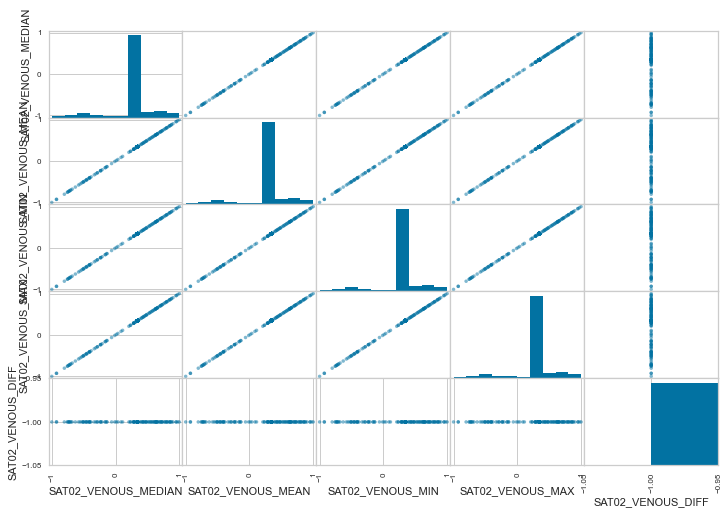

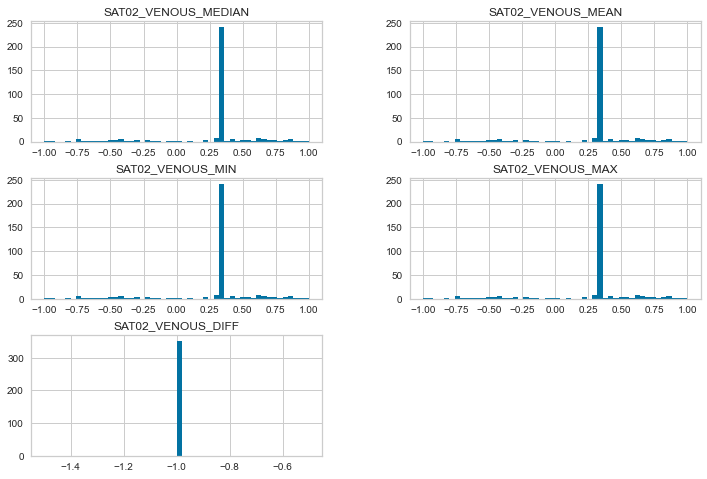

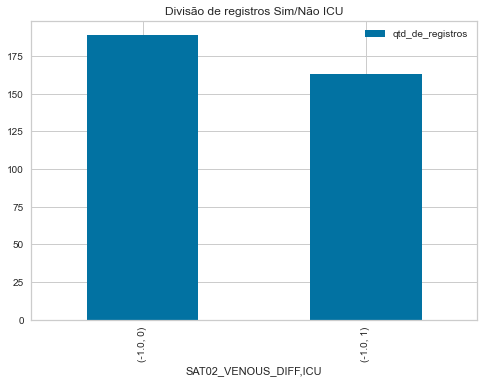

In [60]:
analisar_variaveis('SAT02_VENOUS')

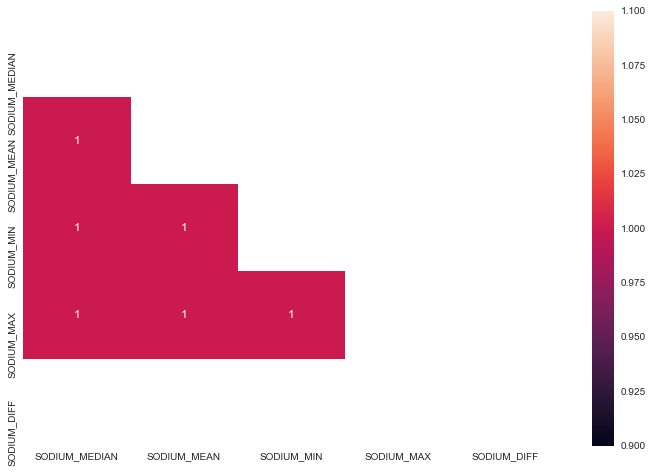

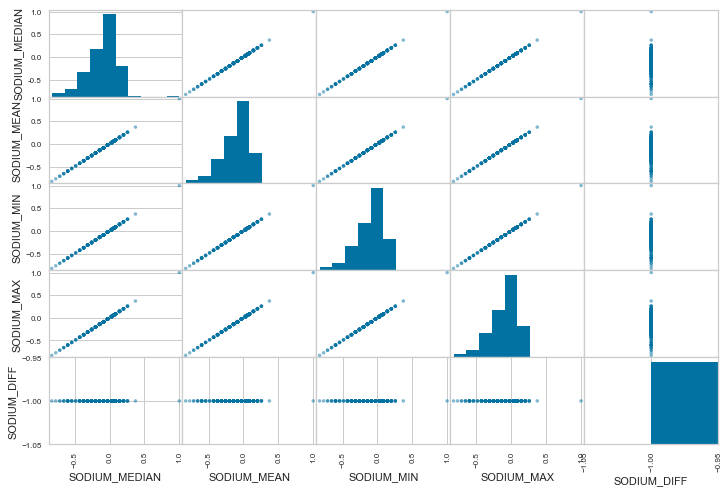

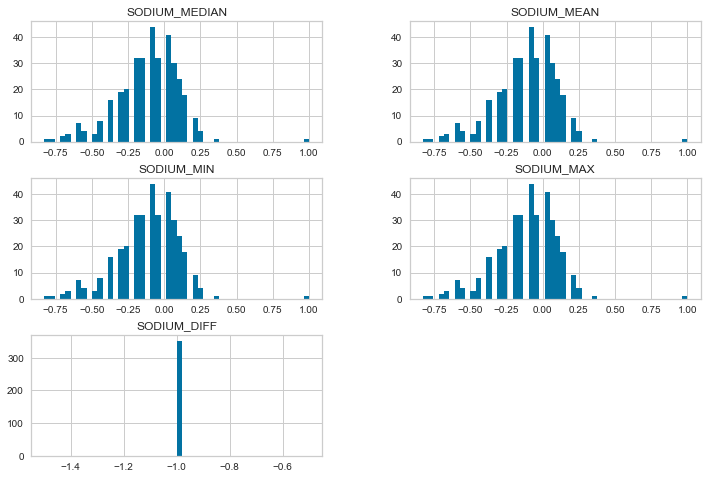

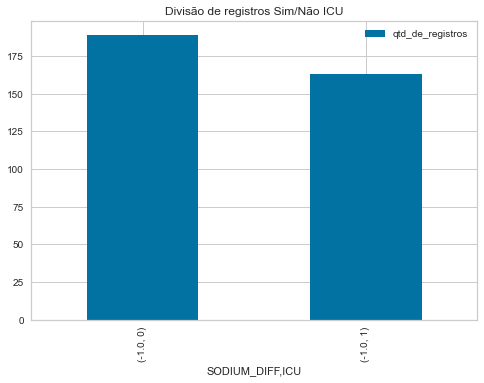

In [61]:
analisar_variaveis('SODIUM')

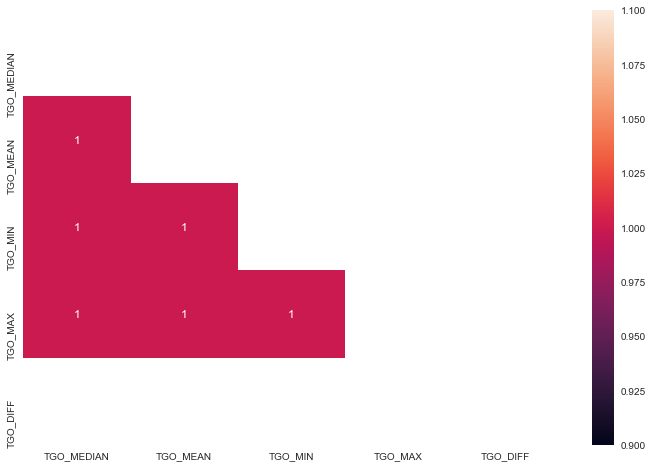

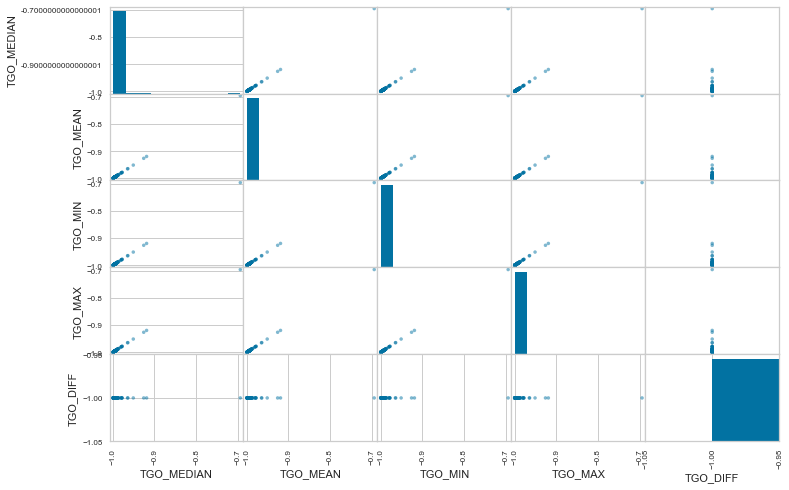

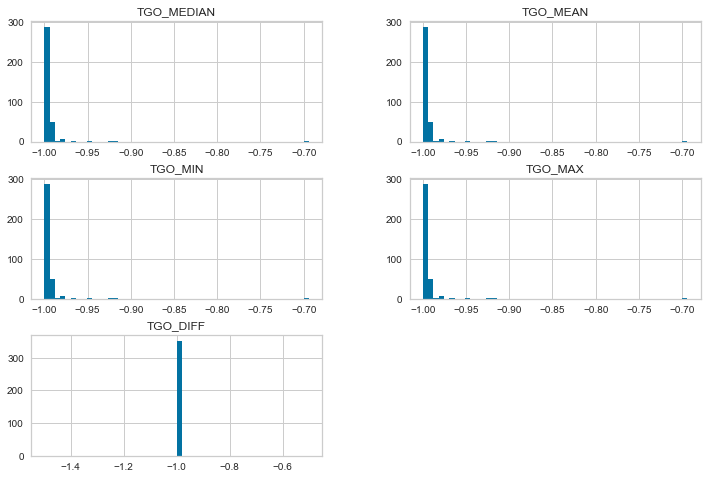

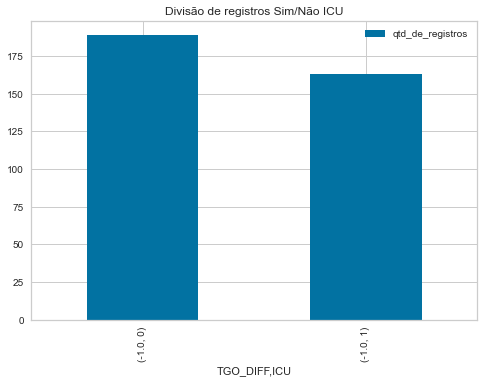

In [62]:
analisar_variaveis('TGO')

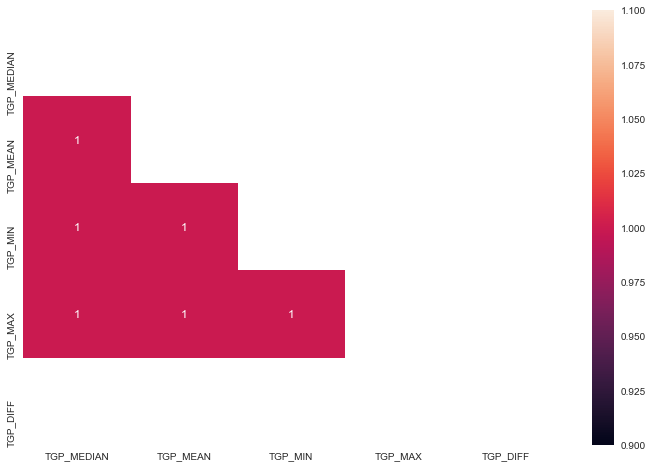

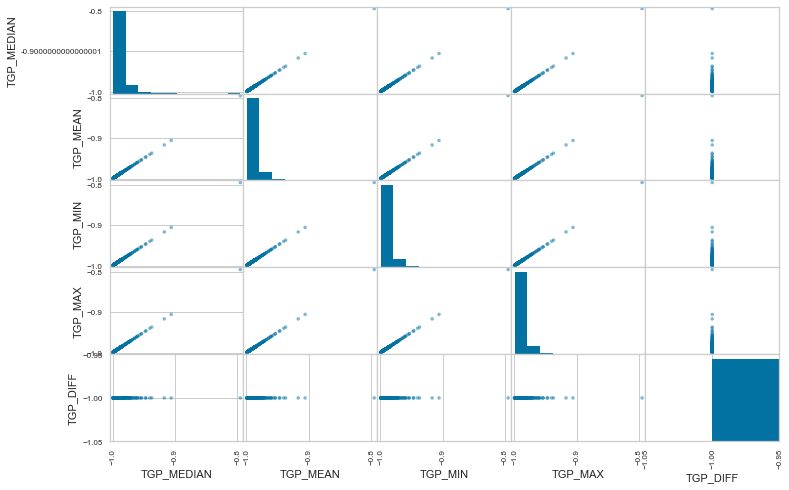

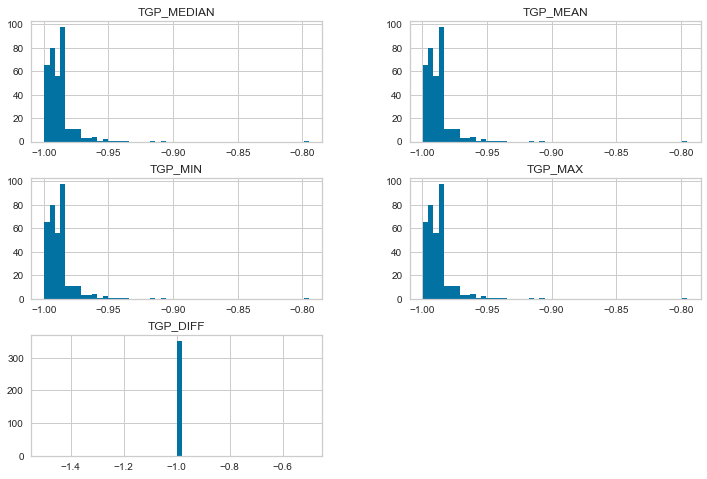

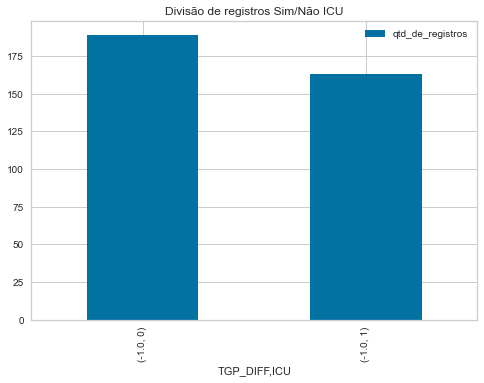

In [63]:
analisar_variaveis('TGP')

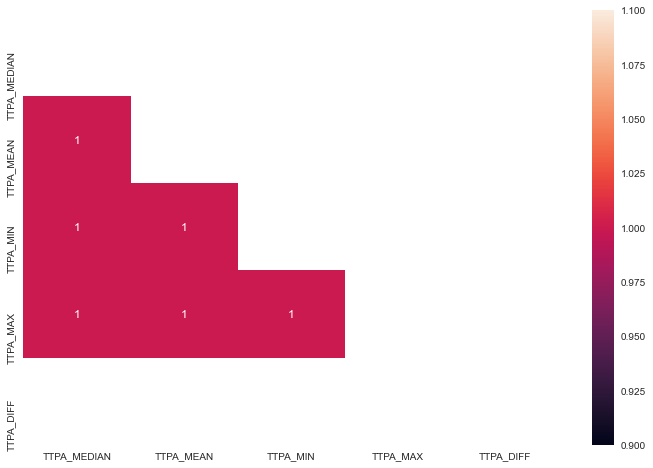

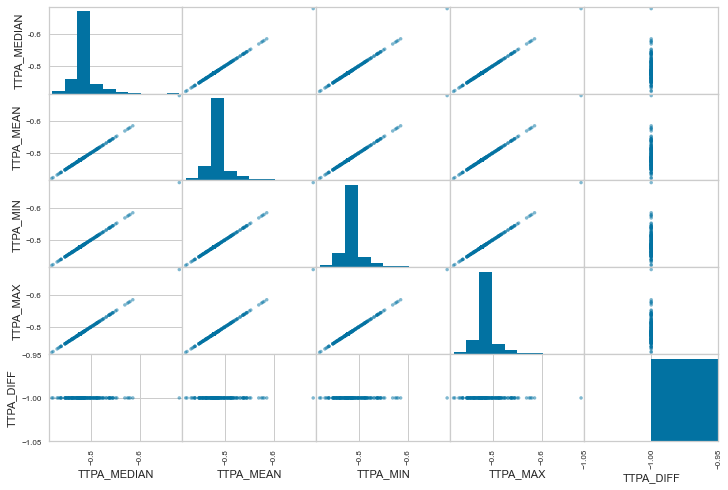

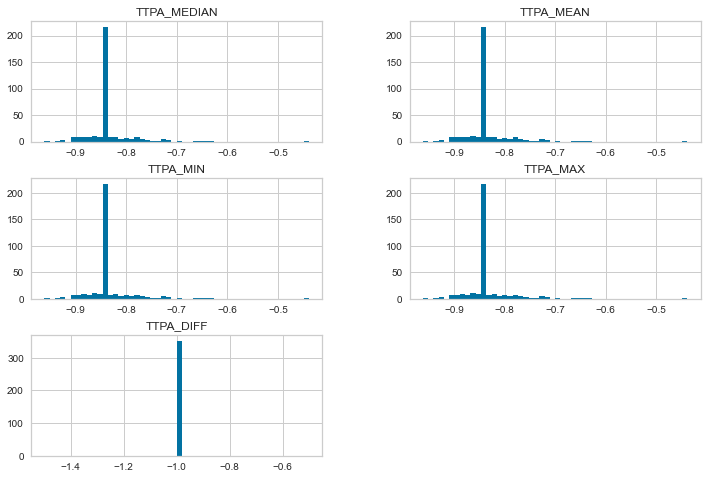

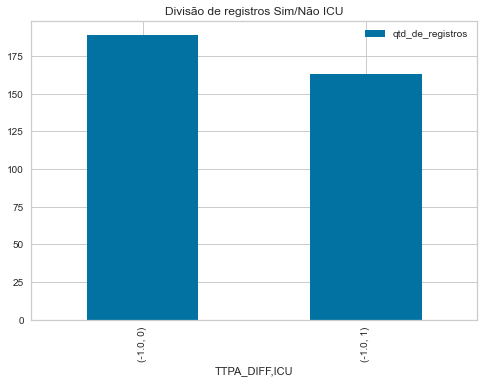

In [64]:
analisar_variaveis('TTPA')

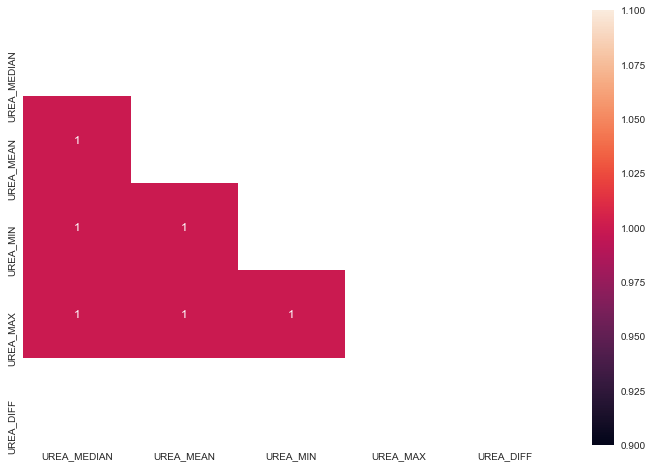

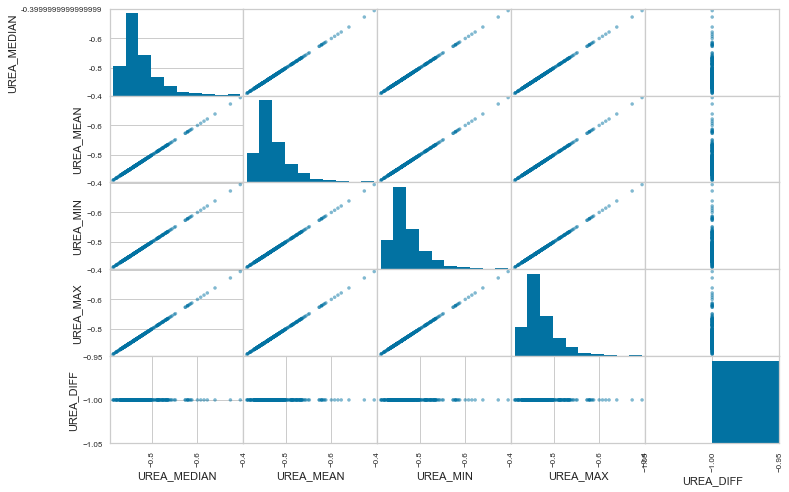

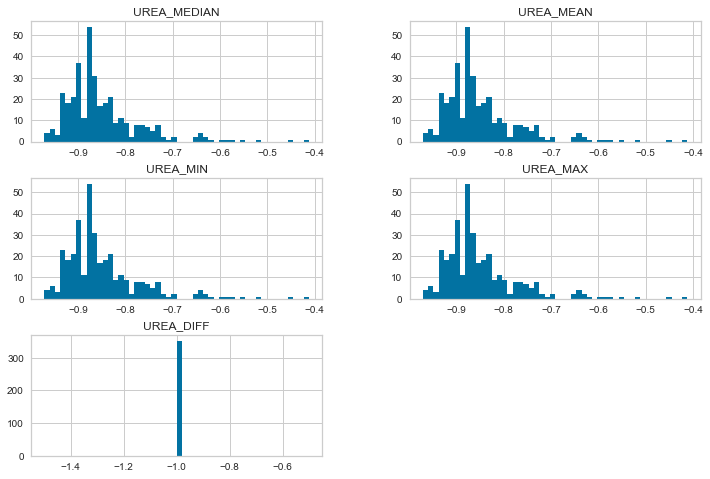

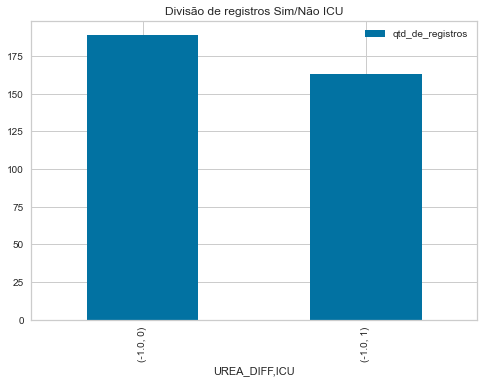

In [65]:
analisar_variaveis('UREA')

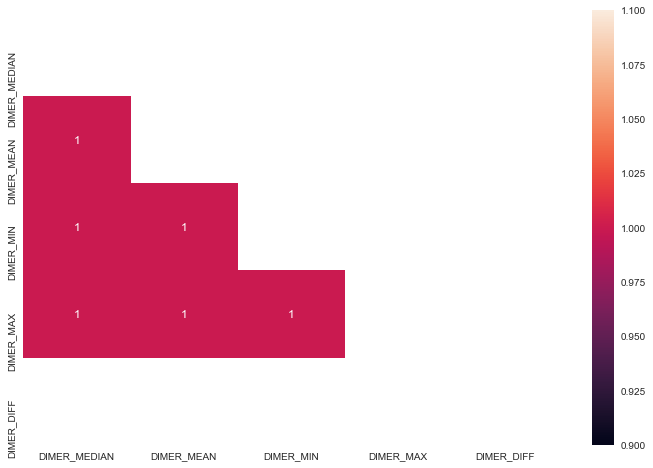

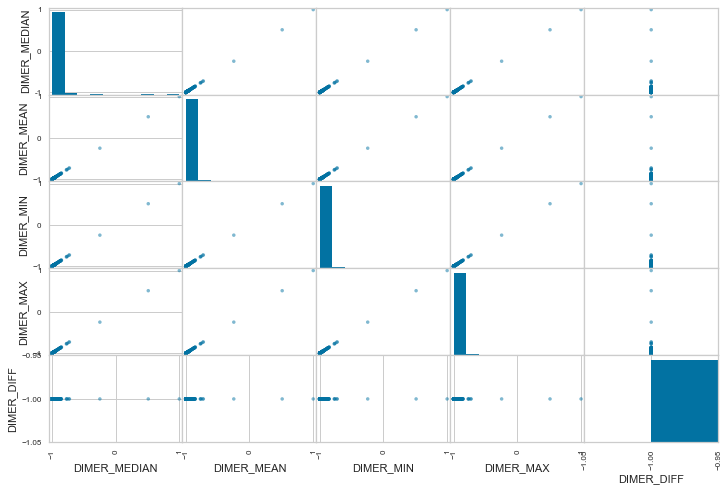

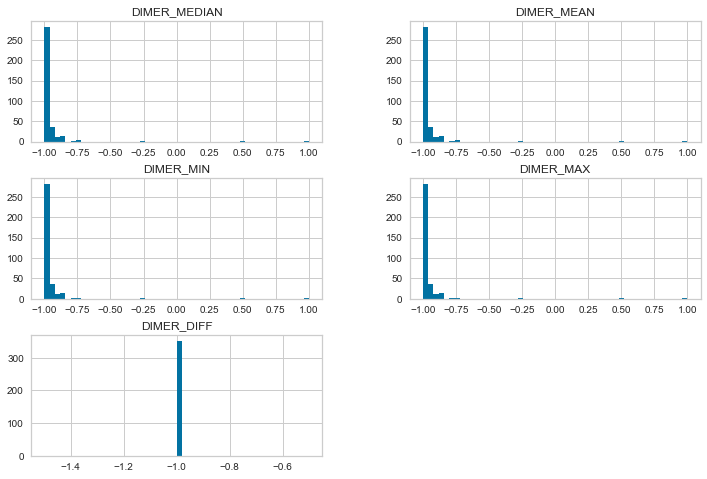

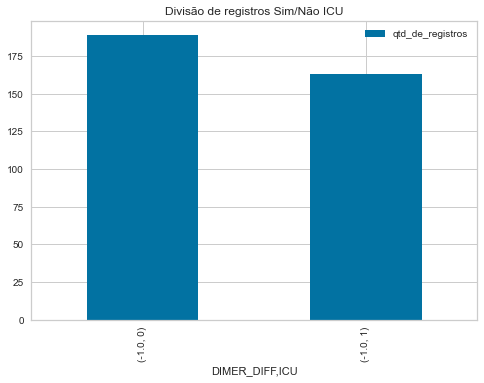

In [66]:
analisar_variaveis('DIMER')

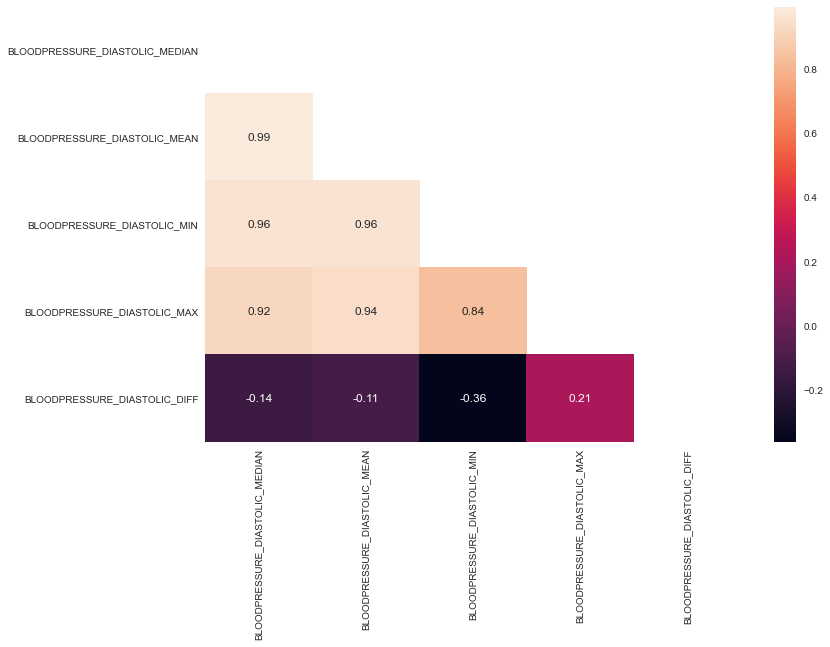

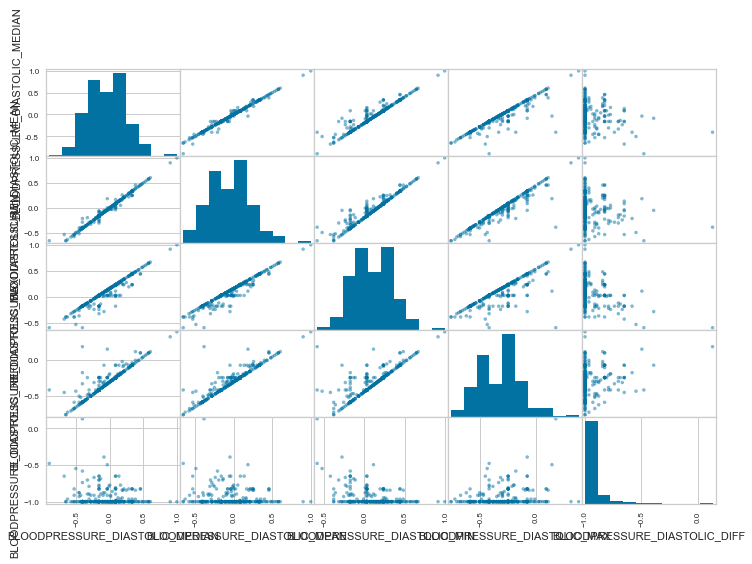

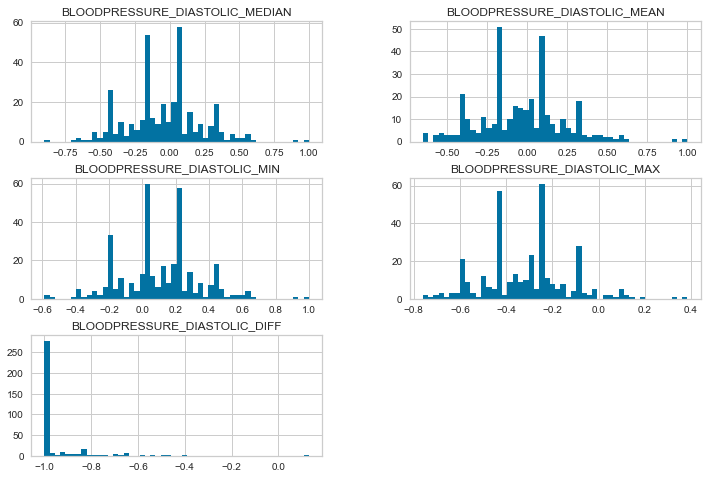

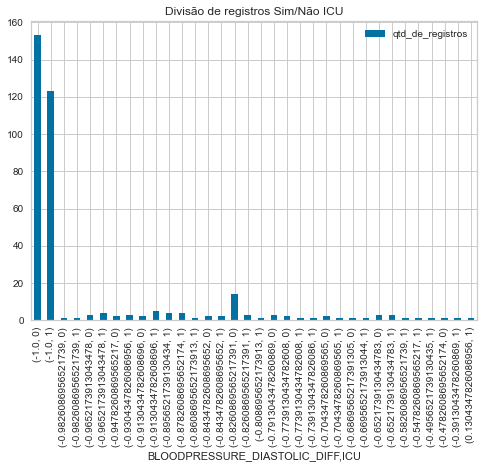

In [67]:
analisar_variaveis('BLOODPRESSURE_DIASTOLIC')

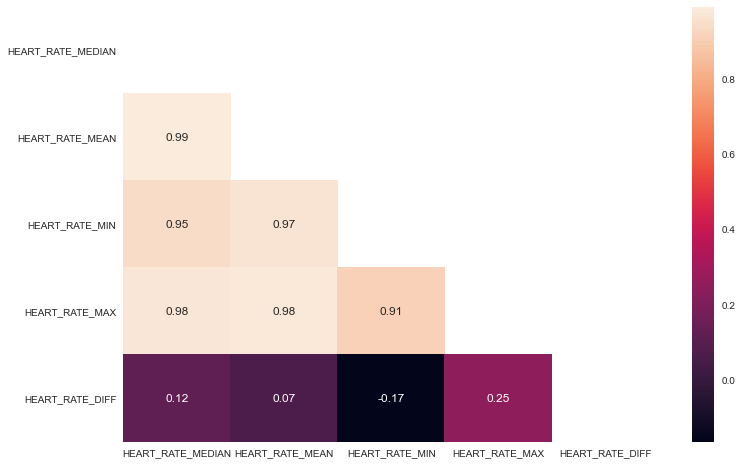

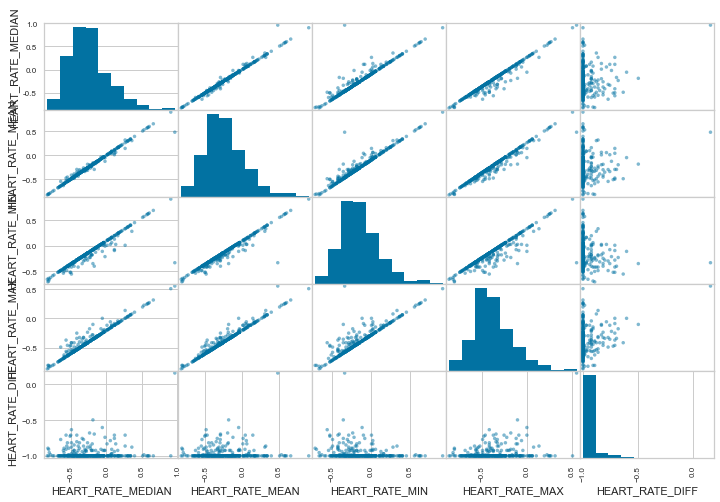

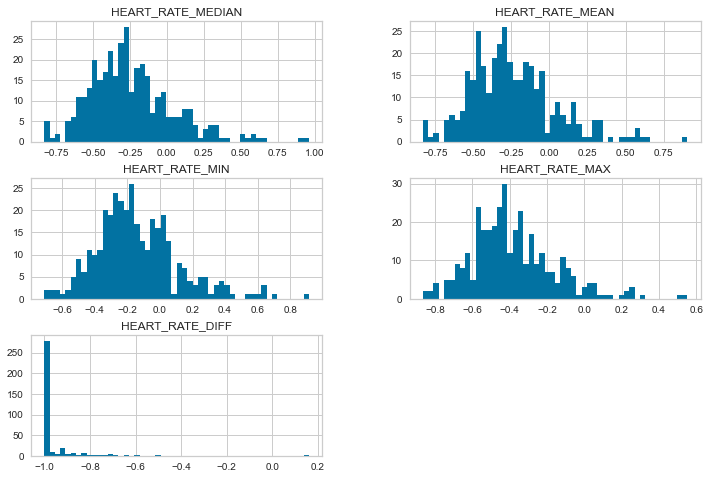

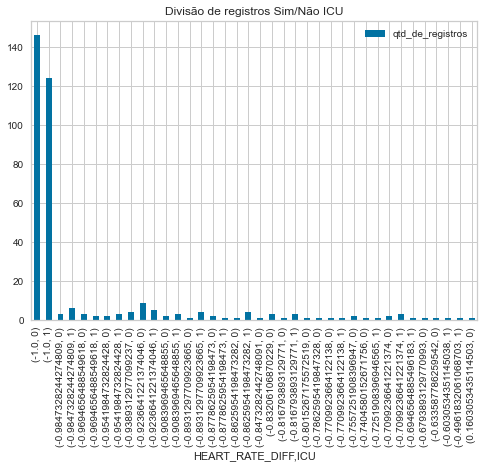

In [68]:
analisar_variaveis('HEART_RATE')

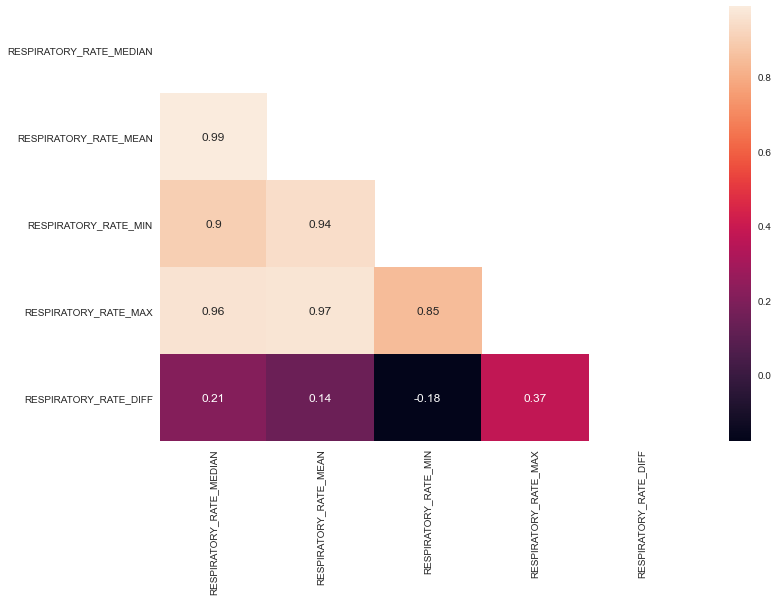

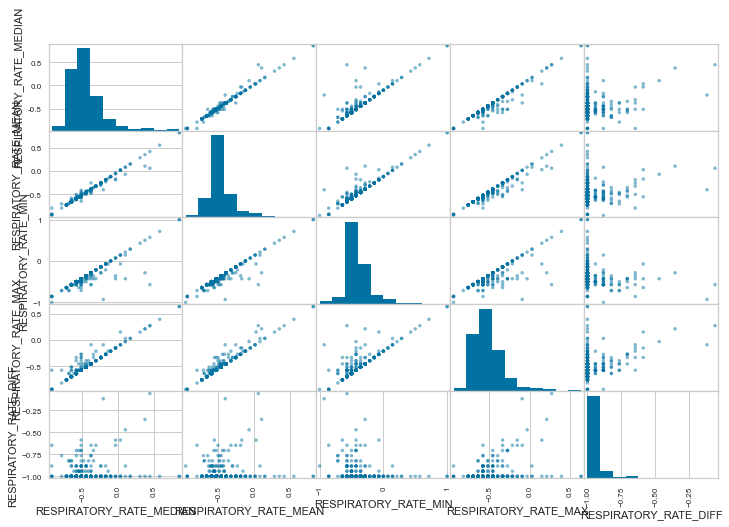

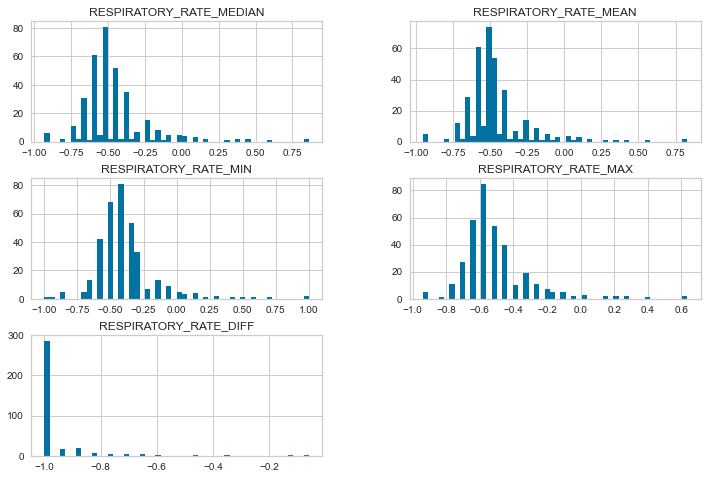

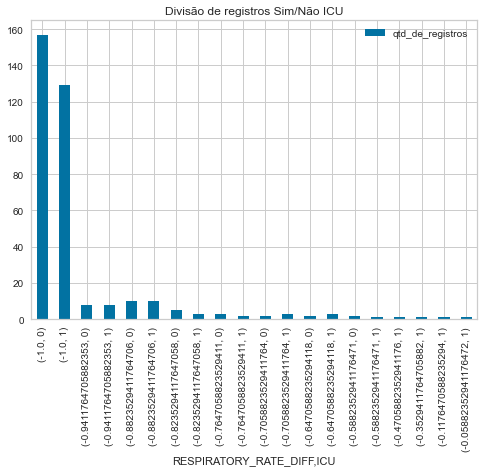

In [69]:
analisar_variaveis('RESPIRATORY_RATE')

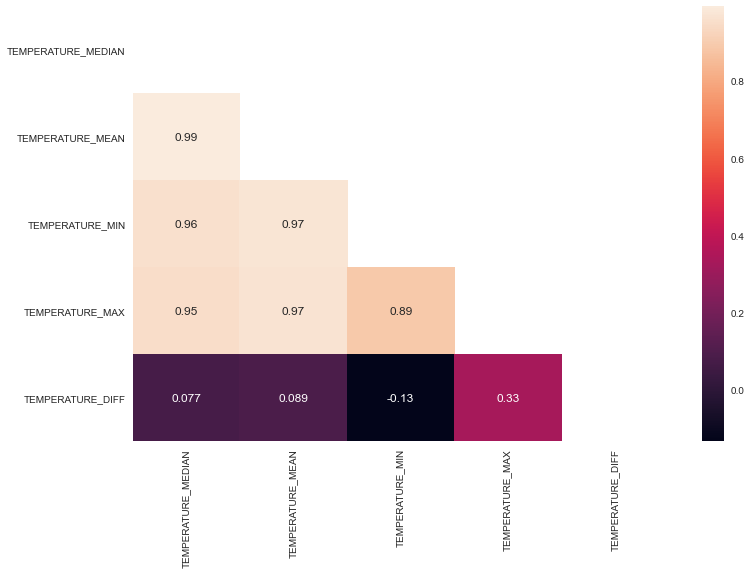

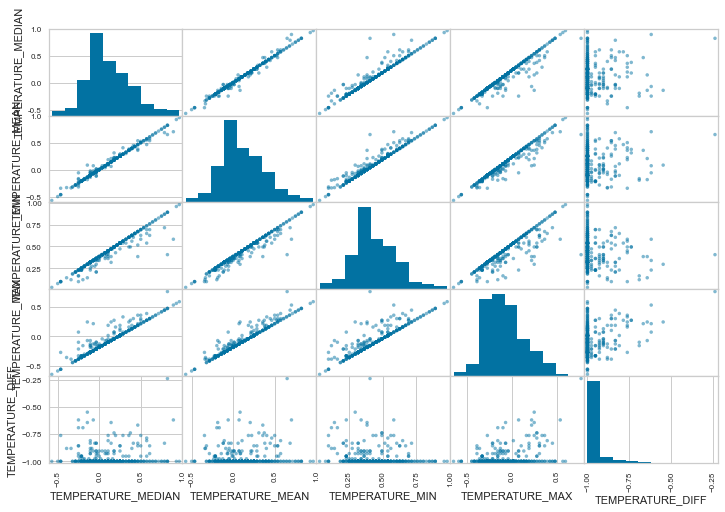

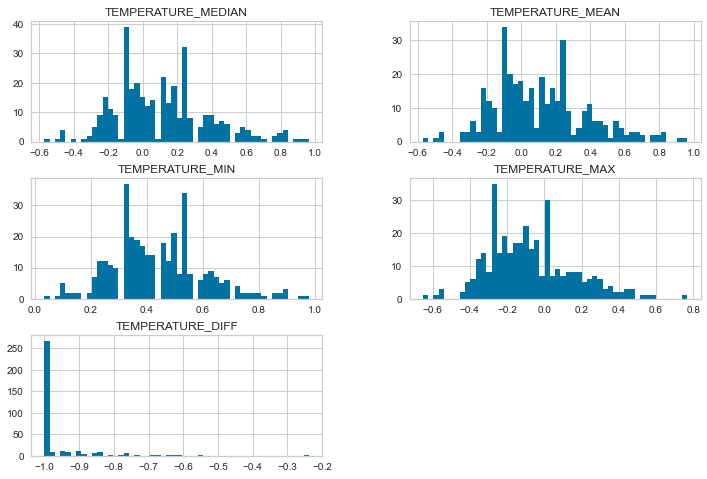

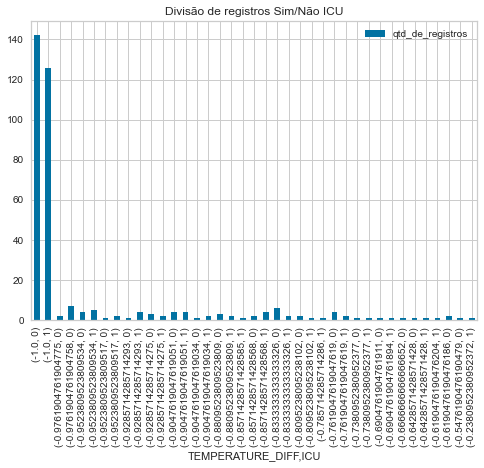

In [70]:
analisar_variaveis('TEMPERATURE')

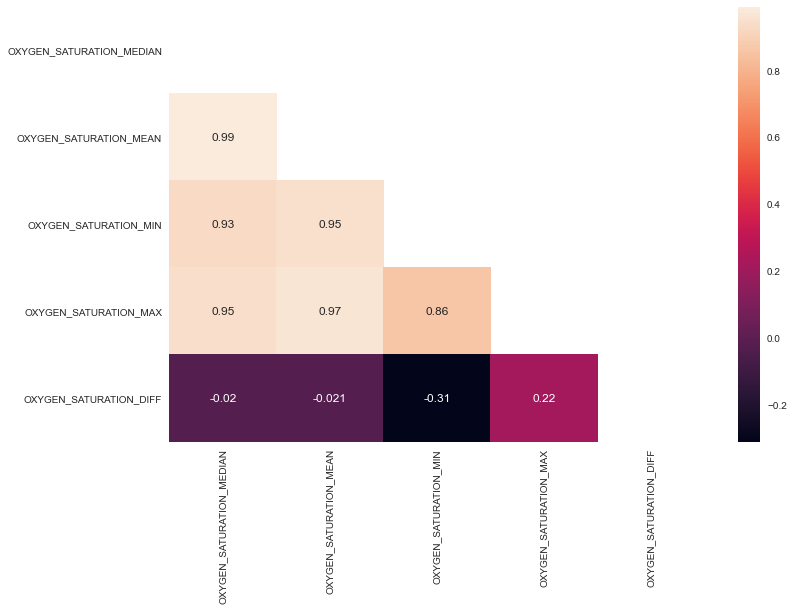

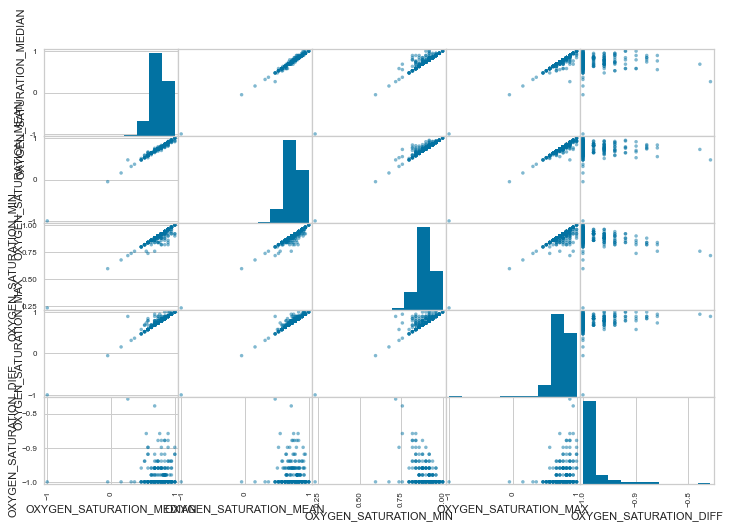

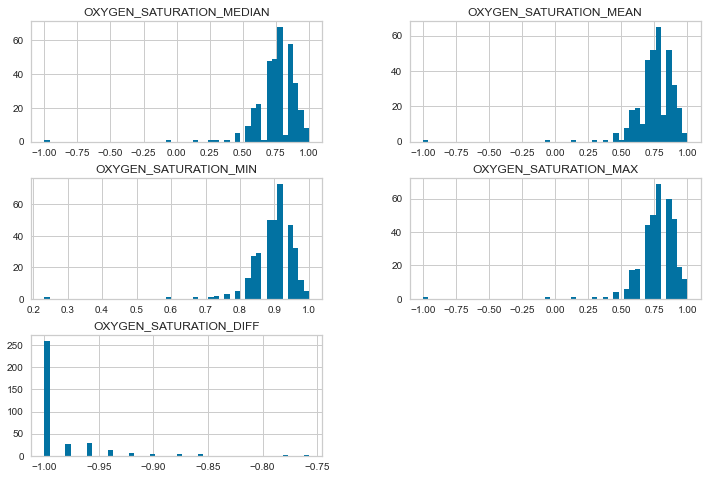

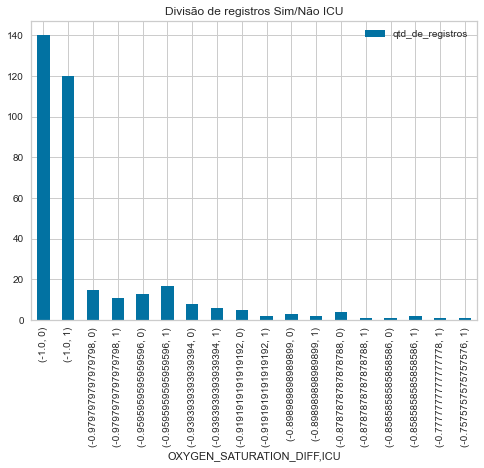

In [71]:
analisar_variaveis('OXYGEN_SATURATION')

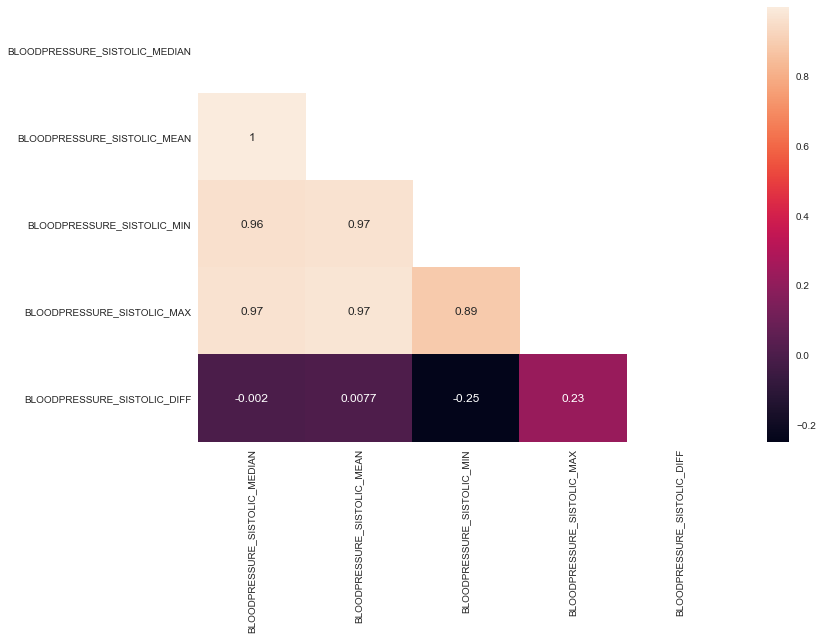

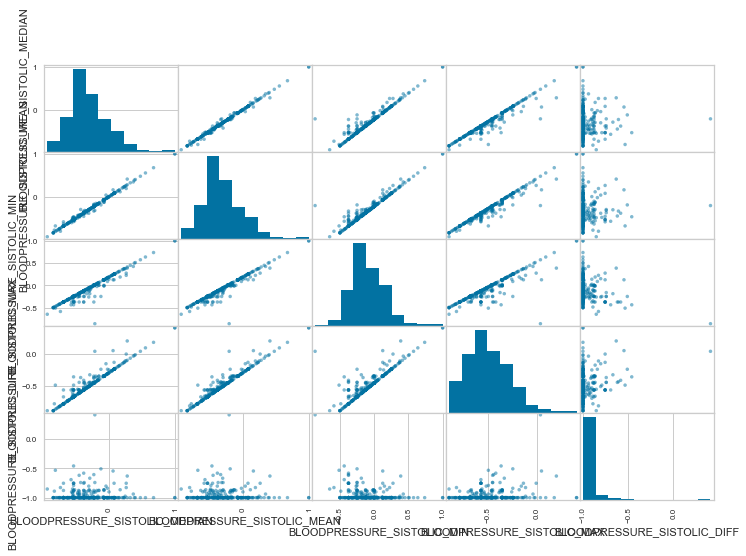

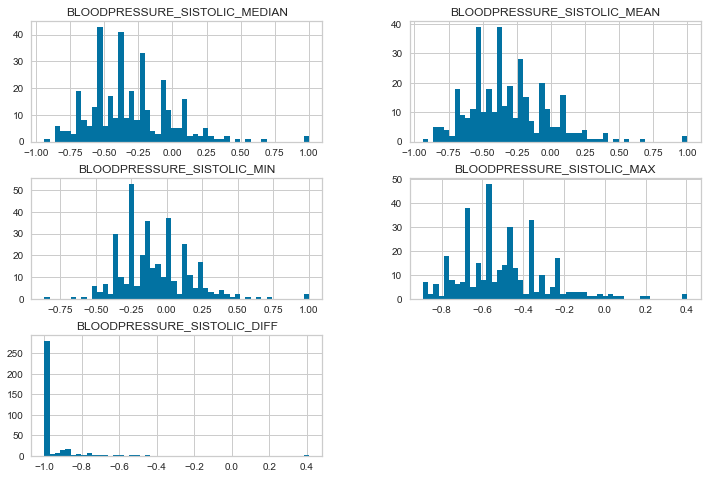

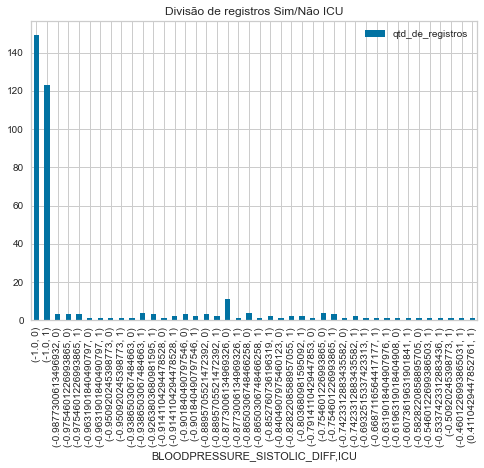

In [72]:
analisar_variaveis('BLOODPRESSURE_SISTOLIC')

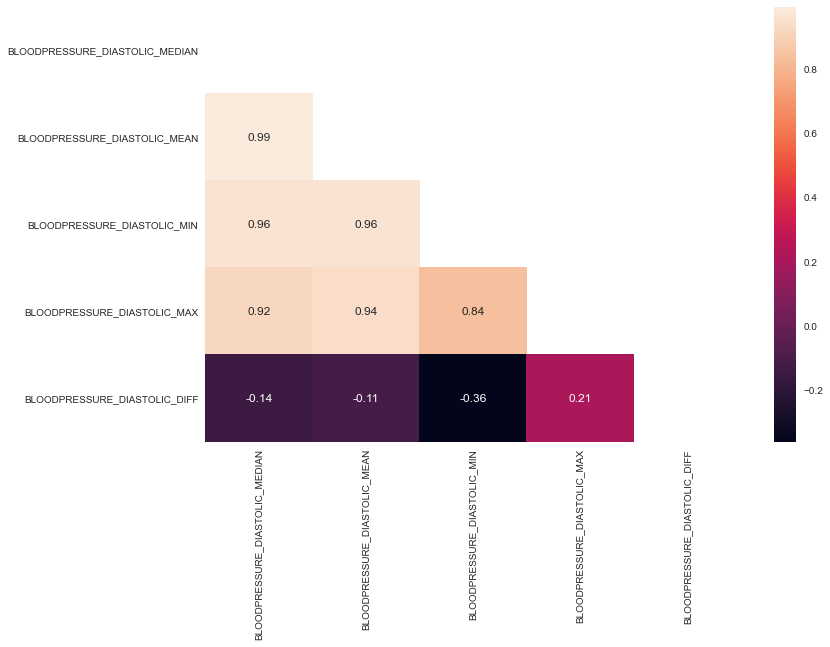

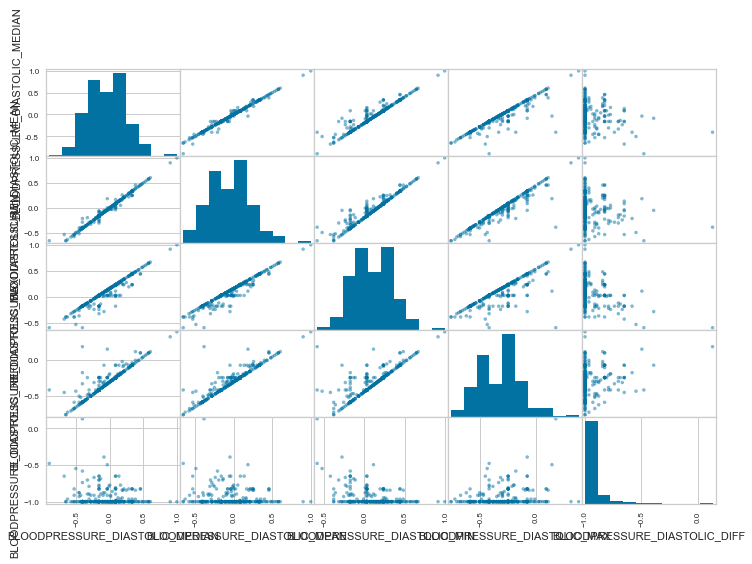

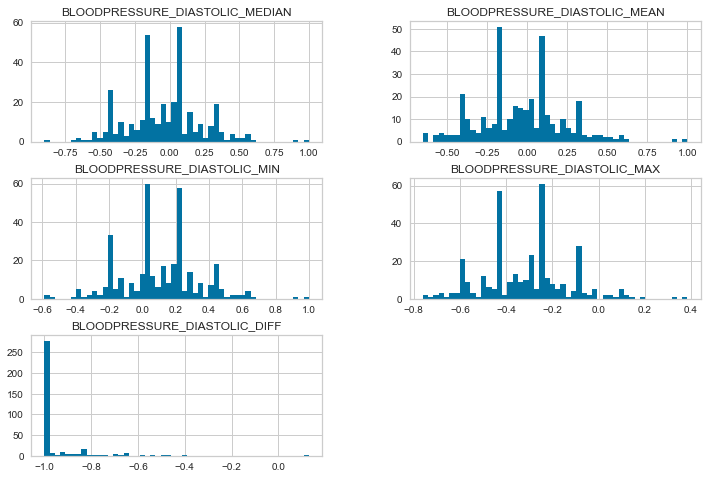

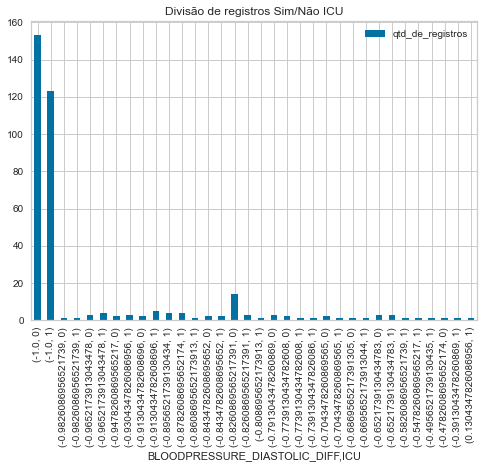

In [73]:
analisar_variaveis('BLOODPRESSURE_DIASTOLIC')

Finalizando nossa análise, decidimos manter 54 colunas das 231 que haviam originalmente em nosso banco de dados.

In [74]:
colunas_selecionadas = ['PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'AGE_PERCENTIL',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'BIC_VENOUS_MEDIAN',
 'BILLIRUBIN_MEDIAN',
 'CALCIUM_MEDIAN',
 'CREATININ_MEDIAN',
 'FFA_MEDIAN',
 'GGT_MEDIAN',
 'GLUCOSE_MEDIAN',
 'HEMATOCRITE_MEDIAN',
 'HEMOGLOBIN_MEDIAN',
 'INR_MEDIAN',
 'LACTATE_MEDIAN',
 'LEUKOCYTES_MEDIAN',
 'LINFOCITOS_MEDIAN',
 'NEUTROPHILES_MEDIAN',
 'P02_VENOUS_MEDIAN',
 'PC02_VENOUS_MEDIAN',
 'PCR_MEDIAN',
 'PH_VENOUS_MEDIAN',
 'PLATELETS_MEDIAN',
 'POTASSIUM_MEDIAN',
 'SAT02_VENOUS_MEDIAN',
 'SODIUM_MEDIAN',
 'TGO_MEDIAN',
 'TGP_MEDIAN',
 'TTPA_MEDIAN',
 'UREA_MEDIAN',
 'DIMER_MEDIAN',
 'HEART_RATE_MEAN',
 'RESPIRATORY_RATE_MEAN',
 'TEMPERATURE_MEDIAN',
 'OXYGEN_SATURATION_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MEAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'HEART_RATE_DIFF',
 'RESPIRATORY_RATE_DIFF',
 'TEMPERATURE_DIFF',
 'OXYGEN_SATURATION_DIFF',
 'WINDOW',
 'ICU']

Abaixo eu executo um código apenas para teste das colunas que sobraram para visualizarmos resumidamente se há mais algum outro dado com a correlação alta.

<AxesSubplot:>

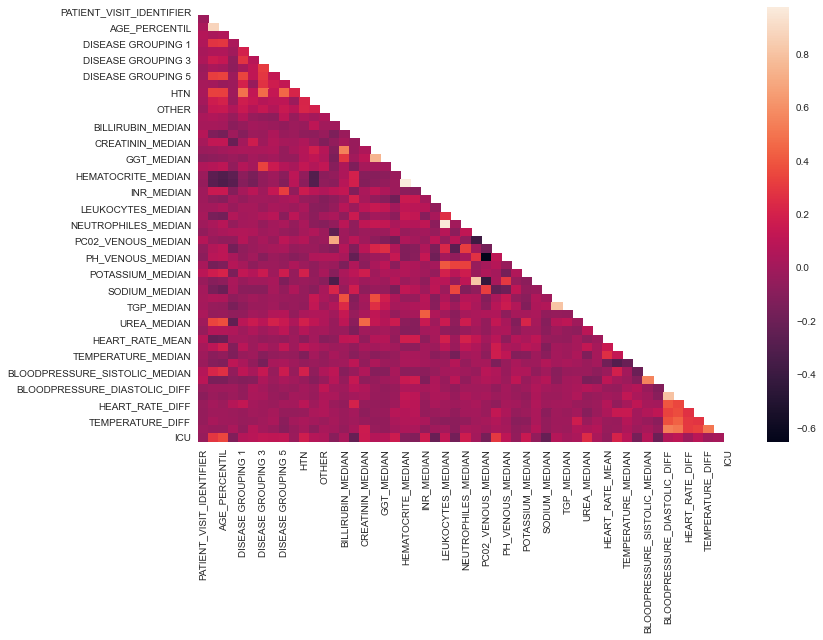

In [75]:
matrix = np.triu(dados_limpos[colunas_selecionadas].corr())
fig, ax = plt.subplots(figsize=(12,8))    
sns.heatmap(dados_limpos[colunas_selecionadas].corr(), mask=matrix, ax=ax)

In [76]:
dados_preparados = dados_limpos[colunas_selecionadas]

In [77]:
dados_preparados = dados_preparados.droplevel(0)

In [78]:
colunas_numericas = [
 'AGE_ABOVE65',
 'AGE_PERCENTIL',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'BIC_VENOUS_MEDIAN',
 'BILLIRUBIN_MEDIAN',
 'CALCIUM_MEDIAN',
 'CREATININ_MEDIAN',
 'FFA_MEDIAN',
 'GGT_MEDIAN',
 'GLUCOSE_MEDIAN',
 'HEMATOCRITE_MEDIAN',
 'HEMOGLOBIN_MEDIAN',
 'INR_MEDIAN',
 'LACTATE_MEDIAN',
 'LEUKOCYTES_MEDIAN',
 'LINFOCITOS_MEDIAN',
 'NEUTROPHILES_MEDIAN',
 'P02_VENOUS_MEDIAN',
 'PC02_VENOUS_MEDIAN',
 'PCR_MEDIAN',
 'PH_VENOUS_MEDIAN',
 'PLATELETS_MEDIAN',
 'POTASSIUM_MEDIAN',
 'SAT02_VENOUS_MEDIAN',
 'SODIUM_MEDIAN',
 'TGO_MEDIAN',
 'TGP_MEDIAN',
 'TTPA_MEDIAN',
 'UREA_MEDIAN',
 'DIMER_MEDIAN',
 'HEART_RATE_MEAN',
 'RESPIRATORY_RATE_MEAN',
 'TEMPERATURE_MEDIAN',
 'OXYGEN_SATURATION_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MEAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'HEART_RATE_DIFF',
 'RESPIRATORY_RATE_DIFF',
 'TEMPERATURE_DIFF',
 'OXYGEN_SATURATION_DIFF']

## 3. Modelos de Machine Learning

Nossa próxima etapa será a definição de modelos de machine learning para testarmos no próximo capitulo do projeto. Os modelos que vamos trabalhar serão:

### 3.1 Arvore de Decisão

Explicação do modelo extraída no site:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem13.JPG?raw=1' width=70%>

In [79]:
modelo_arvore = DecisionTreeClassifier(max_depth = 6)

### 3.2 Floresta de Decisão

Explicação do modelo extraída no site:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem14.JPG?raw=1' width=70%>

In [80]:
lista_teste = []
lista_treino = []
for i in range(1,10):
    modelo_floresta_aleatoria_teste = RandomForestClassifier(max_depth = i,n_estimators=200)
    teste, treino = roda_modelo_cv(modelo_floresta_aleatoria_teste, dados_limpos, 5, 10)
    lista_teste.append(teste)
    lista_treino.append(treino)

AUC MÉDIO 0.7700632974481657 - 0.8577765220971254
AUC MÉDIO 0.780893896288633 - 0.9000532811512787
AUC MÉDIO 0.7887612073796284 - 0.9412201382465938
AUC MÉDIO 0.7939527027027025 - 0.9724313396161653
AUC MÉDIO 0.7931194501918185 - 0.9887523527873128
AUC MÉDIO 0.7931316543816542 - 0.9964462247746426
AUC MÉDIO 0.7942018783137204 - 0.9994288609566249
AUC MÉDIO 0.7938585445493341 - 0.9999654950964069
AUC MÉDIO 0.790552663907927 - 0.9999979700800691


Escolherei o max_depth = 7 pois foi o melhor resultado de AUC médio

In [81]:
modelo_floresta_aleatoria = RandomForestClassifier(max_depth = 7,n_estimators=200)

### 3.3 Bagging Classifier

Explicação do modelo extraída no site:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem9.JPG?raw=1' width=70%>

In [82]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap = True, n_jobs =-1)

### 3.4 XGBClassifier

Explicação do modelo extraída no site:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem10.JPG?raw=1' width=70%>

In [83]:
modelo_xgb = xgb.XGBClassifier(random_state=42)

### 3.5 Modelos extraidos da análise TPOT

Explicação do modelo extraída no site:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem11.JPG?raw=1' width=70%>

In [140]:
np.random.seed(1231234)
dadosa = dados_preparados.sample(frac=1).reset_index(drop=True)

scaler = StandardScaler()
dadosa_preparados_2 = scaler.fit_transform(dadosa[colunas_numericas].astype(np.float64))
    

x_columns = dadosa.columns
y = dadosa["ICU"]
features = dadosa_preparados_2 

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(features,y.values, random_state=42,
                                                    train_size=0.75, test_size=0.25)



tpot = TPOTClassifier(generations=2, population_size=200, verbosity=2,
                      scoring='roc_auc')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.8166190476190476

Generation 2 - Current best internal CV score: 0.8166190476190476

Best pipeline: GradientBoostingClassifier(VarianceThreshold(input_matrix, threshold=0.01), learning_rate=0.001, max_depth=5, max_features=0.2, min_samples_leaf=6, min_samples_split=8, n_estimators=100, subsample=0.5)
0.792778649921507


In [84]:
melhor_modelo_1 = GradientBoostingClassifier(learning_rate=0.001, max_depth=5, max_features=0.2, min_samples_leaf=6, min_samples_split=8, n_estimators=100, subsample=0.5)

In [107]:
np.random.seed(1231234)
dadosa = dados_preparados.sample(frac=1).reset_index(drop=True)

scaler = StandardScaler()
dadosa_preparados_2 = scaler.fit_transform(dadosa[colunas_numericas].astype(np.float64))
    

x_columns = dadosa.columns
y = dadosa["ICU"]
features = dadosa_preparados_2 

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(features,y.values, random_state=42,
                                                    train_size=0.75, test_size=0.25)



tpot = TPOTClassifier(generations=10, population_size=200, verbosity=2,
                      scoring='roc_auc')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

C:\Users\bochn\anaconda364bit\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: 0.8166190476190476

Generation 2 - Current best internal CV score: 0.8166190476190476

Generation 3 - Current best internal CV score: 0.8214880952380952

Generation 4 - Current best internal CV score: 0.8214880952380952

Generation 5 - Current best internal CV score: 0.8214880952380952

Generation 6 - Current best internal CV score: 0.8214880952380952

Generation 7 - Current best internal CV score: 0.823047619047619

Generation 8 - Current best internal CV score: 0.8234642857142858

Generation 9 - Current best internal CV score: 0.8363333333333334

Generation 10 - Current best internal CV score: 0.8363333333333334

Best pipeline: GradientBoostingClassifier(KNeighborsClassifier(input_matrix, n_neighbors=49, p=1, weights=uniform), learning_rate=0.001, max_depth=6, max_features=0.35000000000000003, min_samples_leaf=2, min_samples_split=7, n_estimators=100, subsample=0.7000000000000001)
0.7488226059654631


In [85]:
melhor_modelo_2 = GradientBoostingClassifier( learning_rate=0.001, max_depth=6, max_features=0.35000000000000003, min_samples_leaf=2, min_samples_split=7, n_estimators=100, subsample=0.7000000000000001)

In [86]:
tpot_stckingestimator_extratree = make_pipeline(Normalizer(norm = 'max'), 
                                  StackingEstimator(estimator = ExtraTreesClassifier(
                                      bootstrap=True,criterion='gini', max_features=0.85,min_samples_leaf=4,
                                      min_samples_split=19,n_estimators=100)), 
                                  ExtraTreesClassifier(bootstrap=False,criterion='entropy', max_features=0.3, 
                                      min_samples_leaf=13,min_samples_split=9, n_estimators=100))

## 4. Avaliação dos Modelos

Na quarta etapa do projeto, eu iniciarei os testes dos modelos com a função 'roda_modelo_cv_validação', no qual a função executa um código que separará a base em 15 partes e repetirá 10 vezes a execução. Essa função nos mostrará quais serão os AUC médios e AUC médio de treino, e com base nesses resultados selecionaremos os 3 melhores modelos para uma segunda validação.

### 4.1 Validação AUC Médio

In [87]:
roda_modelo_cv_validação(modelo_xgb, dados_preparados, 15, 10)

C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni


[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni


[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarni

[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bochn\anaconda364bit\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(0.7996728826728827, 1.0)

In [88]:
roda_modelo_cv_validação(bag_clf, dados_preparados, 15, 10)

AUC  0.809935508935509 - 0.9831946351491335


(0.809935508935509, 0.9831946351491335)

In [89]:
roda_modelo_cv_validação(modelo_floresta_aleatoria, dados_preparados, 15, 10)

AUC  0.8024864024864025 - 0.9969825477547952


(0.8024864024864025, 0.9969825477547952)

In [90]:
roda_modelo_cv_validação(modelo_arvore, dados_preparados, 15, 10)

AUC  0.6552315462315461 - 0.9541851868719332


(0.6552315462315461, 0.9541851868719332)

In [91]:
roda_modelo_cv_validação(melhor_modelo_1, dados_preparados, 15, 10)

AUC  0.803017871017871 - 0.9511229119989844


(0.803017871017871, 0.9511229119989844)

In [92]:
roda_modelo_cv_validação(melhor_modelo_2, dados_preparados, 15, 10)

AUC  0.7960815850815851 - 0.9899857424779533


(0.7960815850815851, 0.9899857424779533)

In [93]:
roda_modelo_cv_validação(tpot_stckingestimator_extratree, dados_preparados, 15, 10)

AUC  0.7958220668220668 - 0.9804193131497319


(0.7958220668220668, 0.9804193131497319)

Os três modelos selecionados serão:

 - Em primeiro lugar - Bag_Clf
 - Em segundo lugar - Melhor_Modelo_1
 - Em terceiro lugar - Modelo_Floresta_Aleatória     

### 4.2 Validação Matriz de Confusão + Precision + Recall + F1 + ROC

Em nossa segunda validação, decidi explorar de um modo mais detalhado o nosso TOP3, verificando cinco informações da biblioteca sklearn com auxilio da yellowbrick.

#### 4.2.1 O que é a Matriz de Confusão

Segue abaixo uma explicação do que é cada elemento gráfico da matriz de confusão:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem15.JPG?raw=1' width=70%>

A concentração da cor vermelha nos campos significa a presença de mais resultados (cor mais escura).

#### 4.2.2 O que é Precision

É a porcentagem de predições positivas que estavam corretas, ou seja, ela é composta pela formula abaixo:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/IMAGEM16.JPG?raw=1' width=70%>

#### 4.2.3 O que é Recall

É a porcentagem de valores positivos classificados corretamente. Veja abixo a formula:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/IMAGEM17.JPG?raw=1' width=70%>

#### 4.2.4 O que é F1

É a média harmônica de recall e precisão:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/IMAGEM18.JPG?raw=1' width=70%>

#### 4.2.5 O que é a curva ROC

Esse gráfico mostra o desempenho do classificador, exibindo a taxa de verdadeiros positivos (recall/sensibilidade) à medida que a taxa de falso-postivios muda.

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/IMAGEM19.JPG?raw=1' width=70%>

#### 4.2.6 Avaliação Gráfica

C:\Users\bochn\anaconda364bit\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


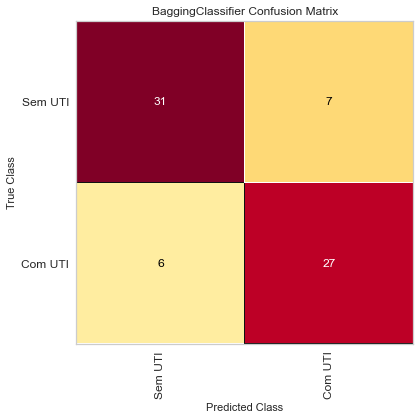

C:\Users\bochn\anaconda364bit\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


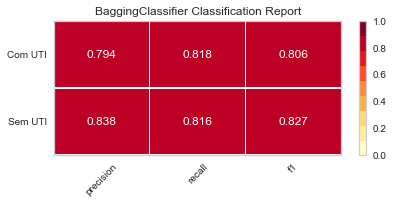

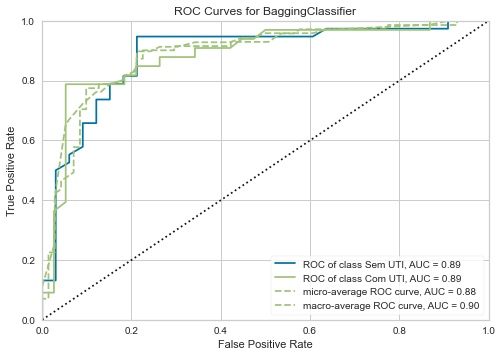

In [94]:
avaliar_modelo_graficamente(bag_clf,dados_preparados)

C:\Users\bochn\anaconda364bit\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


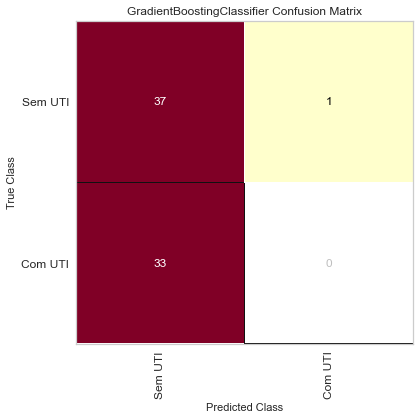

C:\Users\bochn\anaconda364bit\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


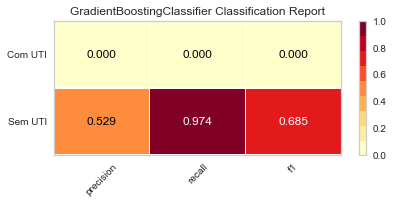

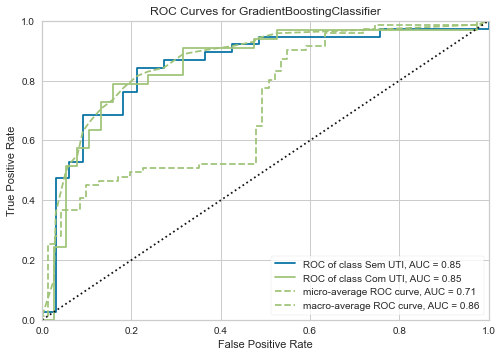

In [95]:
avaliar_modelo_graficamente(melhor_modelo_2,dados_preparados)

C:\Users\bochn\anaconda364bit\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


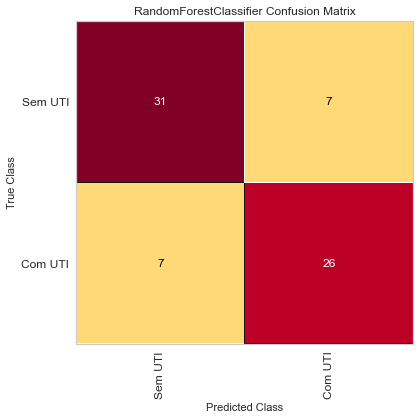

C:\Users\bochn\anaconda364bit\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


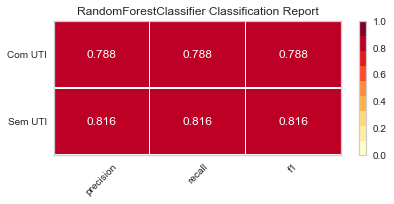

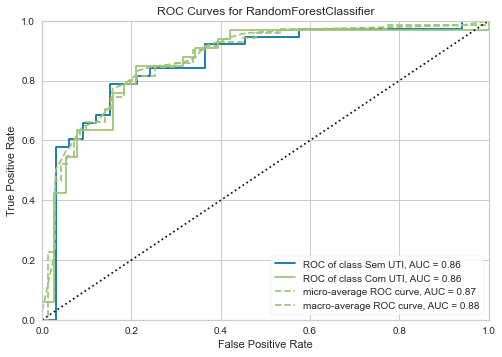

In [96]:
avaliar_modelo_graficamente(modelo_floresta_aleatoria,dados_preparados)

## 5. Conclusão

Após todas as análises feitas sobre o banco de dados concedido pelo Hospital Sírio-Libanês, e focando exclusivamente no problema do caso que é a predição de quem realmente precisará dos leitos de UTI para evitar a sobrecarga do sistema, ocasionando a falta de recursos para aqueles que precisarão urgente de tratamentos especiais e o desperdicio com pacientes que foram encaminhados sem haver completa necessidade da internação, coseguimos enfim indicar o melhor modelo para o hospital - o BaggingClassifier:

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem20.JPG?raw=1' width=70%>

O modelo já havia apresentado o melhor resultado na primeira seção de validação - 80,99% - de AUC médio, e no detalhamento, quando comparamos com o modelo de floresta aleatória, os dois tiveram poucas diferenças nos resultados, mas de qualquer maneira, o BaggingClassifier ainda manteve-se com o melhores resultados

<img src='https://github.com/PauloBochnia/Bootcamp_DataScience_Projeto_Final/blob/main/Db_Images/imagem21.JPG?raw=1' width=70%>

Infelizmente no modelo apresentado pelo TPOT eu não consegui aplica-lo na 2ª validação dos modelos, vou pesquisar mais sobre para fazer com que o modelo seja configurado corretamente.

Mesmo ainda havendo o erro no nosso melhor modelo - há uma taxa de falsos positivos e falsos negativos, talves há atributos não explorados nos modelos que podem melhorar a predição -, acredito que o resultado foi satisfatório, lembrando que toda a predição aconteceu sob os dados apresentados nas primeiras horas do paciente no hospital. 

Acredito que algo que pode ser melhorado também é a coleta e padronização dos dados, encontramos muitos dados faltantes, e mesmo executando a lógica de complementar a informação com os dados de outras janelas, talvez podemos ter uma melhoria no nosso modelo. Eu encontrei muitas colunas com dados concentrados em um unico número, e eu evitei esse tipo de informação para não viciar o nosso modelo em algo que talvez foi a padronização dos dados que ocasionou a concentração/repetição de informações.

No futuro, conforme a progressão dos meus estudos sobre todos os temas de Data Science se sucederem, eu pretendo realizar novamente esse projeto para escolher outros caminhos para minha análise, e conseguir um resultado acima do que conseguimos até o momento.

## 6. Referências

HARRISON, Matt. MACHINE LEARNING - GUIA DE REFERÊNCIA RÁPIDA: TRABALHANDO COM DADOS ESTRUTURADOS EM PYTHON. O'reilly;

GERON, Aurelien. MÃOS À OBRA: APRENDIZADO DE MÁQUINA COM SCIKIT-LEARN & TENSORFLOW - CONCEITOS, FERRAMENTAS E TÉCNICAS PARA A CONSTRUÇÃO DE SISTEMAS INTELIGENTES. O'reilly;

MCKINNEY, Wes. PYTHON PARA ANÁLISE DE DADOS: TRATAMENTO DE DADOS COM PANDAS NUMPY E PYTHON. O'reilly;

Site do Governo - https://coronavirus.saude.gov.br/sobre-a-doenca - Acesso dia 10/03

Dados da COVID do site do Governo - https://covid.saude.gov.br/  - Acesso dia 12/03

Sírio-Libanês - Kaggle - https://www.kaggle.com/S%C3%ADrio-Libanes/covid19  - Acesso dia 28/02

Site com todos os manuais e instruções de modelos do Sklearn - https://scikit-learn.org/stable/ - Acesso dia 05/03